### Evaluation and Analysis Script - Keep Clean! 

In [1]:
from eval_funcs import * 
import os 
import yaml
import numpy as np 
import matplotlib
# matplotlib.use('pgf')

import seaborn as sns
#plt.style.use('seaborn-v0_8')
matplotlib.rcParams.update({
    'font.family': 'serif',
    'font.weight': 'bold'
})
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [18, 16]
colors = {
    'withoutimu' : 'seagreen', 
    'withimu' : 'steelblue'
}

def get_mean_octs(imu:str, system:str, sub:str="", sequence:str='dataset-room1_512_16'):
    octs = extract_orbs(imu, system, sequence, sub)
    average_octs = []
    for key in octs: 
        average_octs.append(np.mean(octs[key],axis=0)) 
    return np.mean(average_octs,axis=0)


# ORB-SLAM3 

## Dataset 1 

In [2]:
imu = ['withimu', 'withoutimu']
system = 'orb_slam'

res_orb1, std_orb1, all_orb1 = compute_results(imu=imu, system=system, sub='/result_runs_with_clahe', datasets=['dataset-room1_512_16'], outliers=False) 

6 outliers removed from dataset-room1_512_16withimu
3 outliers removed from dataset-room1_512_16withoutimu


In [3]:
# Compare to article: 
print('------ Original Dataset 1 ---------')
print(f"Monocular:  {np.round(np.median(all_orb1['dataset-room1_512_16withoutimu']),3)} +- {np.round(np.std(all_orb1['dataset-room1_512_16withoutimu']),3)} (0.042)") 
print(f"Monocular-Inertial: {np.round(np.median(all_orb1['dataset-room1_512_16withimu']),3)} ({np.round(np.std(all_orb1['dataset-room1_512_16withimu']),3)})  (0.009)")
print('-----------------------------------')

------ Original Dataset 1 ---------
Monocular:  0.011 +- 0.007 (0.042)
Monocular-Inertial: 0.018 (0.016)  (0.009)
-----------------------------------


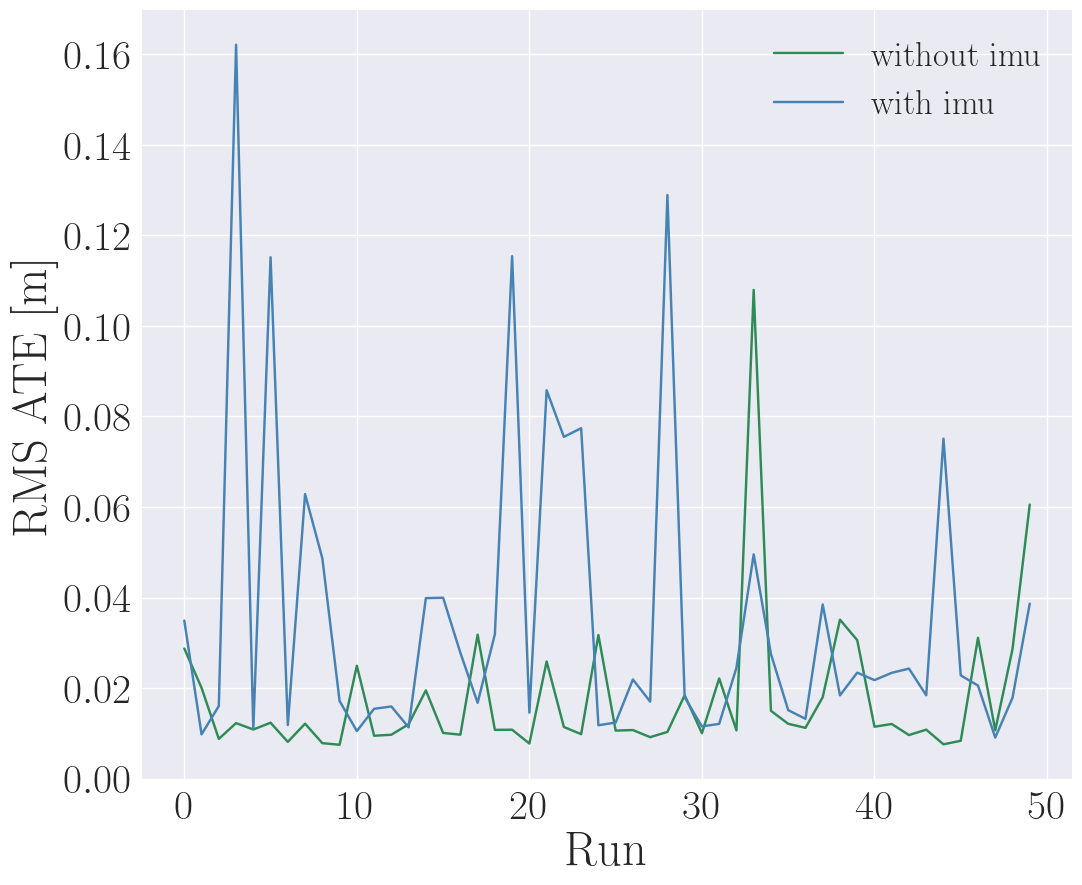

In [64]:
plt.figure(figsize=(12,10))
plt.plot(all_orb1['dataset-room1_512_16withoutimu'], label='without imu', color=colors['withoutimu'])
plt.plot(all_orb1['dataset-room1_512_16withimu'], label = 'with imu', color=colors['withimu']) 
plt.xlabel('Run', fontsize='35') 
plt.ylabel('RMS ATE [m]', fontsize='35', fontweight='bold') 
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=25)
#plt.savefig('orb_orig1_runs.png', bbox_inches='tight')
plt.show()


### Result runs - Dataset 1 

In [4]:
median_orb1, std_orb1, all_data_orb1 = compute_results(imu=imu, system='orb_slam', sub='/result_runs', outliers=False) 
median_org1_mono, std_org1_mono, all_org1_mono = compute_results(imu=['withoutimu'], system='orb_slam', sub='/result_runs_rerun_monocular', datasets=DATASETS_1, outliers=False) 

0 outliers removed from dataset-room1_512_16withimu
6 outliers removed from dataset-room1_512_16_20withimu
3 outliers removed from dataset-room1_512_16_8withimu
8 outliers removed from dataset-room1_512_16_7withimu
3 outliers removed from dataset-room1_512_16_6withimu
8 outliers removed from dataset-room1_512_16_5withimu
7 outliers removed from dataset-room1_512_16_4withimu
0 outliers removed from dataset-room1_512_16_3withimu
7 outliers removed from dataset-room1_512_16_2-5withimu
6 outliers removed from dataset-room1_512_16_2withimu
5 outliers removed from dataset-room1_512_16withoutimu
4 outliers removed from dataset-room1_512_16_20withoutimu
9 outliers removed from dataset-room1_512_16_8withoutimu
5 outliers removed from dataset-room1_512_16_7withoutimu
2 outliers removed from dataset-room1_512_16_6withoutimu
7 outliers removed from dataset-room1_512_16_5withoutimu
6 outliers removed from dataset-room1_512_16_4withoutimu
5 outliers removed from dataset-room1_512_16_3withoutimu
6 ou

In [5]:
# Compare to article: 
print('------ Original Dataset 1 without CLAHE ---------')
print(f"Monocular:  {np.round(np.median(all_org1_mono['dataset-room1_512_16withoutimu']),3)} ({np.round(np.std(all_org1_mono['dataset-room1_512_16withoutimu']),3)}) (0.042)") 
print(f"Monocular-Inertial: {np.round(np.median(all_data_orb1['dataset-room1_512_16withimu']),3)} ({np.round(np.std(all_data_orb1['dataset-room1_512_16withimu']),3)})  (0.009)")
print('-------------------------------------------------')

------ Original Dataset 1 without CLAHE ---------
Monocular:  0.019 (0.096) (0.042)
Monocular-Inertial: 0.018 (0.043)  (0.009)
-------------------------------------------------


In [12]:
print('--------------- without imu DATASET 1 without CLAHE -------------------') 
for data in DATASETS_1:
    d = all_org1_mono[data+'withoutimu']
    print(f'{data}: {np.round(np.median(d),3)} ({np.round(np.std(d),3)})')
print('----------------- with imu DATASET 1 without CLAHE ---------------------') 
for data in DATASETS_1:
    d = all_data_orb1[data+'withimu']
    print(f'{data}: {np.round(np.median(d),3)} ({np.round(np.std(d),3)})')

--------------- without imu DATASET 1 without CLAHE -------------------
dataset-room1_512_16: 0.024 (0.206)
dataset-room1_512_16_20: 0.03 (0.233)
dataset-room1_512_16_8: 0.018 (0.171)
dataset-room1_512_16_7: 0.013 (0.005)
dataset-room1_512_16_6: 0.014 (0.006)
dataset-room1_512_16_5: 0.119 (0.196)
dataset-room1_512_16_4: 0.136 (0.259)
dataset-room1_512_16_3: 0.019 (0.018)
dataset-room1_512_16_2-5: 0.02 (0.014)
dataset-room1_512_16_2: 0.025 (0.009)
----------------- with imu DATASET 1 without CLAHE ---------------------
dataset-room1_512_16: 0.018 (0.043)
dataset-room1_512_16_20: 0.012 (0.018)
dataset-room1_512_16_8: 0.013 (0.002)
dataset-room1_512_16_7: 0.018 (0.033)
dataset-room1_512_16_6: 0.013 (0.001)
dataset-room1_512_16_5: 0.022 (0.031)
dataset-room1_512_16_4: 0.035 (0.027)
dataset-room1_512_16_3: 0.046 (0.042)
dataset-room1_512_16_2-5: 0.021 (0.016)
dataset-room1_512_16_2: 0.028 (0.038)


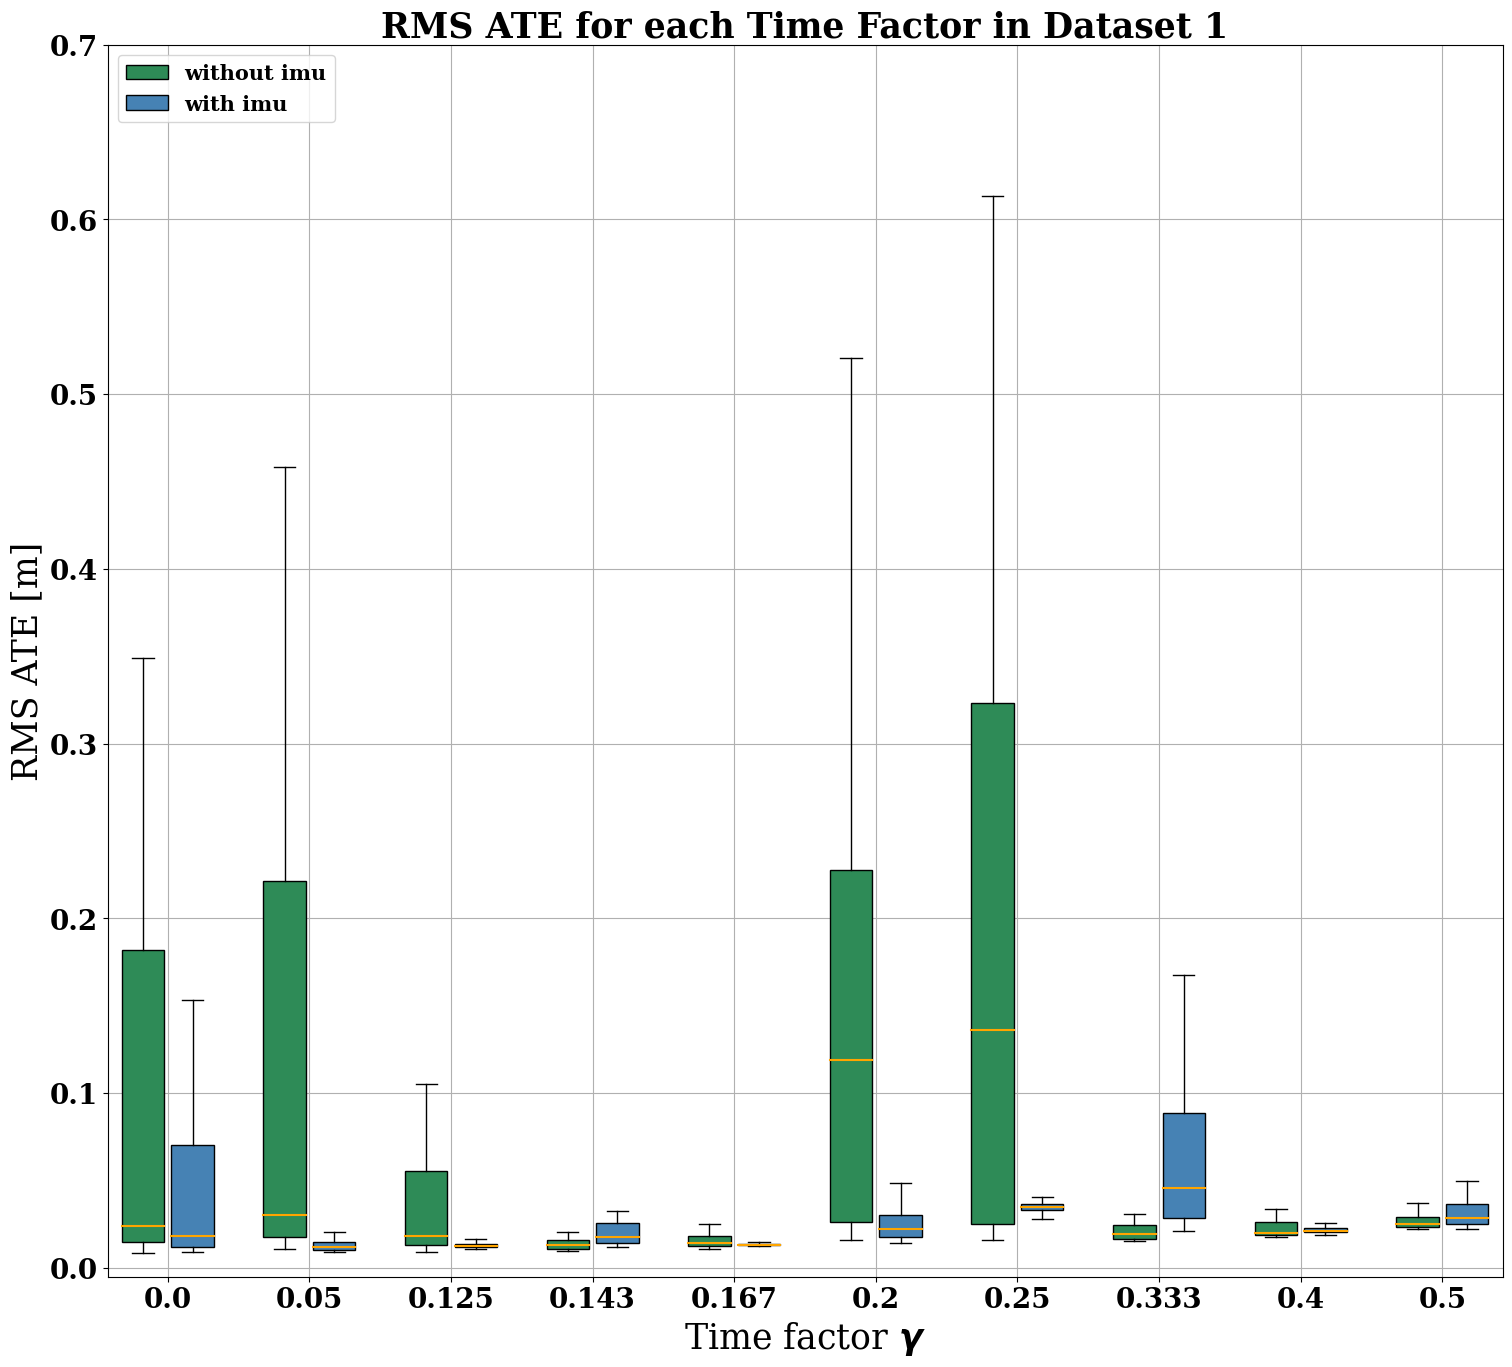

In [3]:
median_orb1, std_orb1, all_data_orb1 = compute_results(imu=imu, system='orb_slam', sub='/result_runs', outliers=True) 
median_org1_mono, std_org1_mono, all_org1_mono = compute_results(imu=['withoutimu'], system='orb_slam', sub='/result_runs_rerun_monocular', datasets=DATASETS_1, outliers=True) 
d_wi, d_woi = [], []
for data in DATASETS_1: 
    d_wi.append(all_data_orb1[data+'withimu']) 
    d_woi.append(all_org1_mono[data+'withoutimu']) 

fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), medianprops = dict(color = "orange", linewidth = 1.5), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), medianprops = dict(color = "orange", linewidth = 1.5), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.ylim(-0.005, 0.7)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('RMS ATE for each Time Factor in Dataset 1', fontsize='25', fontweight='bold') 
plt.savefig('box_orb1X.png', bbox_inches='tight') 
plt.show()

In [10]:
for i in ['withoutimu']: 
    print(f'------ {i} -------')
    for data in DATASETS_1:
        #d = all_data_orb1[data+i]
        #print(f'{data}: {np.round(np.median(d),3)} ({np.round(np.std(d),3)})')
        d = all_org1_mono[data+i]
        print(f'{data}: {np.round(np.median(d),3)} ({np.round(np.std(d),3)})')

------ withoutimu -------
dataset-room1_512_16: 0.024 (0.206)
dataset-room1_512_16_20: 0.03 (0.233)
dataset-room1_512_16_8: 0.018 (0.171)
dataset-room1_512_16_7: 0.013 (0.005)
dataset-room1_512_16_6: 0.014 (0.006)
dataset-room1_512_16_5: 0.119 (0.196)
dataset-room1_512_16_4: 0.136 (0.259)
dataset-room1_512_16_3: 0.019 (0.018)
dataset-room1_512_16_2-5: 0.02 (0.014)
dataset-room1_512_16_2: 0.025 (0.009)


### With CLAHE 

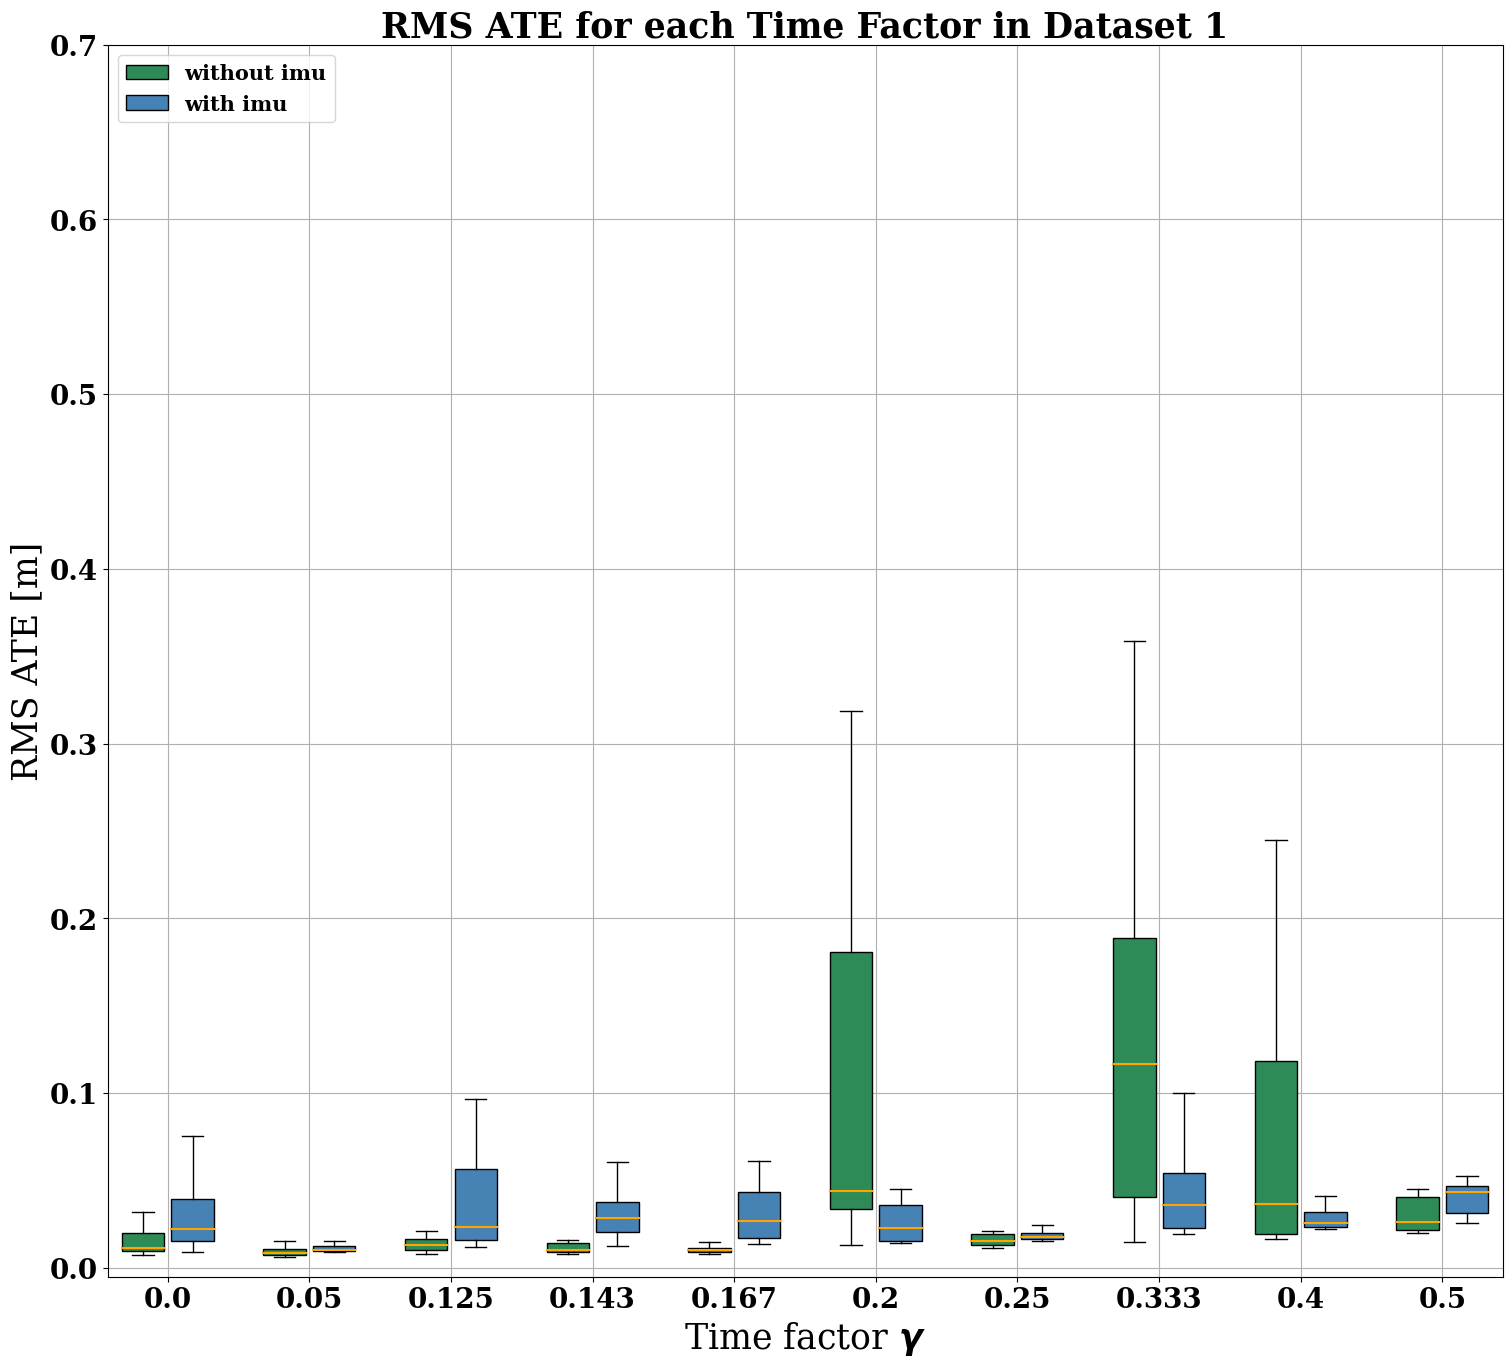

In [47]:
median_orb1, std_orb1, all_data_orb1 = compute_results(imu=imu, system='orb_slam', sub='/result_runs_with_clahe', outliers=True) 
_wi, d_woi = [], []
for data in DATASETS_1: 
    d_wi.append(all_data_orb1[data+'withimu']) 
    d_woi.append(all_data_orb1[data+'withoutimu']) 

fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), medianprops = dict(color = "orange", linewidth = 1.5), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), medianprops = dict(color = "orange", linewidth = 1.5), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.ylim(-0.005, 0.7)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('RMS ATE for each Time Factor in Dataset 1', fontsize='25', fontweight='bold') 
plt.savefig('box_orb1_clahe.png', bbox_inches='tight') 
plt.show()

In [39]:
median_orb1, std_orb1, all_data_orb1 = compute_results(imu=imu, system='orb_slam', sub='/result_runs_with_clahe', outliers=True) 
j = [str(np.round(i,3)) for i in x]
for l, data in enumerate(DATASETS_1): 
    print(f'& {j[l]} & {np.round(np.median(all_data_orb1[data+"withoutimu"]),3)} ({np.round(np.std(all_data_orb1[data+"withoutimu"]),3)}) & {np.round(np.median(all_data_orb1[data+"withimu"]),3)} ({np.round(np.std(all_data_orb1[data+"withimu"]),3)})\\\cline')

& 0.0 & 0.011 (0.016) & 0.022 (0.034)\\cline
& 0.05 & 0.009 (0.003) & 0.01 (0.017)\\cline
& 0.125 & 0.013 (0.028) & 0.024 (0.04)\\cline
& 0.143 & 0.01 (0.012) & 0.029 (0.017)\\cline
& 0.167 & 0.01 (0.003) & 0.027 (0.025)\\cline
& 0.2 & 0.044 (0.166) & 0.023 (0.037)\\cline
& 0.25 & 0.016 (0.106) & 0.018 (0.026)\\cline
& 0.333 & 0.117 (0.138) & 0.036 (0.024)\\cline
& 0.4 & 0.037 (0.153) & 0.026 (0.027)\\cline
& 0.5 & 0.026 (0.058) & 0.044 (0.015)\\cline


### Gaussian blur 

In [14]:
DATASET_GBLUR_1 = ['dataset-room1_512_16_gblur_3', 'dataset-room1_512_16_gblur_9', 'dataset-room1_512_16_gblur_15']
median_gblur1, std_gblur1, all_gblur1 = compute_results(imu=['withoutimu', 'withimu'], system='orb_slam', sub='/result_runs_gblur', datasets=DATASET_GBLUR_1, outliers=False) 
median_org1_mono, std_org1_mono, all_org1_mono = compute_results(imu=['withoutimu'], system='orb_slam', sub='/result_runs_rerun_monocular', datasets=DATASETS_1, outliers=False) 
median_org1, std_org1, all_org1 = compute_results(imu=['withoutimu','withimu'], system='orb_slam', sub='/result_runs', datasets=['dataset-room1_512_16'], outliers=False)

7 outliers removed from dataset-room1_512_16_gblur_3withoutimu
7 outliers removed from dataset-room1_512_16_gblur_9withoutimu
1 outliers removed from dataset-room1_512_16_gblur_15withoutimu
4 outliers removed from dataset-room1_512_16_gblur_3withimu
3 outliers removed from dataset-room1_512_16_gblur_9withimu
4 outliers removed from dataset-room1_512_16_gblur_15withimu
4 outliers removed from dataset-room1_512_16withoutimu
6 outliers removed from dataset-room1_512_16_20withoutimu
9 outliers removed from dataset-room1_512_16_8withoutimu
4 outliers removed from dataset-room1_512_16_7withoutimu
5 outliers removed from dataset-room1_512_16_6withoutimu
2 outliers removed from dataset-room1_512_16_5withoutimu
4 outliers removed from dataset-room1_512_16_4withoutimu
4 outliers removed from dataset-room1_512_16_3withoutimu
7 outliers removed from dataset-room1_512_16_2-5withoutimu
5 outliers removed from dataset-room1_512_16_2withoutimu
5 outliers removed from dataset-room1_512_16withoutimu
0 o

In [15]:
print('--------------- without imu DATASET_GBLUR 1 without CLAHE -------------------') 
for data in DATASET_GBLUR_1:
    d = all_gblur1[data+'withoutimu']
    print(f'{data}: {np.round(np.median(d),3)} ({np.round(np.std(d),3)})')
print('----------------- with imu DATASET_GBLUR 1 without CLAHE ---------------------') 
for data in DATASET_GBLUR_1:
    d = all_gblur1[data+'withimu']
    print(f'{data}: {np.round(np.median(d),3)} ({np.round(np.std(d),3)})')

--------------- without imu DATASET_GBLUR 1 without CLAHE -------------------
dataset-room1_512_16_gblur_3: 0.011 (0.005)
dataset-room1_512_16_gblur_9: 0.015 (0.004)
dataset-room1_512_16_gblur_15: 0.037 (0.026)
----------------- with imu DATASET_GBLUR 1 without CLAHE ---------------------
dataset-room1_512_16_gblur_3: 0.013 (0.008)
dataset-room1_512_16_gblur_9: 0.018 (0.01)
dataset-room1_512_16_gblur_15: 0.015 (0.002)


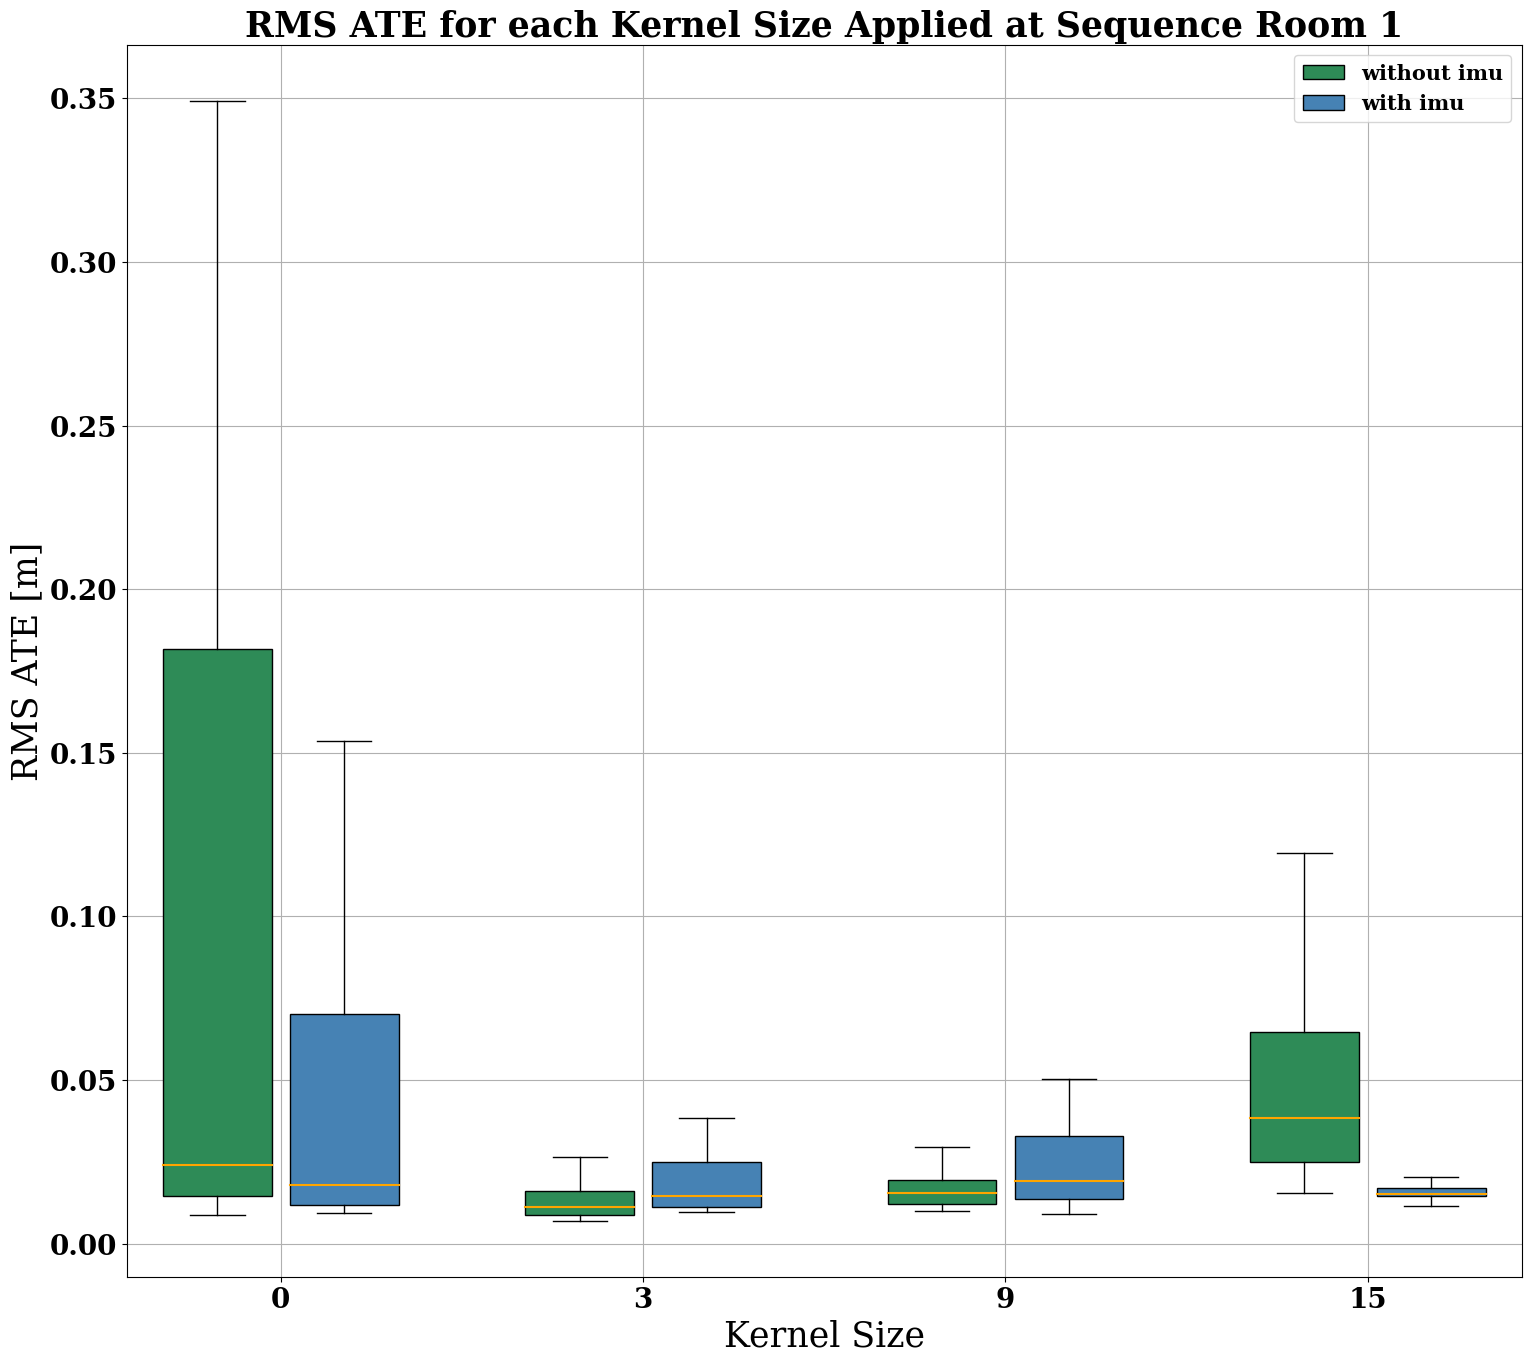

In [16]:
DATASET_GBLUR_1 = ['dataset-room1_512_16_gblur_3', 'dataset-room1_512_16_gblur_9', 'dataset-room1_512_16_gblur_15']
median_gblur1, std_gblur1, all_gblur1 = compute_results(imu=['withoutimu', 'withimu'], system='orb_slam', sub='/result_runs_gblur', datasets=DATASET_GBLUR_1, outliers=True) 
median_org1_mono, std_org1_mono, all_org1_mono = compute_results(imu=['withoutimu'], system='orb_slam', sub='/result_runs_rerun_monocular', datasets=DATASETS_1, outliers=True) 
median_org1, std_org1, all_org1 = compute_results(imu=['withoutimu','withimu'], system='orb_slam', sub='/result_runs', datasets=['dataset-room1_512_16'], outliers=True)
d_wi, d_woi = [], []
d_wi.append(all_org1['dataset-room1_512_16withimu']) 
d_woi.append(all_org1_mono['dataset-room1_512_16withoutimu'])
             
for data in DATASET_GBLUR_1: 
    d_wi.append(all_gblur1[data+'withimu']) 
    d_woi.append(all_gblur1[data+'withoutimu']) 
             
fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), medianprops = dict(color = "orange", linewidth = 1.5), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), medianprops = dict(color = "orange", linewidth = 1.5), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper right', fontsize='15')
ticks = [str(np.round(j,3)) for j in [0,3,9,15]]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel('Kernel Size', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('RMS ATE for each Kernel Size Applied at Sequence Room 1', fontsize='25', fontweight='bold') 
plt.savefig('gblur_orb1.png', bbox_inches='tight') 
plt.show()

#### Octaves

In [36]:
d = []
count1 = []
for data in DATASETS_1: 
    o1 = get_mean_octs('withoutimu', system='orb_slam', sub='/result_runs', sequence=data) 
    d.append((o1/sum(o1))*100) 
    count1.append(sum(o1)) 

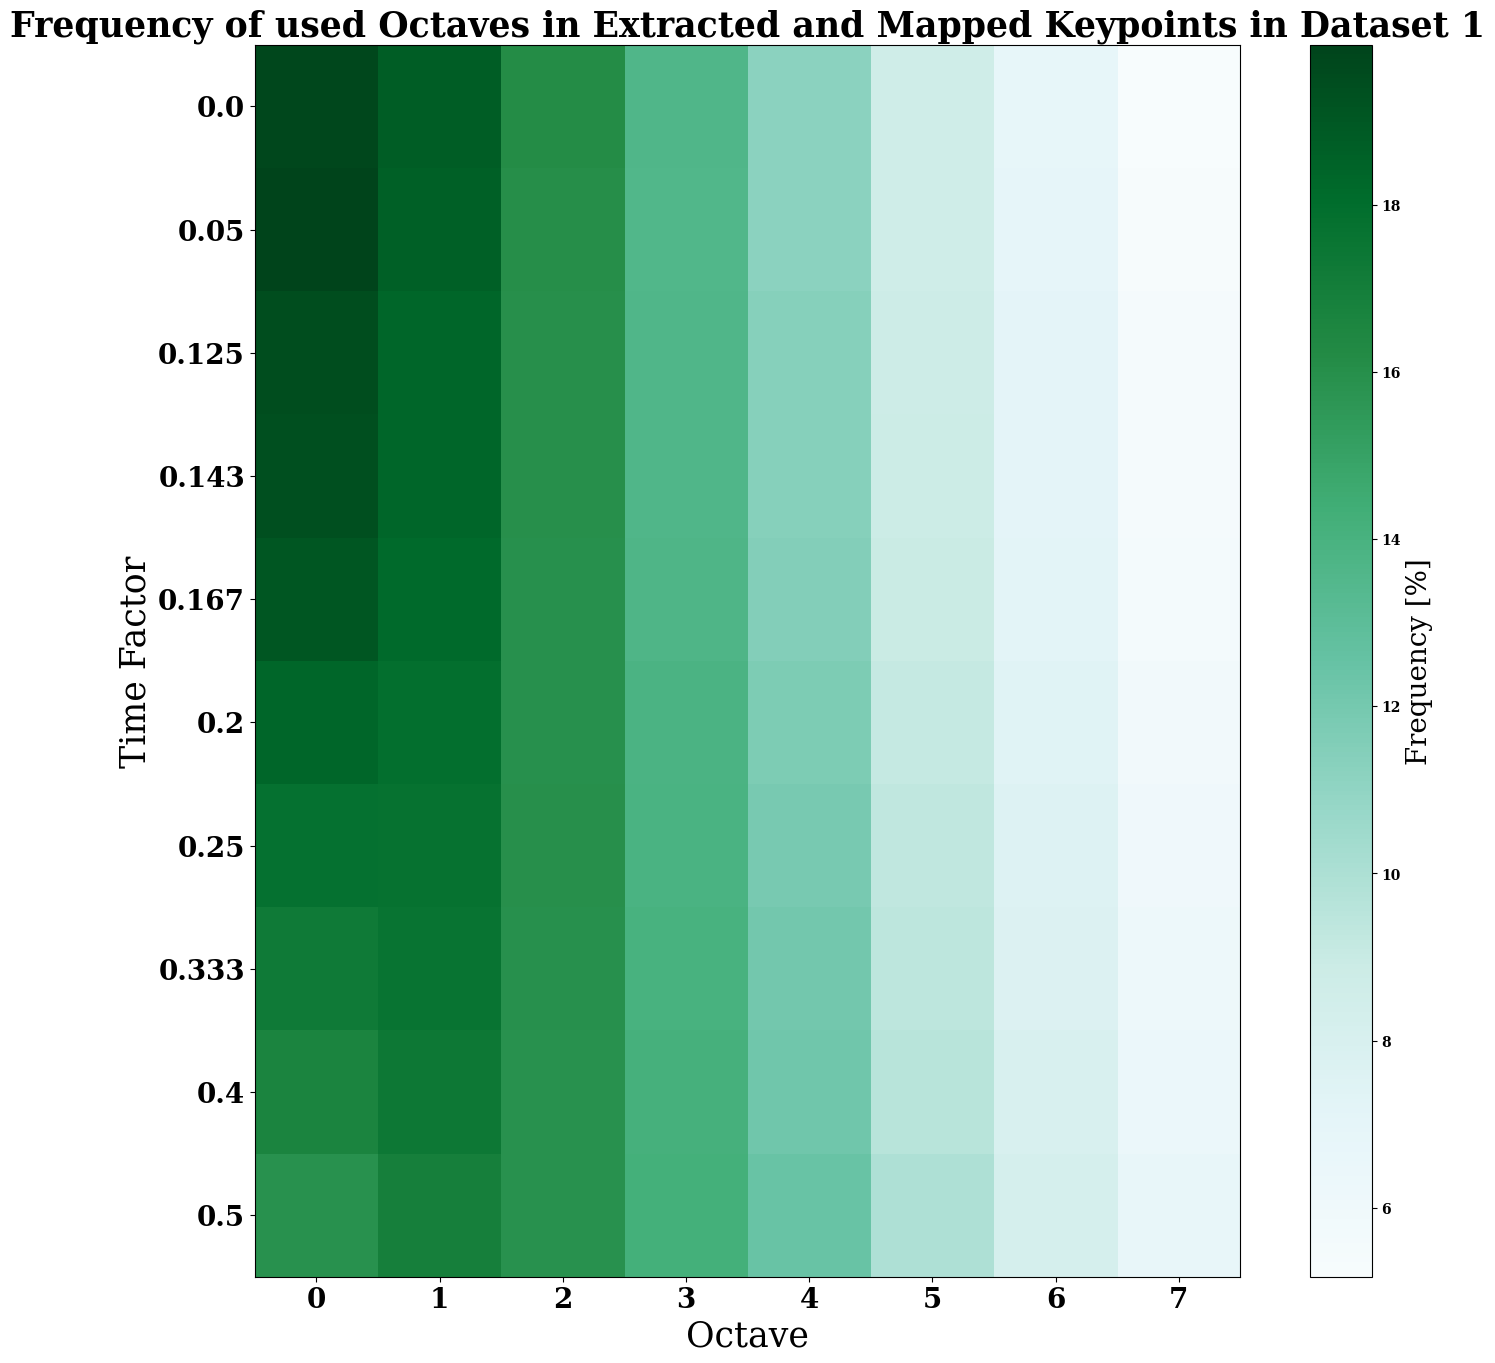

In [38]:
j = [str(np.round(i,3)) for i in x]
# Create the heatmap
plt.imshow(d, cmap='BuGn', interpolation='nearest')
colorbar = plt.colorbar()
colorbar.set_label('Frequency [%]', fontsize='20')
plt.yticks(np.arange(len(j)), j)
plt.xlabel('Octave', fontsize='25')
plt.ylabel('Time Factor', fontsize='25')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Frequency of used Octaves in Extracted and Mapped Keypoints in Dataset 1', fontsize='25', fontweight='bold')
plt.savefig('heatmap_mono_1.png', bbox_inches='tight')
plt.show()

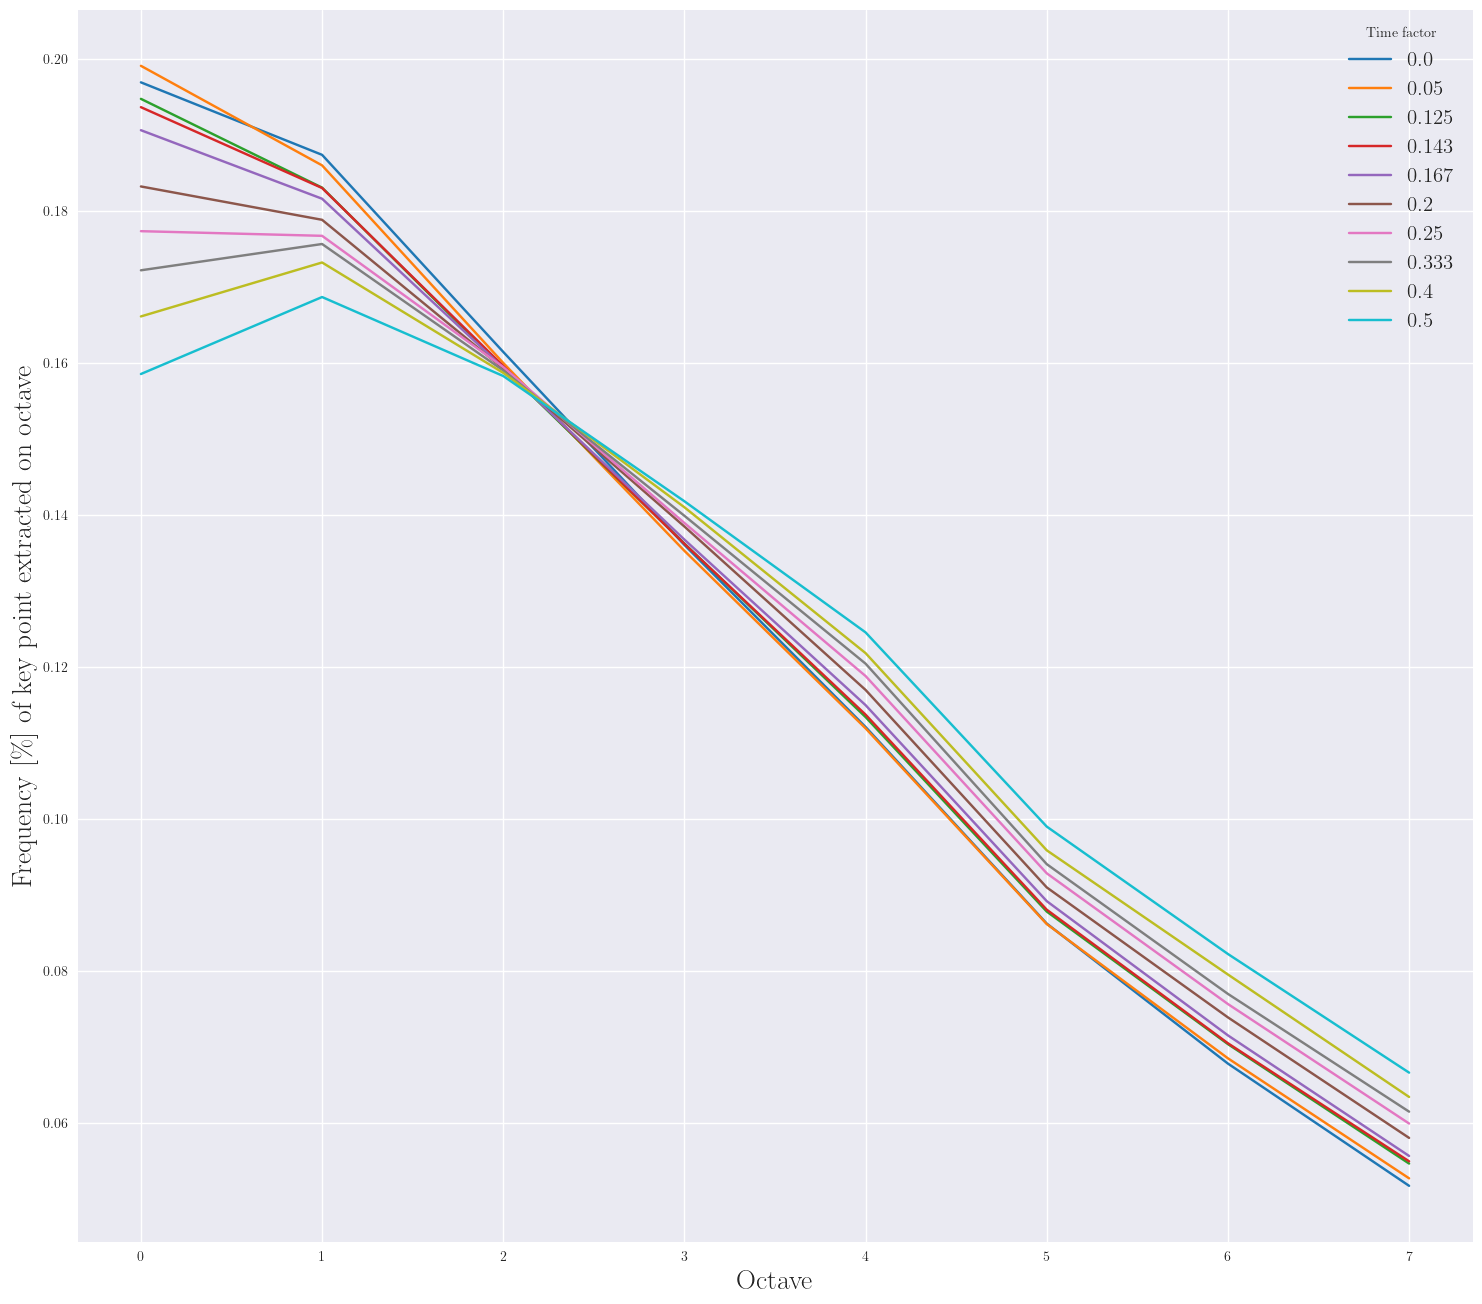

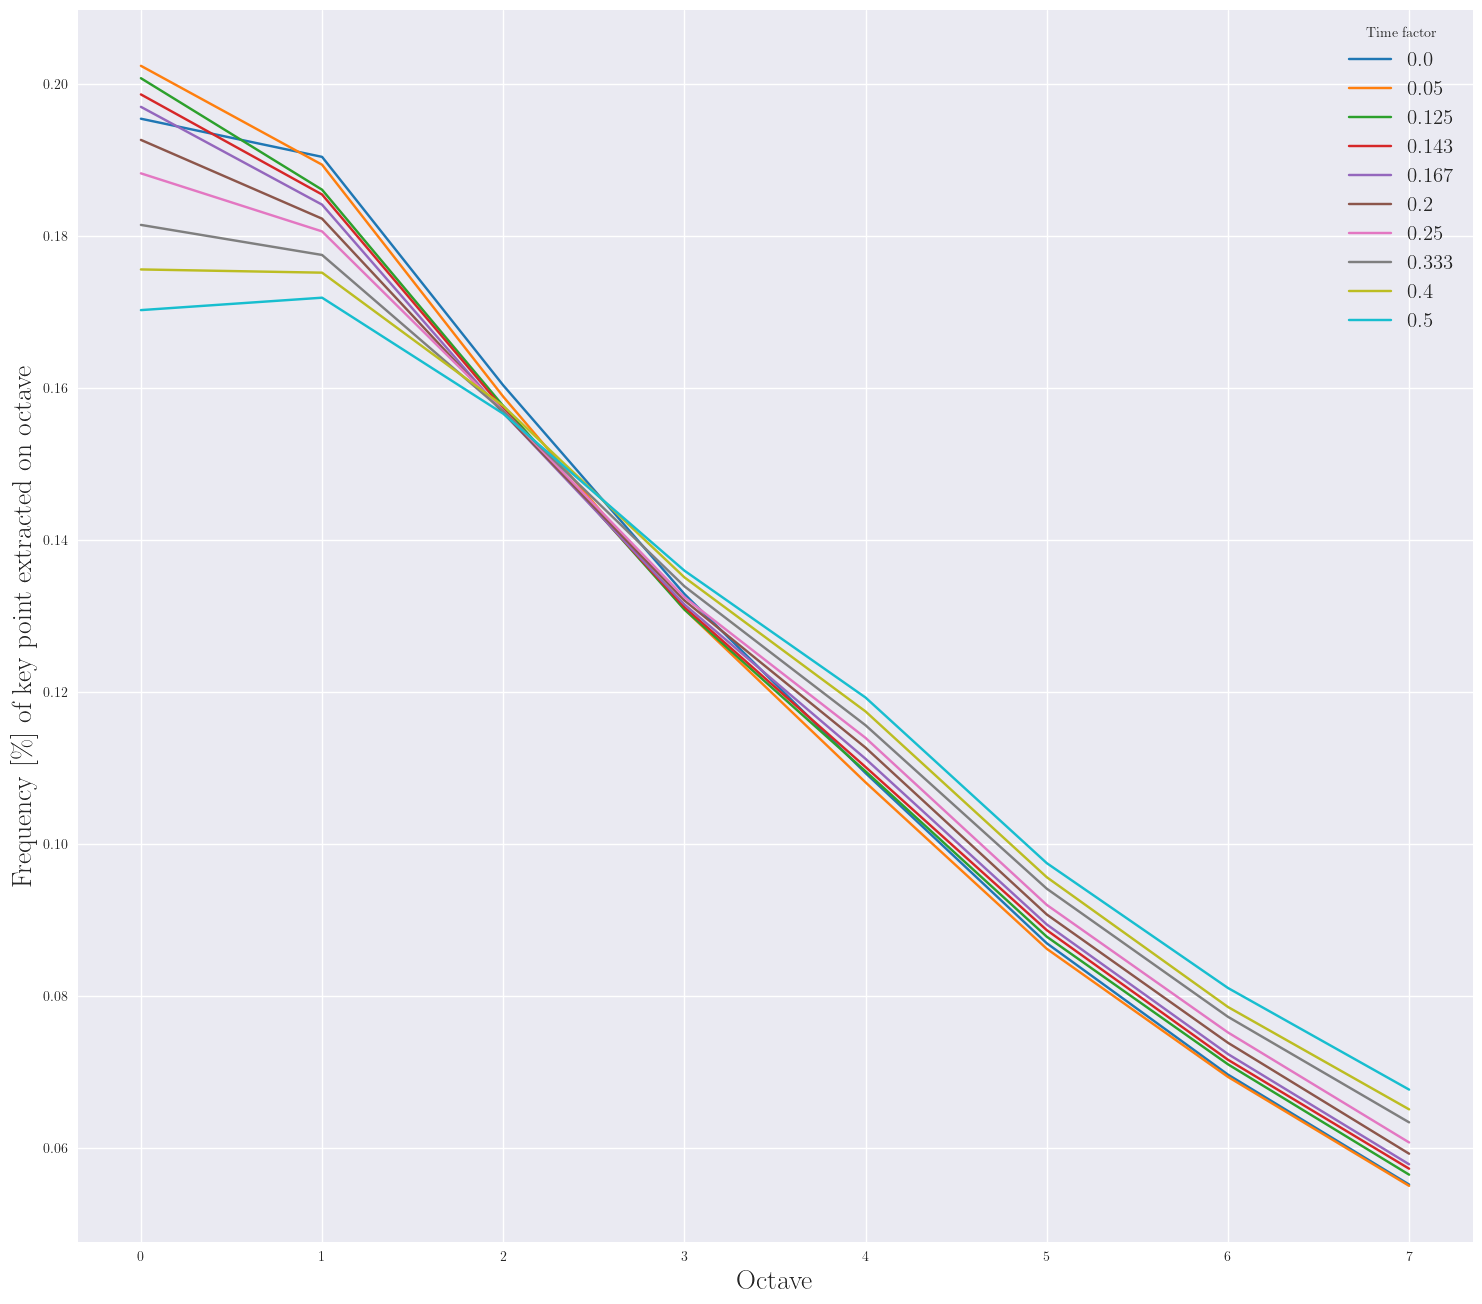

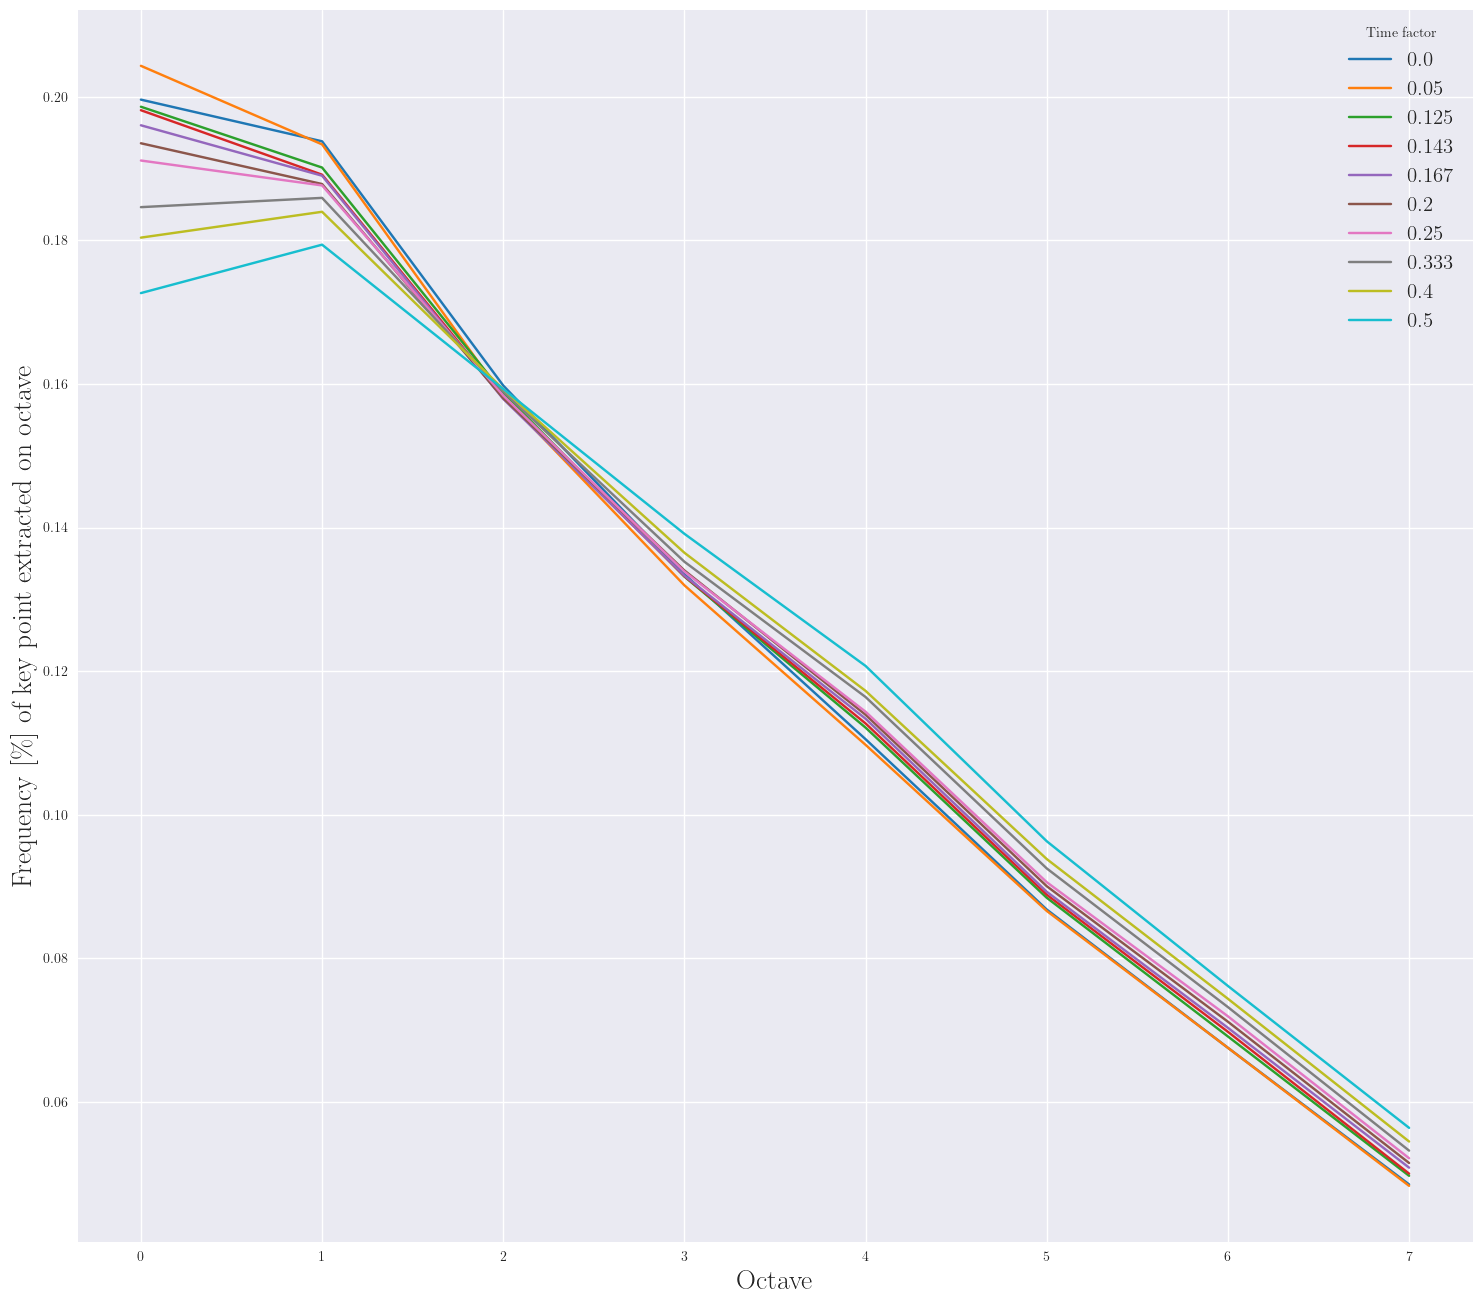

In [49]:
#plt.figure(figsize=(10,8))
#for data in DATASETS_1: 
#    o = get_mean_octs('withimu', system='orb_slam', sub='/result_runs', sequence=data) 
#    #plt.plot((o-min(o))/(max(o)-min(o)), label=data) 
#    plt.plot(o/sum(o),label=str(time_factor[data]))
#plt.xlabel('octave') 
#plt.ylabel('frequency [\%] of key point extracted on octave') 
#plt.legend()
#plt.show()
colors_x = plt.cm.Set3(np.linspace(0, 1, 10))
color_palette = plt.get_cmap('tab10')

for i, data in enumerate(DATASETS_1): 
    o = get_mean_octs('withoutimu', system='orb_slam', sub='/result_runs', sequence=data) 
    #plt.plot((o-min(o))/(max(o)-min(o)), label=data) 
    if time_factor[data] == 0: 
        plt.plot(o/sum(o),label='0.0', color=color_palette(i))
    else: 
        plt.plot(o/sum(o),label=str(np.round(1/time_factor[data],3)), color=color_palette(i))

plt.xlabel('Octave',  fontsize='20', fontweight='bold') 
plt.ylabel('Frequency [\%] of key point extracted on octave',  fontsize='20', fontweight='bold') 
plt.legend(title="Time factor",  fontsize='15')
plt.savefig('octaves1.png', bbox_inches='tight') 
plt.show()

for i, data in enumerate(DATASETS_2): 
    o = get_mean_octs('withoutimu', system='orb_slam', sub='/result_runs', sequence=data) 
    #plt.plot((o-min(o))/(max(o)-min(o)), label=data) 
    if time_factor[data] == 0: 
        plt.plot(o/sum(o),label='0.0', color=color_palette(i))
    else: 
        plt.plot(o/sum(o),label=str(np.round(1/time_factor[data],3)), color=color_palette(i))

plt.xlabel('Octave',  fontsize='20', fontweight='bold') 
plt.ylabel('Frequency [\%] of key point extracted on octave',  fontsize='20', fontweight='bold') 
plt.legend(title="Time factor",  fontsize='15')
plt.savefig('octaves2.png', bbox_inches='tight') 
plt.show()

for i, data in enumerate(DATASETS_3): 
    o = get_mean_octs('withoutimu', system='orb_slam', sub='/result_runs', sequence=data) 
    #plt.plot((o-min(o))/(max(o)-min(o)), label=data) 
    if time_factor[data] == 0: 
        plt.plot(o/sum(o),label='0.0', color=color_palette(i))
    else: 
        plt.plot(o/sum(o),label=str(np.round(1/time_factor[data],3)), color=color_palette(i))

plt.xlabel('Octave',  fontsize='20', fontweight='bold') 
plt.ylabel('Frequency [\%] of key point extracted on octave',  fontsize='20', fontweight='bold') 
plt.legend(title="Time factor",  fontsize='15')
plt.savefig('octaves3.png', bbox_inches='tight') 
plt.show()

## Dataset 2 

In [17]:
median_orb2, std_orb2, all_orb2 = compute_results(imu=['withimu', 'withoutimu'], system='orb_slam', sub='/result_runs_with_clahe', datasets=['dataset-room2_512_16'],outliers=False) 

# Compare to article: 
print('------ Original Dataset 2 ---------')
print(f"Monocular: {np.round(np.median(all_orb2['dataset-room2_512_16withoutimu']), 3)} ({np.round(np.std(all_orb2['dataset-room2_512_16withoutimu']), 3)}) (0.026)")
print(f"Monocular-Inertial: {np.round(np.median(all_orb2['dataset-room2_512_16withimu']), 3)} ({np.round(np.std(all_orb2['dataset-room2_512_16withimu']), 3)}) (0.018)")
print('-----------------------------------')

0 outliers removed from dataset-room2_512_16withimu
7 outliers removed from dataset-room2_512_16withoutimu
------ Original Dataset 2 ---------
Monocular: 0.01 +-0.022 (0.026)
Monocular-Inertial: 0.012 (0.002) (0.018)
-----------------------------------


### Result runs 

In [36]:
res_t_orb_2, std_t_orb_2, tot_t_orb_2 = compute_results(imu=['withimu', 'withoutimu'], system='orb_slam', sub='/result_runs', datasets=DATASETS_2, outliers=False)
res_t_orb_2_mono, std_t_orb_2_mono, tot_t_orb_2_mono = compute_results(imu=['withoutimu'], system='orb_slam', sub='/result_runs_rerun_monocular', datasets=DATASETS_2, outliers=False)
print('--------------- without imu DATASET 2 without CLAHE -------------------') 
for data in DATASETS_2:
    d = tot_t_orb_2_mono[data+'withoutimu']
    print(f'{data}: {np.round(np.median(d),3)} ({np.round(np.std(d),3)})')
print('----------------- with imu DATASET 2 without CLAHE ---------------------') 
for data in DATASETS_2:
    d = tot_t_orb_2[data+'withimu']
    print(f'{data}: {np.round(np.median(d),3)} ({np.round(np.std(d),3)})')

5 outliers removed from dataset-room2_512_16withimu
0 outliers removed from dataset-room2_512_16_20withimu
2 outliers removed from dataset-room2_512_16_8withimu
0 outliers removed from dataset-room2_512_16_7withimu
2 outliers removed from dataset-room2_512_16_6withimu
2 outliers removed from dataset-room2_512_16_5withimu
1 outliers removed from dataset-room2_512_16_4withimu
3 outliers removed from dataset-room2_512_16_3withimu
2 outliers removed from dataset-room2_512_16_2-5withimu
1 outliers removed from dataset-room2_512_16_2withimu
4 outliers removed from dataset-room2_512_16withoutimu
5 outliers removed from dataset-room2_512_16_20withoutimu
4 outliers removed from dataset-room2_512_16_8withoutimu
9 outliers removed from dataset-room2_512_16_7withoutimu
3 outliers removed from dataset-room2_512_16_6withoutimu
5 outliers removed from dataset-room2_512_16_5withoutimu
4 outliers removed from dataset-room2_512_16_4withoutimu
4 outliers removed from dataset-room2_512_16_3withoutimu
6 ou

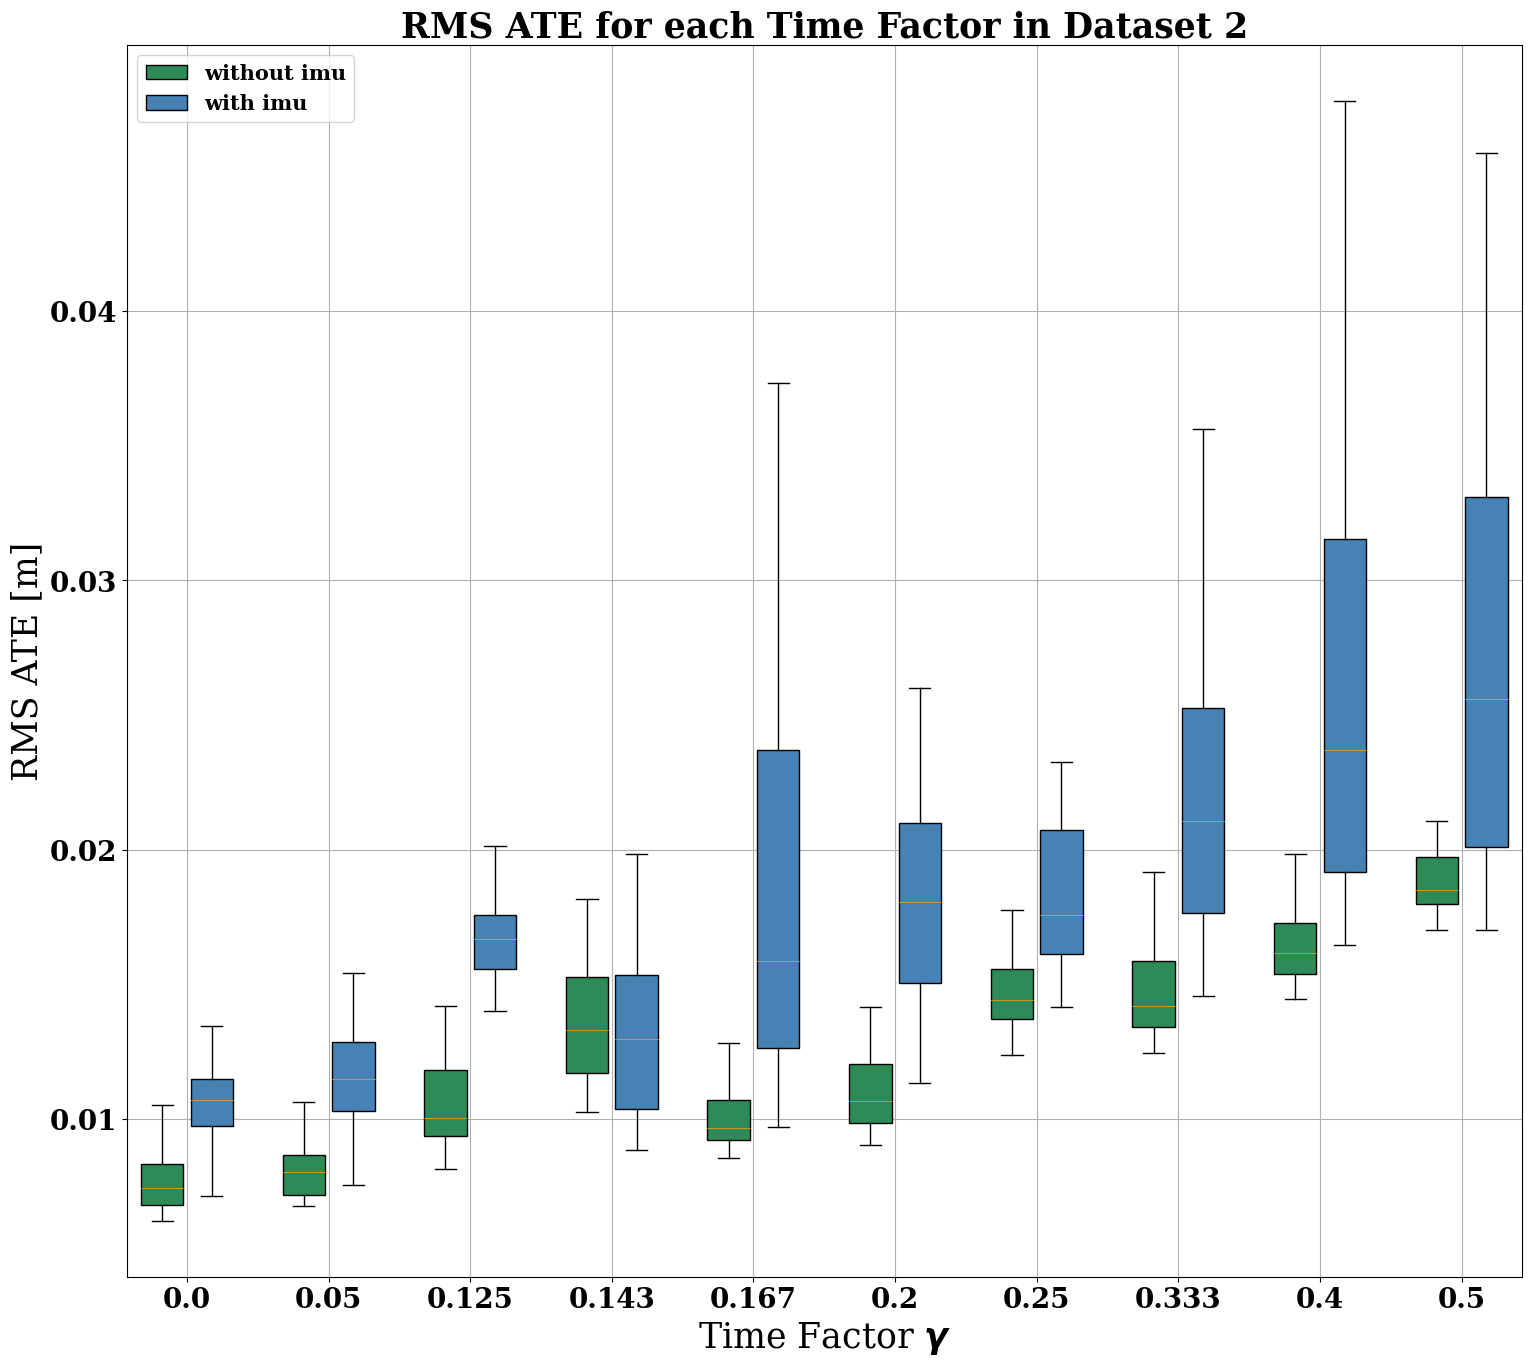

In [63]:
res_t_orb_2, std_t_orb_2, tot_t_orb_2 = compute_results(imu=['withimu', 'withoutimu'], system='orb_slam', sub='/result_runs', datasets=DATASETS_2, outliers=True)
res_t_orb_2_mono, std_t_orb_2_mono, tot_t_orb_2_mono = compute_results(imu=['withoutimu'], system='orb_slam', sub='/result_runs_rerun_monocular', datasets=DATASETS_2, outliers=True)
d_wi, d_woi = [], []
for data in DATASETS_2: 
    d_wi.append(tot_t_orb_2[data+'withimu']) 
    d_woi.append(tot_t_orb_2_mono[data+'withoutimu']) 

fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), medianprops = dict(color = "orange", linewidth = 0.5), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), medianprops = dict(color = "orange", linewidth = 0.5), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('RMS ATE for each Time Factor in Dataset 2', fontsize='25', fontweight='bold') 
plt.savefig('box_orb2X.png', bbox_inches='tight') 
plt.show()

### With CLAHE 

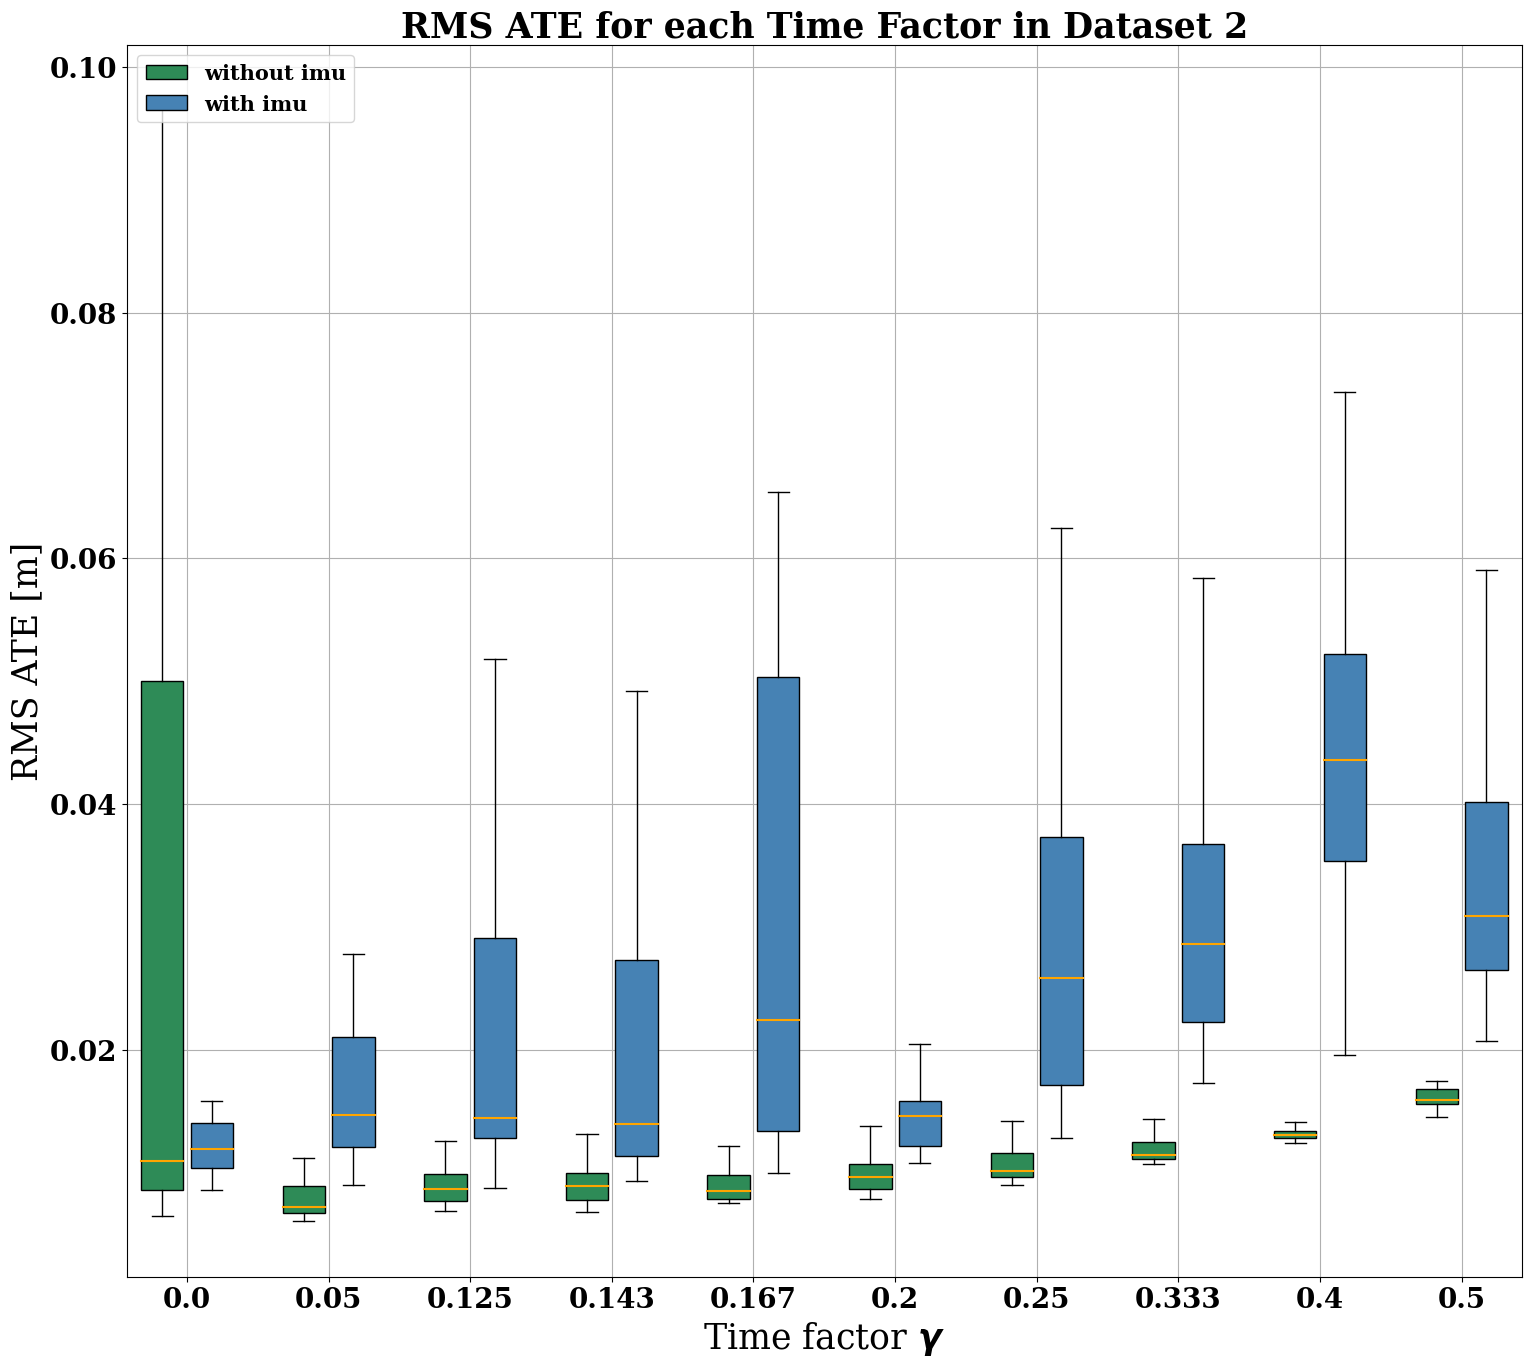

In [53]:
median_orb2, std_orb2, all_data_orb2 = compute_results(imu=imu, system='orb_slam', sub='/result_runs_with_clahe', datasets=DATASETS_2, outliers=True) 
d_wi, d_woi = [], []
for data in DATASETS_2: 
    d_wi.append(all_data_orb2[data+'withimu']) 
    d_woi.append(all_data_orb2[data+'withoutimu']) 

fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), medianprops = dict(color = "orange", linewidth = 1.5), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), medianprops = dict(color = "orange", linewidth = 1.5), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('RMS ATE for each Time Factor in Dataset 2', fontsize='25', fontweight='bold') 
plt.savefig('box_orb2_clahe.png', bbox_inches='tight') 
plt.show()

In [43]:
median_orb2, std_orb2, all_data_orb2 = compute_results(imu=imu, system='orb_slam', sub='/result_runs_with_clahe', datasets=DATASETS_2, outliers=True) 
j = [str(np.round(i,3)) for i in x]
for l, data in enumerate(DATASETS_2): 
    print(f'& {j[l]} & {np.round(np.median(all_data_orb2[data+"withoutimu"]),3)} ({np.round(np.std(all_data_orb2[data+"withoutimu"]),3)}) & {np.round(np.median(all_data_orb2[data+"withimu"]),3)} ({np.round(np.std(all_data_orb2[data+"withimu"]),3)}) \\\\\cline')

& 0.0 & 0.011 (0.317) & 0.012 (0.002) \\\cline
& 0.05 & 0.007 (0.007) & 0.015 (0.005) \\\cline
& 0.125 & 0.009 (0.003) & 0.014 (0.032) \\\cline
& 0.143 & 0.009 (0.002) & 0.014 (0.025) \\\cline
& 0.167 & 0.009 (0.002) & 0.022 (0.024) \\\cline
& 0.2 & 0.01 (0.002) & 0.015 (0.002) \\\cline
& 0.25 & 0.01 (0.002) & 0.026 (0.019) \\\cline
& 0.333 & 0.011 (0.001) & 0.029 (0.016) \\\cline
& 0.4 & 0.013 (0.001) & 0.044 (0.018) \\\cline
& 0.5 & 0.016 (0.001) & 0.031 (0.015) \\\cline


### Gaussian Blur

In [5]:
DATASET_GBLUR_2 = ['dataset-room2_512_16_gblur_3', 'dataset-room2_512_16_gblur_9', 'dataset-room2_512_16_gblur_15']
median_gblur2, std_gblur2, all_gblur2 = compute_results(imu=['withoutimu', 'withimu'], system='orb_slam', sub='/result_runs_gblur', datasets=DATASET_GBLUR_2) 
#median_org1_mono, std_org1_mono, all_org1_mono = compute_results(imu=['withoutimu'], system='orb_slam', sub='/result_runs_rerun_monocular', datasets=DATASETS_1) 
median_org2, std_org2, all_org2 = compute_results(imu=['withoutimu','withimu'], system='orb_slam', sub='/result_runs', datasets=DATASETS_2)

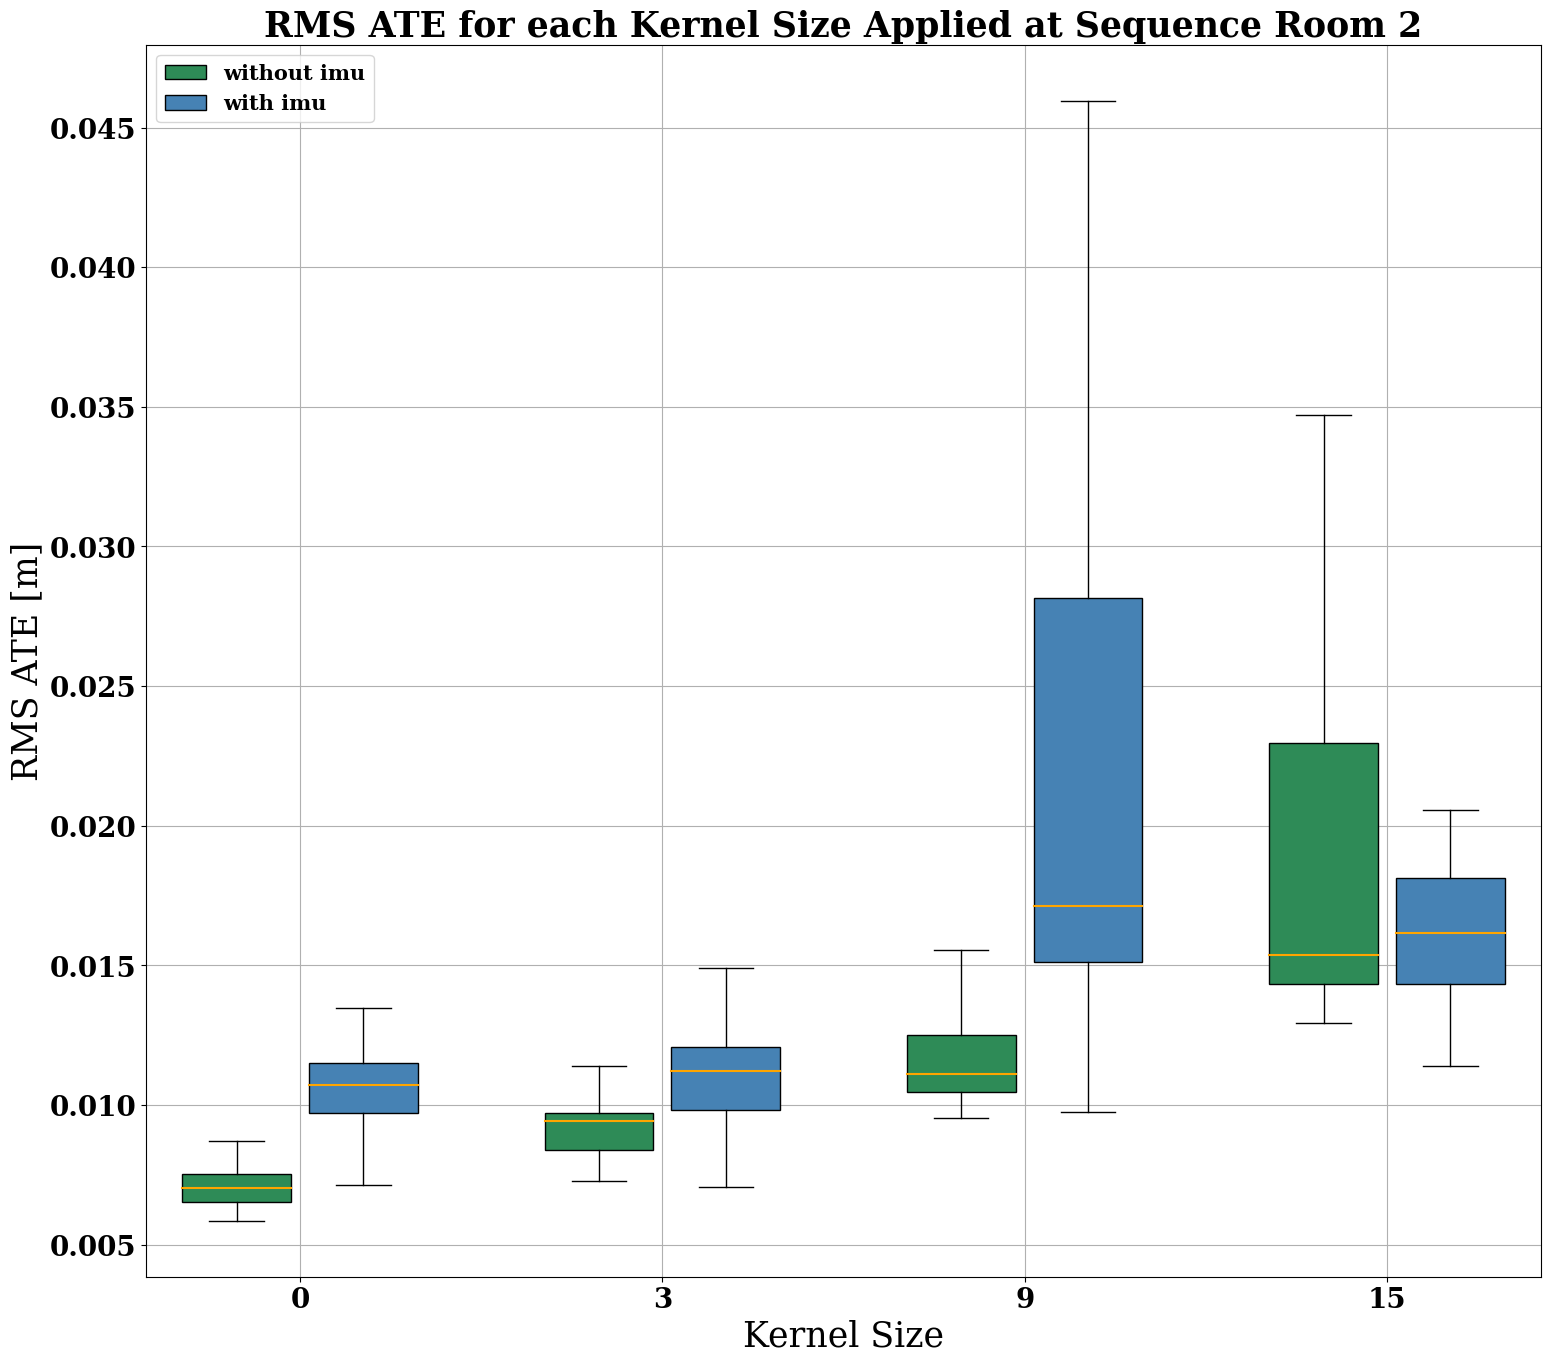

In [64]:
d_wi, d_woi = [], []
d_wi.append(all_org2['dataset-room2_512_16withimu']) 
d_woi.append(all_org2['dataset-room2_512_16withoutimu'])
             
for data in DATASET_GBLUR_2: 
    d_wi.append(all_gblur2[data+'withimu']) 
    d_woi.append(all_gblur2[data+'withoutimu']) 
             
fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), medianprops = dict(color = "orange", linewidth = 1.5), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), medianprops = dict(color = "orange", linewidth = 1.5), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in [0,3,9,15]]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel('Kernel Size', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('RMS ATE for each Kernel Size Applied at Sequence Room 2', fontsize='25', fontweight='bold') 
plt.savefig('gblur_orb2.png', bbox_inches='tight') 
plt.show()

#### Octaves 

In [40]:
d = []
for data in DATASETS_2: 
    o = get_mean_octs('withimu', system='orb_slam', sub='/result_runs', sequence=data) 
    d.append((o/sum(o))*100) 

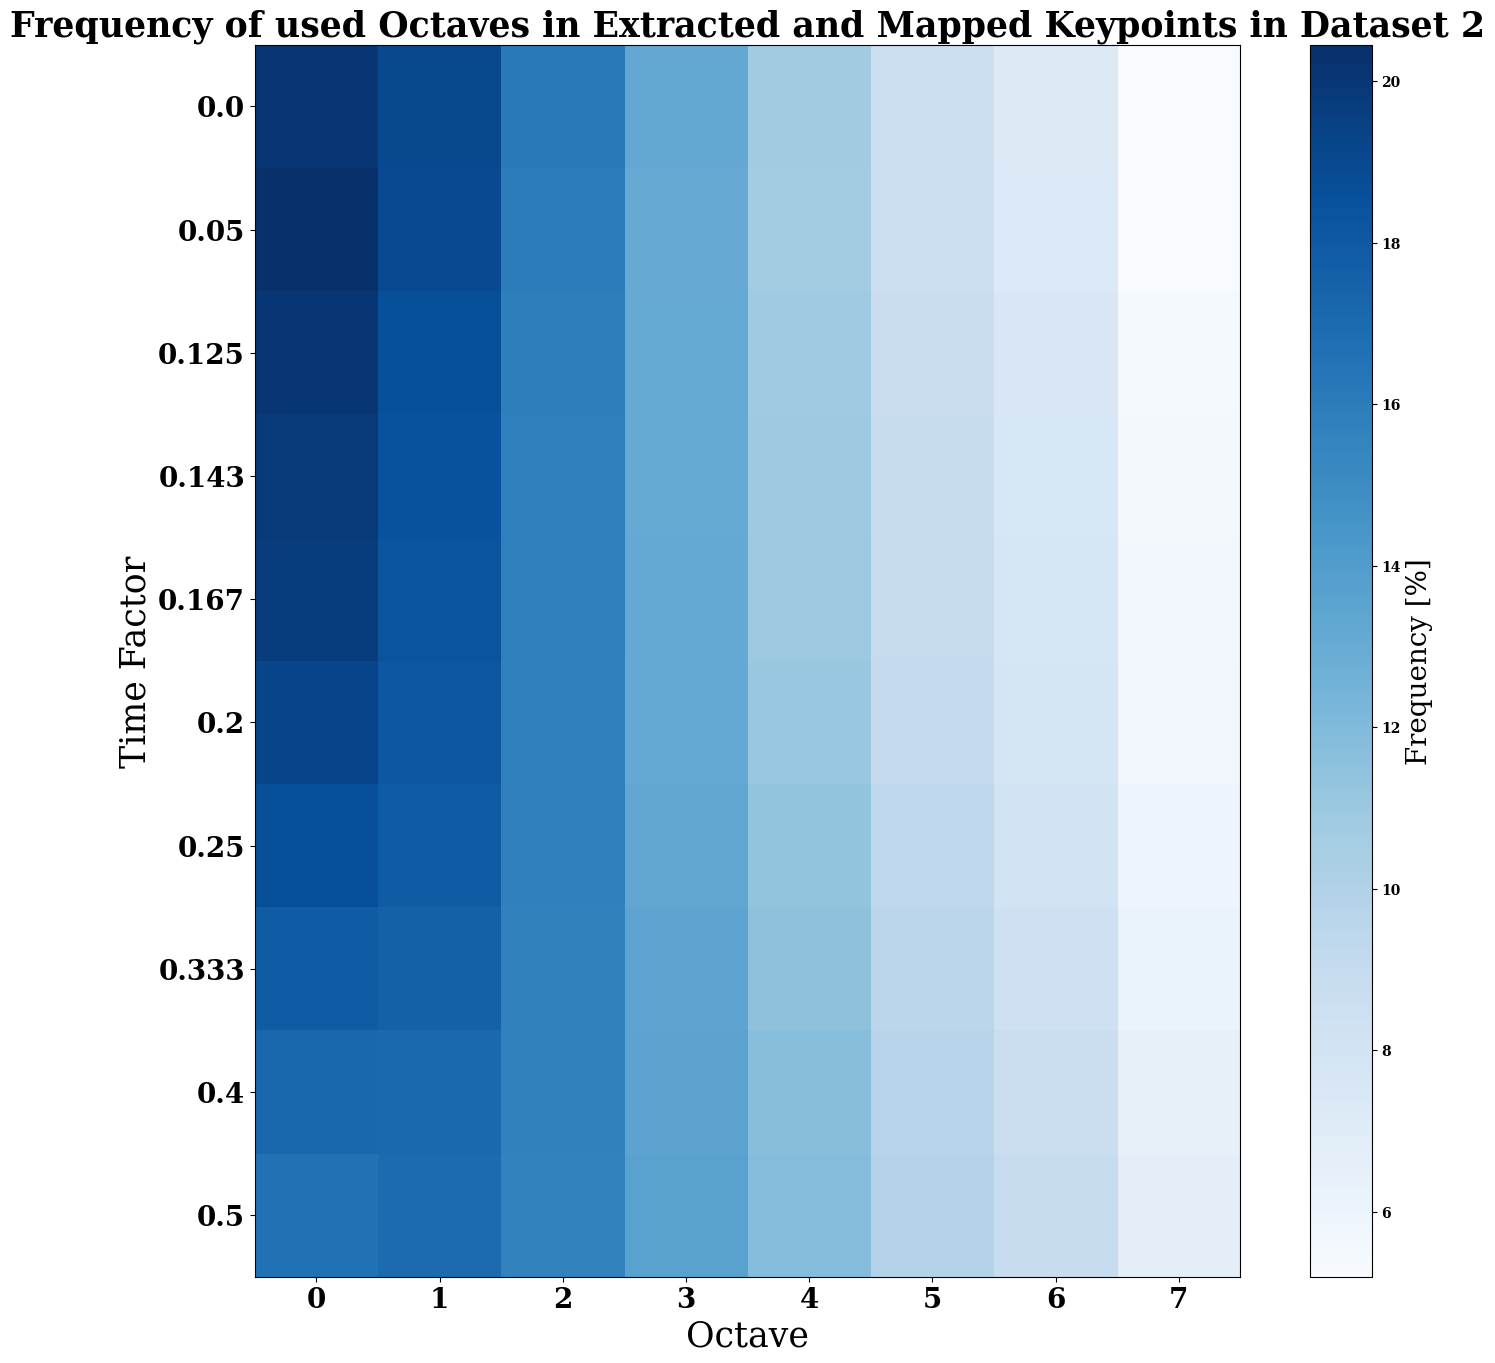

In [41]:
data = o.reshape(1, -1)
j = [str(np.round(i,3)) for i in x]
# Create the heatmap
plt.imshow(d, cmap='Blues', interpolation='nearest') #BuGN
colorbar = plt.colorbar()
colorbar.set_label('Frequency [%]', fontsize='20')
plt.yticks(np.arange(len(j)), j)
plt.xlabel('Octave', fontsize='25')
plt.ylabel('Time Factor', fontsize='25')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Frequency of used Octaves in Extracted and Mapped Keypoints in Dataset 2', fontsize='25', fontweight='bold')
plt.savefig('heatmap_monoinertial_2.png', bbox_inches='tight')
plt.show()

## Dataset 3 

In [6]:
median_orb3, std_orb3, all_orb3 = compute_results(imu=['withoutimu','withimu'], system='orb_slam', sub='/result_runs_with_clahe', datasets=DATASETS_3, outliers=False) 

# Compare to article: 
print('------ Original Dataset 2 ---------')
print(f"Monocular: {np.round(np.median(all_orb3['dataset-room3_512_16withoutimu']), 3)} ({np.round(np.std(all_orb3['dataset-room3_512_16withoutimu']), 3)}) (0.026)")
print(f"Monocular-Inertial: {np.round(np.median(all_orb3['dataset-room3_512_16withimu']), 3)} +-{np.round(np.std(all_orb3['dataset-room3_512_16withimu']), 3)} (0.018)")
print('-----------------------------------')

9 outliers removed from dataset-room3_512_16withoutimu
3 outliers removed from dataset-room3_512_16_20withoutimu
9 outliers removed from dataset-room3_512_16_8withoutimu
4 outliers removed from dataset-room3_512_16_7withoutimu
6 outliers removed from dataset-room3_512_16_6withoutimu
7 outliers removed from dataset-room3_512_16_5withoutimu
3 outliers removed from dataset-room3_512_16_4withoutimu
2 outliers removed from dataset-room3_512_16_3withoutimu
8 outliers removed from dataset-room3_512_16_2-5withoutimu
5 outliers removed from dataset-room3_512_16_2withoutimu
6 outliers removed from dataset-room3_512_16withimu
5 outliers removed from dataset-room3_512_16_20withimu
3 outliers removed from dataset-room3_512_16_8withimu
5 outliers removed from dataset-room3_512_16_7withimu
7 outliers removed from dataset-room3_512_16_6withimu
1 outliers removed from dataset-room3_512_16_5withimu
5 outliers removed from dataset-room3_512_16_4withimu
4 outliers removed from dataset-room3_512_16_3withim

### Result runs 

In [24]:
res_t_orb_3, std_t_orb_3, tot_t_orb_3 = compute_results(imu=['withimu', 'withoutimu'], system='orb_slam', sub='/result_runs', datasets=DATASETS_3, outliers=False) 
orb_median_3_mono, orb_std_3_mono, orb_all_3_mono = compute_results(imu=['withoutimu'], system='orb_slam', sub='/result_runs_rerun_monocular', datasets=DATASETS_3, outliers=False) 

# Compare to article: 
print('------ Original Dataset 3 without CLAHE equalization ---------')
print(f"Monocular: {np.round(np.median(orb_all_3_mono['dataset-room3_512_16withoutimu']), 3)} ({np.round(np.std(orb_all_3_mono['dataset-room3_512_16withoutimu']), 3)}) (0.026)")
print(f"Monocular-Inertial: {np.round(np.median(tot_t_orb_3['dataset-room3_512_16withimu']), 3)} ({np.round(np.std(tot_t_orb_3['dataset-room3_512_16withimu']), 3)}) (0.008)")
print('-----------------------------------------------------------')

for i in imu: 
    print(f'------ {i} -------')
    for data in DATASETS_3:
        d = tot_t_orb_3[data+i]
        print(f'{data}: {np.round(np.median(d),3)} ({np.round(np.std(d),3)})')

0 outliers removed from dataset-room3_512_16withimu
5 outliers removed from dataset-room3_512_16_20withimu
2 outliers removed from dataset-room3_512_16_8withimu
1 outliers removed from dataset-room3_512_16_7withimu
4 outliers removed from dataset-room3_512_16_6withimu
2 outliers removed from dataset-room3_512_16_5withimu
4 outliers removed from dataset-room3_512_16_4withimu
4 outliers removed from dataset-room3_512_16_3withimu
2 outliers removed from dataset-room3_512_16_2-5withimu
2 outliers removed from dataset-room3_512_16_2withimu
2 outliers removed from dataset-room3_512_16withoutimu
1 outliers removed from dataset-room3_512_16_20withoutimu
7 outliers removed from dataset-room3_512_16_8withoutimu
4 outliers removed from dataset-room3_512_16_7withoutimu
4 outliers removed from dataset-room3_512_16_6withoutimu
2 outliers removed from dataset-room3_512_16_5withoutimu
1 outliers removed from dataset-room3_512_16_4withoutimu
2 outliers removed from dataset-room3_512_16_3withoutimu
6 ou

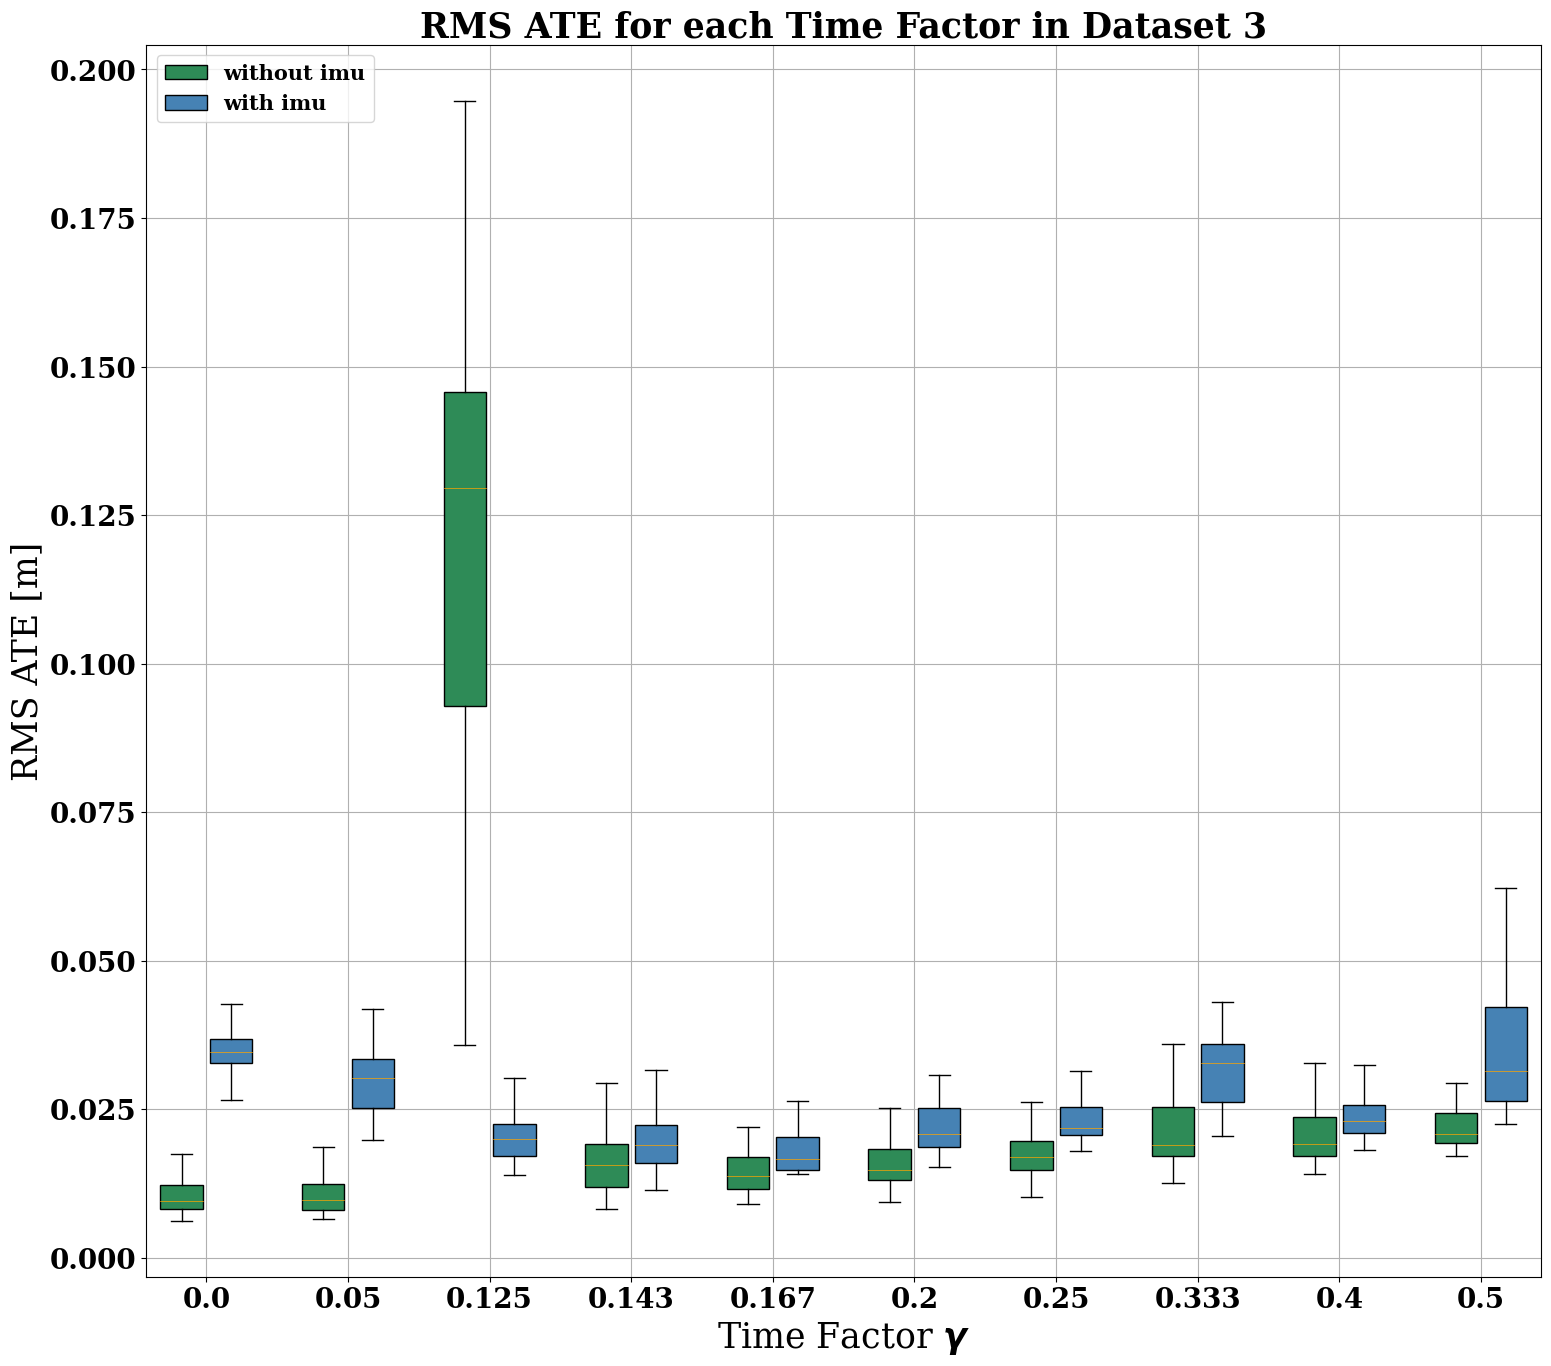

In [4]:
res_t_orb_3, std_t_orb_3, tot_t_orb_3 = compute_results(imu=['withimu', 'withoutimu'], system='orb_slam', sub='/result_runs', datasets=DATASETS_3, outliers=True) 
orb_median_3_mono, orb_std_3_mono, orb_all_3_mono = compute_results(imu=['withoutimu'], system='orb_slam', sub='/result_runs_rerun_monocular', datasets=DATASETS_3, outliers=True) 
d_wi, d_woi = [], []
for data in DATASETS_3: 
    d_wi.append(tot_t_orb_3[data+'withimu']) 
    d_woi.append(orb_all_3_mono[data+'withoutimu']) 

fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), medianprops = dict(color = "orange", linewidth = 0.5), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), medianprops = dict(color = "orange", linewidth = 0.5),showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
#plt.ylim(0.0, 1.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('RMS ATE for each Time Factor in Dataset 3', fontsize='25', fontweight='bold') 
plt.savefig('box_orb3X.png', bbox_inches='tight') 
plt.show()

### With CLAHE

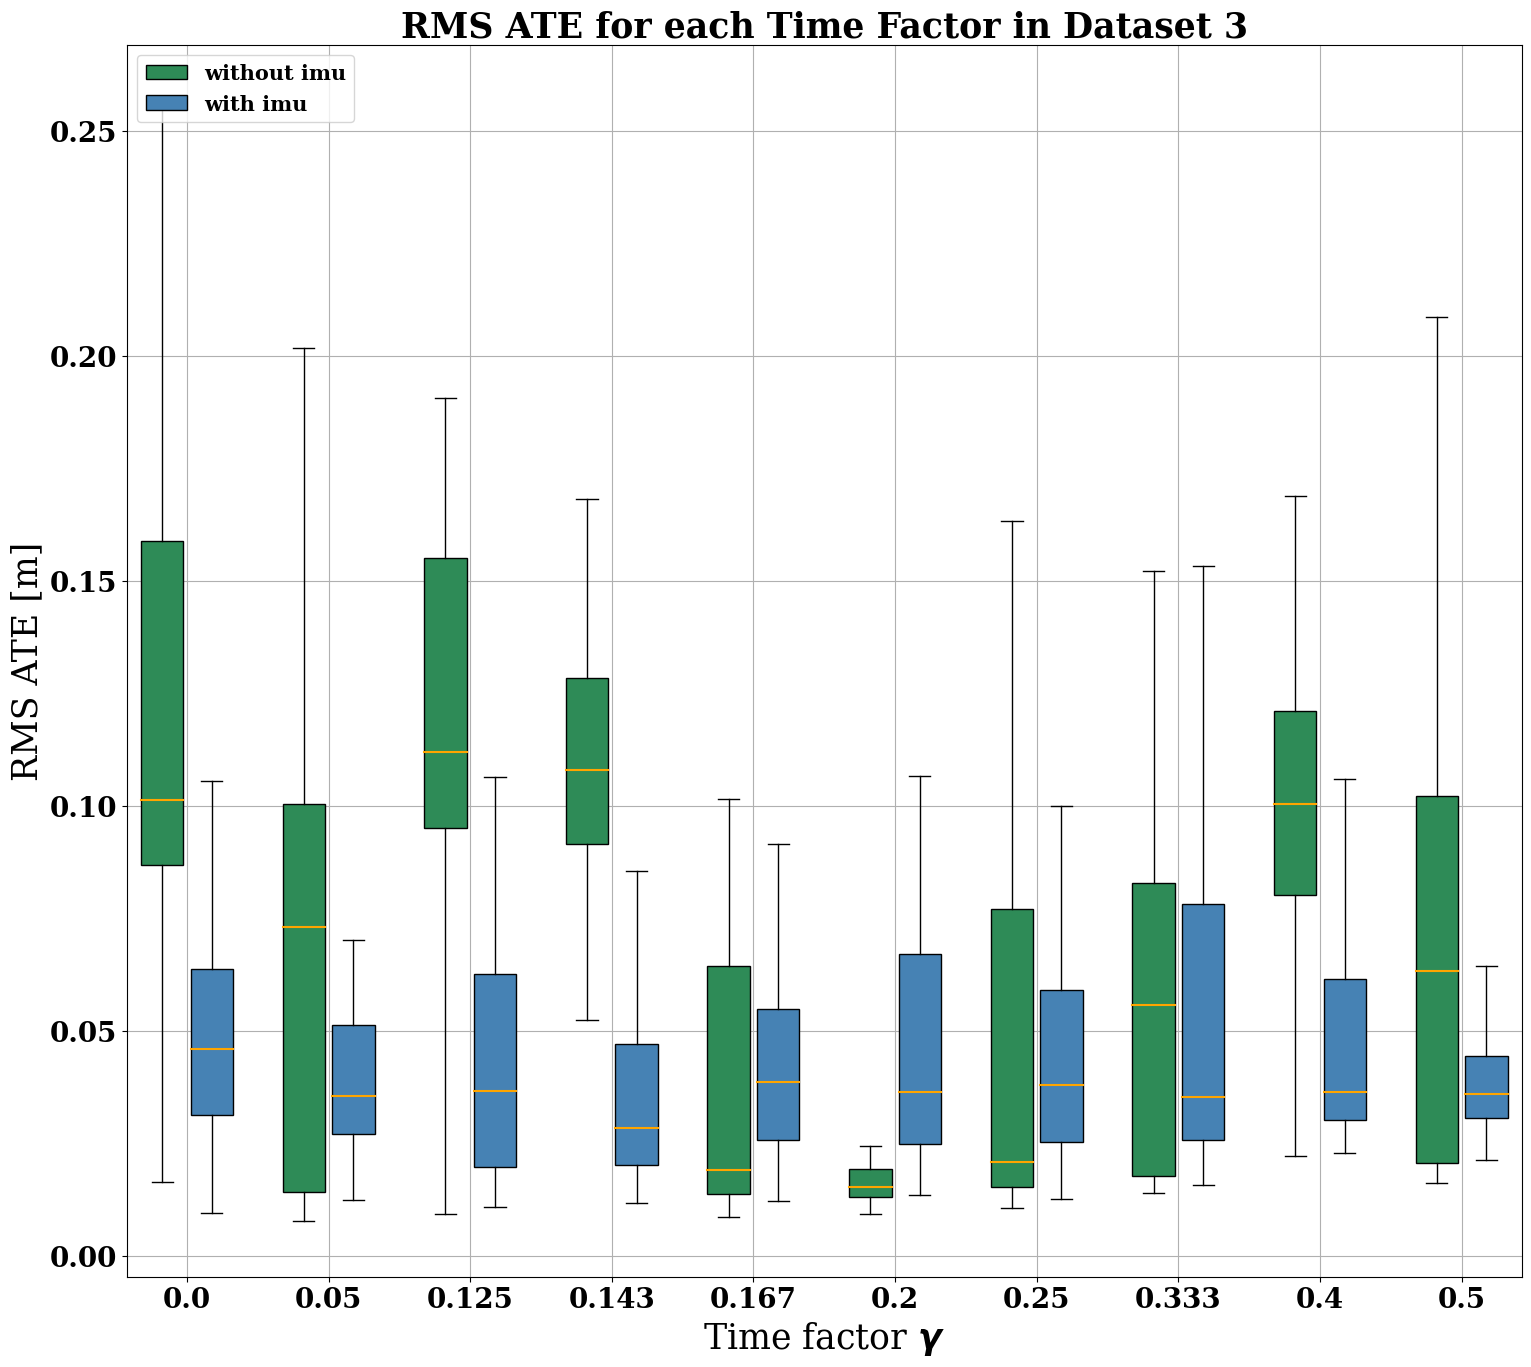

In [54]:
median_orb3, std_orb3, all_data_orb3 = compute_results(imu=imu, system='orb_slam', sub='/result_runs_with_clahe', datasets=DATASETS_3, outliers=True) 
d_wi, d_woi = [], []
for data in DATASETS_3: 
    d_wi.append(all_data_orb3[data+'withimu']) 
    d_woi.append(all_data_orb3[data+'withoutimu']) 

fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), medianprops = dict(color = "orange", linewidth = 1.5), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), medianprops = dict(color = "orange", linewidth = 1.5), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('RMS ATE for each Time Factor in Dataset 3', fontsize='25', fontweight='bold') 
plt.savefig('box_orb3_clahe.png', bbox_inches='tight') 
plt.show()

In [44]:
median_orb3, std_orb3, all_data_orb3 = compute_results(imu=imu, system='orb_slam', sub='/result_runs_with_clahe', datasets=DATASETS_3, outliers=True) 
j = [str(np.round(i,3)) for i in x]
for l, data in enumerate(DATASETS_3): 
    print(f'& {j[l]} & {np.round(np.median(all_data_orb3[data+"withoutimu"]),3)} ({np.round(np.std(all_data_orb3[data+"withoutimu"]),3)}) & {np.round(np.median(all_data_orb3[data+"withimu"]),3)} ({np.round(np.std(all_data_orb3[data+"withimu"]),3)}) \\\\\cline')

& 0.0 & 0.101 (0.327) & 0.046 (0.037) \\\cline
& 0.05 & 0.073 (0.153) & 0.036 (0.026) \\\cline
& 0.125 & 0.112 (0.161) & 0.037 (0.043) \\\cline
& 0.143 & 0.108 (0.175) & 0.028 (0.052) \\\cline
& 0.167 & 0.019 (0.296) & 0.039 (0.047) \\\cline
& 0.2 & 0.015 (0.036) & 0.037 (0.034) \\\cline
& 0.25 & 0.021 (0.138) & 0.038 (0.043) \\\cline
& 0.333 & 0.056 (0.172) & 0.035 (0.054) \\\cline
& 0.4 & 0.101 (0.132) & 0.036 (0.033) \\\cline
& 0.5 & 0.063 (0.192) & 0.036 (0.036) \\\cline


### Gaussian Blur 

In [67]:
DATASET_GBLUR_3 = ['dataset-room3_512_16_gblur_3', 'dataset-room3_512_16_gblur_9', 'dataset-room3_512_16_gblur_15']
median_gblur3, std_gblur3, all_gblur3 = compute_results(imu=['withoutimu', 'withimu'], system='orb_slam', sub='/result_runs_gblur', datasets=DATASET_GBLUR_3) 
#median_org1_mono, std_org1_mono, all_org1_mono = compute_results(imu=['withoutimu'], system='orb_slam', sub='/result_runs_rerun_monocular', datasets=DATASETS_1) 
median_org3, std_org3, all_org3 = compute_results(imu=['withoutimu','withimu'], system='orb_slam', sub='/result_runs', datasets=DATASETS_3)

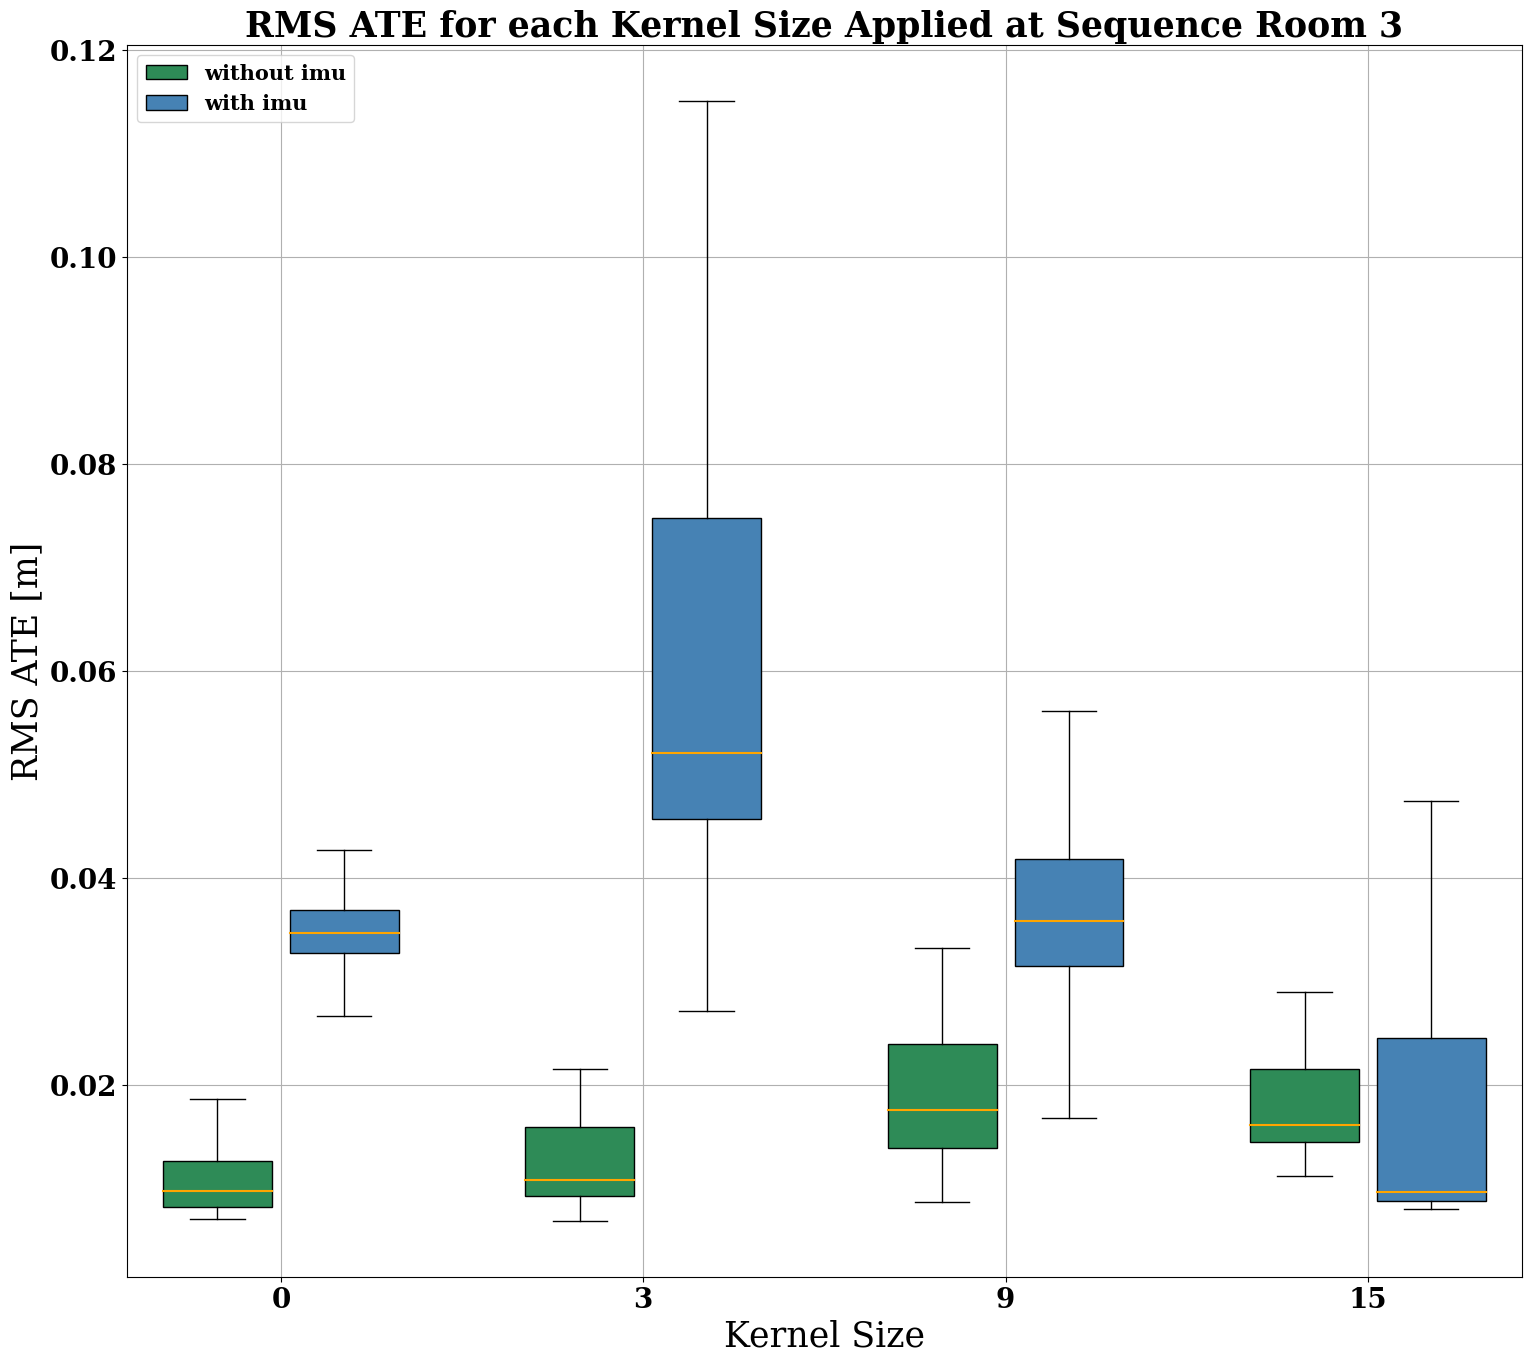

In [68]:
d_wi, d_woi = [], []
d_wi.append(all_org3['dataset-room3_512_16withimu']) 
d_woi.append(all_org3['dataset-room3_512_16withoutimu'])
             
for data in DATASET_GBLUR_3: 
    d_wi.append(all_gblur3[data+'withimu']) 
    d_woi.append(all_gblur3[data+'withoutimu']) 
             
fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), medianprops = dict(color = "orange", linewidth = 1.5), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), medianprops = dict(color = "orange", linewidth = 1.5), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in [0,3,9,15]]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel('Kernel Size', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('RMS ATE for each Kernel Size Applied at Sequence Room 3', fontsize='25', fontweight='bold') 
plt.savefig('gblur_orb3.png', bbox_inches='tight') 
plt.show()

#### Octaves

In [78]:
d = []

for data in DATASETS_3: 
    o = get_mean_octs('withoutimu', system='orb_slam', sub='/result_runs', sequence=data) 
    d.append((o/sum(o))*100)

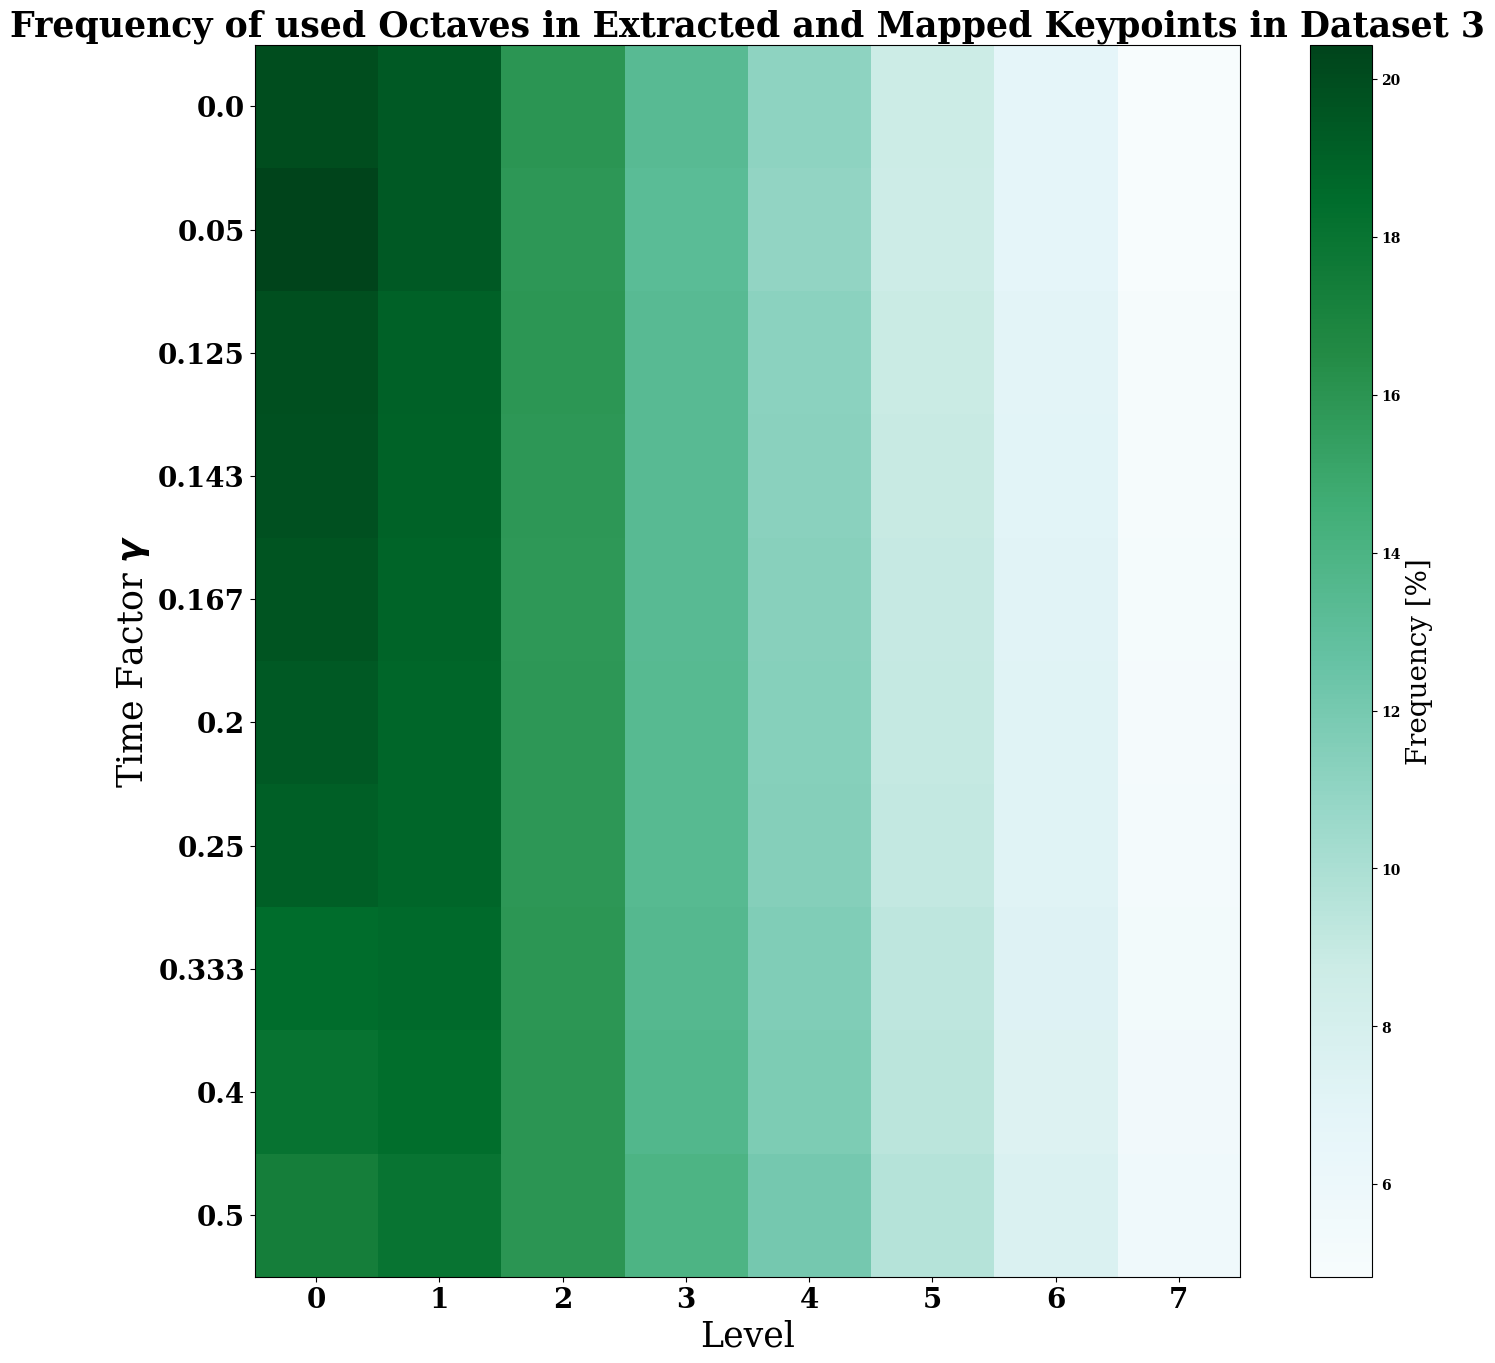

In [79]:
data = o.reshape(1, -1)
j = [str(np.round(i,3)) for i in x]
# Create the heatmap
plt.imshow(d, cmap='BuGn', interpolation='nearest') #Blues
colorbar = plt.colorbar()
colorbar.set_label('Frequency [%]', fontsize='20')
plt.yticks(np.arange(len(j)), j)
plt.xlabel('Level', fontsize='25')
plt.ylabel(r'Time Factor $\gamma$', fontsize='25')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Frequency of used Octaves in Extracted and Mapped Keypoints in Dataset 3', fontsize='25', fontweight='bold')
plt.savefig('heatmap_mono_3.png', bbox_inches='tight')
plt.show()

## Octaves analysis 

In [80]:
d1, d2, d3 = [], [], []

for data in DATASETS_1: 
    o = get_mean_octs('withimu', system='orb_slam', sub='/result_runs', sequence=data) 
    d1.append(sum(o))

for data in DATASETS_2: 
    o = get_mean_octs('withimu', system='orb_slam', sub='/result_runs', sequence=data) 
    d2.append(sum(o))

for data in DATASETS_3: 
    o = get_mean_octs('withimu', system='orb_slam', sub='/result_runs', sequence=data) 
    d3.append(sum(o))

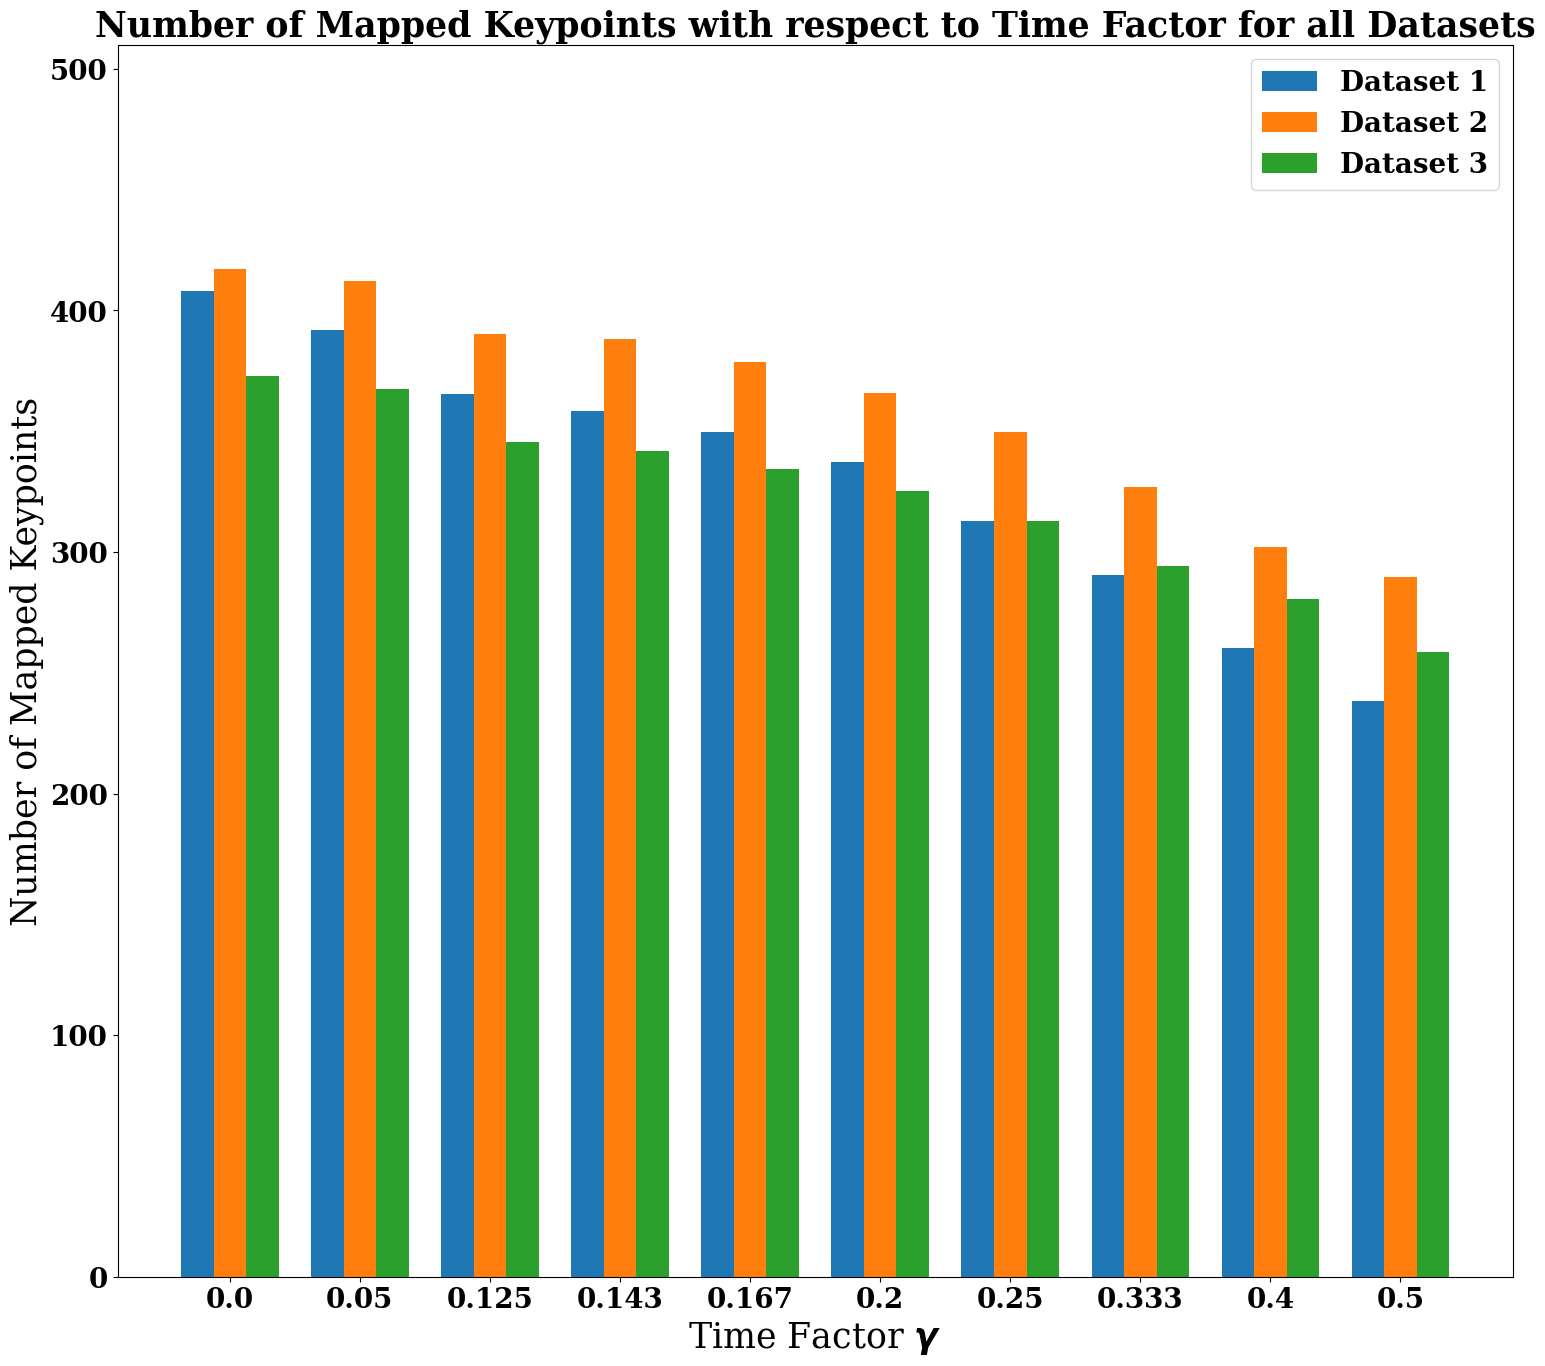

In [81]:
plt.bar(np.arange(len(x))-0.25, d1, width=0.25, label='Dataset 1') 
plt.bar(np.arange(len(x)), d2, width=0.25, label='Dataset 2')
plt.bar(np.arange(len(x))+0.25, d3, width=0.25, label='Dataset 3')
plt.xticks(np.arange(len(x)), j)

plt.xlabel(r'Time Factor $\gamma$', fontsize='25')
plt.ylabel('Number of Mapped Keypoints', fontsize='25')
plt.title('Number of Mapped Keypoints with respect to Time Factor for all Datasets', fontsize='25', fontweight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,510)
plt.legend(fontsize=20)
plt.savefig('number_ofkeypoints_monoinertial.png', bbox_inches='tight') 
plt.show()

## State analysis

In [110]:
median_1, std_1, all_1 = compute_results(imu=['withimu', 'withoutimu'], system='orb_slam', sub='/result_runs_extract', datasets=DATASETS_1) 
median_2, std_2, all_2 = compute_results(imu=['withimu', 'withoutimu'], system='orb_slam', sub='/result_runs_extract', datasets=DATASETS_2) 
median_3, std_3, all_3 = compute_results(imu=['withimu', 'withoutimu'], system='orb_slam', sub='/result_runs_extract', datasets=DATASETS_3) 

In [111]:
def fetch_states(seq:str, sub:str="", imu="withimu"):
    path = f'/home/cm2113/workspace/results/{seq}/orb_slam/data{sub}/{imu}'
    l = np.zeros(5) 
    for file in sorted(os.listdir(path), key=lambda x: int(x.split('_')[1])): 
        states_path = f'{path}/{file}/State.txt'
        count = {}
        data = np.loadtxt(states_path) 
        for d in data:
            if not d in count:
                count[d] = 1
            else:
                count[d]+=1 

        for k in sorted(list(count)): 
            l[int(k)] += count[k]
    total = l/len(os.listdir(path))
    return total 

In [112]:
for i in ['withimu','withoutimu']: 
    print(f'----------{i}-----------')
    for idx,data in enumerate(DATASETS_3):
        state = fetch_states(data, sub='/result_runs_extract', imu=i) 
        print(f'{data}:', end="") 
        for s in state:
            print(" & " +"{:.1f}".format(s), end=" ")
        print(f' & {np.round(np.median(all_3[data+i]),3)} ({np.round(np.std(all_3[data+i]),3)})')


----------withimu-----------
dataset-room3_512_16: & 0.0  & 72.0  & 2749.0  & 0.0  & 0.0  & 0.036 (0.003)
dataset-room3_512_16_20: & 0.0  & 73.0  & 2748.0  & 0.0  & 0.0  & 0.028 (0.004)
dataset-room3_512_16_8: & 0.0  & 73.0  & 2748.0  & 0.0  & 0.0  & 0.018 (0.004)
dataset-room3_512_16_7: & 0.0  & 73.0  & 2748.0  & 0.0  & 0.0  & 0.021 (0.004)
dataset-room3_512_16_6: & 0.0  & 73.0  & 2748.0  & 0.0  & 0.0  & 0.022 (0.004)
dataset-room3_512_16_5: & 0.0  & 73.0  & 2747.9  & 0.1  & 0.0  & 0.022 (0.006)
dataset-room3_512_16_4: & 0.0  & 73.1  & 2747.8  & 0.1  & 0.0  & 0.023 (0.002)
dataset-room3_512_16_3: & 0.0  & 76.0  & 2745.0  & 0.0  & 0.0  & 0.029 (0.006)
dataset-room3_512_16_2-5: & 0.0  & 73.0  & 2747.9  & 0.1  & 0.0  & 0.024 (0.004)
dataset-room3_512_16_2: & 0.0  & 74.0  & 2747.0  & 0.0  & 0.0  & 0.036 (0.023)
----------withoutimu-----------
dataset-room3_512_16: & 0.0  & 29.0  & 2792.0  & 0.0  & 0.0  & 0.01 (0.002)
dataset-room3_512_16_20: & 0.0  & 38.0  & 2783.0  & 0.0  & 0.0  & 0.012 

## MotionModel Analysis 

In [143]:
def fetch_motionmodel(seq:str, sub:str="", imu="withoutimu"):
    path = f'/home/cm2113/workspace/results/{seq}/orb_slam/data{sub}/{imu}'
    count = {-1:0,0:0,1:0} # -1: refrence keyframe, 1 :Motion model, 0: imu or first frames -> reference keyframe 
    for file in sorted(os.listdir(path), key=lambda x: int(x.split('_')[1])): 
        states_path = f'{path}/{file}/MotionModel.txt'
        data = np.loadtxt(states_path) 
        count[-1] += np.sum(data == -1)
        count[0] += np.sum(data == 0)
        count[1] += np.sum(data == 1)
        
    return count

In [145]:
for data in DATASETS_3: 
    print(fetch_motionmodel(data, sub='/result_runs_extract',imu='withimu')) 

{-1: 0, 0: 10, 1: 27470}
{-1: 0, 0: 10, 1: 27460}
{-1: 0, 0: 10, 1: 27460}
{-1: 0, 0: 10, 1: 27460}
{-1: 0, 0: 10, 1: 27460}
{-1: 0, 0: 10, 1: 27459}
{-1: 0, 0: 11, 1: 27457}
{-1: 0, 0: 10, 1: 27430}
{-1: 0, 0: 10, 1: 27459}
{-1: 0, 0: 10, 1: 27450}


# DM-VIO 

## Dataset 1 

In [2]:
imu = ['withimu', 'withoutimu']
system = 'dm_vio'

res_t_dmv_1, std_t_dmv_1, tot_t_dmv_1 = compute_results(imu=imu, system=system, sub='/result_runs_unmod', datasets=['dataset-room1_512_16'], outliers=False) 

# Compare to article: 
print('------ Original Dataset 1 ---------')
print(f"Monocular: {np.round(np.median(tot_t_dmv_1['dataset-room1_512_16withoutimu']),3)} +- {np.round(np.std(tot_t_dmv_1['dataset-room1_512_16withoutimu']),3)}  (----)")
print(f"Monocular-Inertial: {np.round(np.median(tot_t_dmv_1['dataset-room1_512_16withimu']),3)} +- {np.round(np.std(tot_t_dmv_1['dataset-room1_512_16withimu']),3)} (0.03)")
print('-----------------------------------')

#plt.figure(figsize=(8,10))
#pctiles_wi = np.percentile(tot_t_dmv_1['dataset-room1_512_16withimu'], np.arange(0, 101))
#pctiles_woi = np.percentile(tot_t_dmv_1['dataset-room1_512_16withoutimu'], np.arange(0, 101))
#plt.plot(pctiles_wi, label='with imu', color='steelblue') 
#plt.plot(pctiles_woi, label='without imu', color='seagreen') 
#plt.xlabel('Percentile')
#plt.ylabel('Translational RMSE') 
#plt.title('Percentail graph for TUM VI room1 - 50 runs') 
#plt.ylim(0,0.3)
#plt.legend()
#plt.show()


0 outliers removed from dataset-room1_512_16withimu
0 outliers removed from dataset-room1_512_16withoutimu
------ Original Dataset 1 ---------
Monocular: 0.048 +- 0.003  (----)
Monocular-Inertial: 0.035 +- 0.022 (0.03)
-----------------------------------


In [3]:
res_t_dmv_1x, std_t_dmv_1x, tot_t_dmv_1x = compute_results(imu=['withimu','withoutimu'], system='dm_vio', sub='/result_runs_pc_nexp', datasets=['dataset-room1_512_16'], outliers=False) 
print('------ Original Dataset 1 - photometric calibration no exposure times ---------')
print(f"Monocular: {np.round(np.median(tot_t_dmv_1x['dataset-room1_512_16withoutimu']),3)} ({np.round(np.std(tot_t_dmv_1x['dataset-room1_512_16withoutimu']),3)})  (----)")
print(f"Monocular-Inertial: {np.round(np.median(tot_t_dmv_1x['dataset-room1_512_16withimu']),3)} ({np.round(np.std(tot_t_dmv_1x['dataset-room1_512_16withimu']),3)}) (0.03)")
print('-------------------------------------------------------------------------------')

2 outliers removed from dataset-room1_512_16withimu
1 outliers removed from dataset-room1_512_16withoutimu
------ Original Dataset 1 - photometric calibration no exposure times ---------
Monocular: 0.068 (0.009)  (----)
Monocular-Inertial: 0.053 (0.004) (0.03)
-------------------------------------------------------------------------------


### Result runs 

In [27]:
res_t_dmv_1x, std_t_dmv_1x, tot_t_dmv_1x = compute_results(imu=imu, system='dm_vio', sub='/result_runsX', datasets=DATASETS_1,outliers=False) 
print('------ Original Dataset 1 - no photometric calibration ---------')
print(f"Monocular: {np.round(np.median(tot_t_dmv_1x['dataset-room1_512_16withoutimu']),3)} ({np.round(np.std(tot_t_dmv_1x['dataset-room1_512_16withoutimu']),3)})  (----)")
print(f"Monocular-Inertial: {np.round(np.median(tot_t_dmv_1x['dataset-room1_512_16withimu']),3)} ({np.round(np.std(tot_t_dmv_1x['dataset-room1_512_16withimu']),3)}) (0.03)")
print('----------------------------------------------------------------')
for i in ['withimu', 'withoutimu']: 
    print(f'--------------{i}--------------') 
    for data in DATASETS_1: 
        print(f'{data}: {np.round(np.median(tot_t_dmv_1x[data+i]),3)} ({np.round(np.std(tot_t_dmv_1x[data+i]),3)})')

0 outliers removed from dataset-room1_512_16withimu
0 outliers removed from dataset-room1_512_16_20withimu
1 outliers removed from dataset-room1_512_16_8withimu
1 outliers removed from dataset-room1_512_16_7withimu
1 outliers removed from dataset-room1_512_16_6withimu
0 outliers removed from dataset-room1_512_16_5withimu
0 outliers removed from dataset-room1_512_16_4withimu
1 outliers removed from dataset-room1_512_16_3withimu
0 outliers removed from dataset-room1_512_16_2-5withimu
0 outliers removed from dataset-room1_512_16_2withimu
0 outliers removed from dataset-room1_512_16withoutimu
0 outliers removed from dataset-room1_512_16_20withoutimu
0 outliers removed from dataset-room1_512_16_8withoutimu
2 outliers removed from dataset-room1_512_16_7withoutimu
1 outliers removed from dataset-room1_512_16_6withoutimu
1 outliers removed from dataset-room1_512_16_5withoutimu
1 outliers removed from dataset-room1_512_16_4withoutimu
3 outliers removed from dataset-room1_512_16_3withoutimu
1 ou

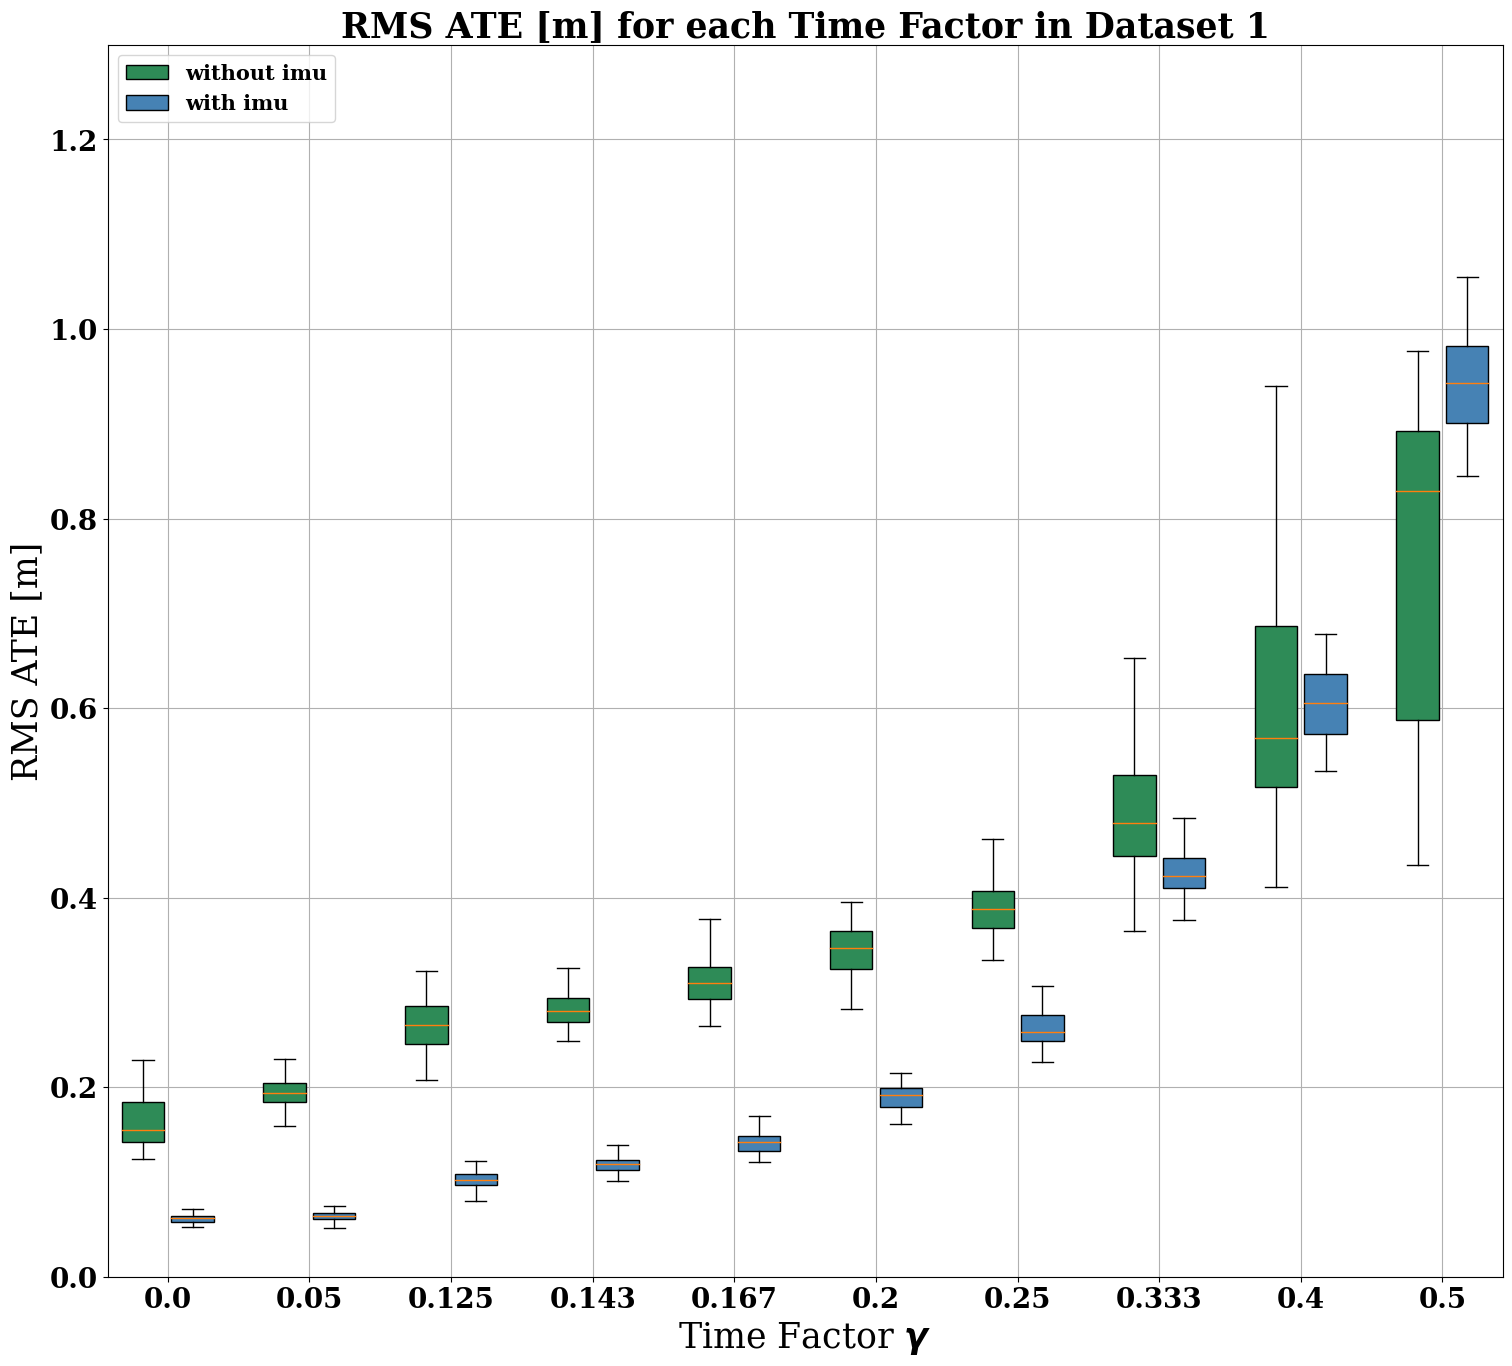

In [6]:
res_t_dmv_1x, std_t_dmv_1x, tot_t_dmv_1x = compute_results(imu=imu, system='dm_vio', sub='/result_runsX', datasets=DATASETS_1,outliers=True) 
d_wi, d_woi = [], []
for data in DATASETS_1: 
    d_wi.append(tot_t_dmv_1x[data+'withimu']) 
    d_woi.append(tot_t_dmv_1x[data+'withoutimu']) 

fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.0, 1.3)
plt.grid()

plt.title('RMS ATE [m] for each Time Factor in Dataset 1', fontsize='25', fontweight='bold') 
plt.savefig('box_dmvio1X.png', bbox_inches='tight') 
plt.show()

#### With Photometric Callibration

In [62]:
res_t_dmv_1x, std_t_dmv_1x, tot_t_dmv_1x = compute_results(imu=['withoutimu','withimu'], system='dm_vio', sub='/result_runs_pc_nexp', datasets=DATASETS_1, outliers=False) 
print('------ Original Dataset 1 - photometric calibration no exposure times ---------')
print(f"Monocular: {np.round(np.median(tot_t_dmv_1x['dataset-room1_512_16withoutimu']),3)} ({np.round(np.std(tot_t_dmv_1x['dataset-room1_512_16withoutimu']),3)})  (----)")
print(f"Monocular-Inertial: {np.round(np.median(tot_t_dmv_1x['dataset-room1_512_16withimu']),3)} ({np.round(np.std(tot_t_dmv_1x['dataset-room1_512_16withimu']),3)}) (0.03)")
print('-------------------------------------------------------------------------------')

1 outliers removed from dataset-room1_512_16withoutimu
2 outliers removed from dataset-room1_512_16_20withoutimu
1 outliers removed from dataset-room1_512_16_8withoutimu
3 outliers removed from dataset-room1_512_16_7withoutimu
0 outliers removed from dataset-room1_512_16_6withoutimu
1 outliers removed from dataset-room1_512_16_5withoutimu
2 outliers removed from dataset-room1_512_16_4withoutimu
12 outliers removed from dataset-room1_512_16_3withoutimu
9 outliers removed from dataset-room1_512_16_2-5withoutimu
0 outliers removed from dataset-room1_512_16_2withoutimu
2 outliers removed from dataset-room1_512_16withimu
1 outliers removed from dataset-room1_512_16_20withimu
1 outliers removed from dataset-room1_512_16_8withimu
1 outliers removed from dataset-room1_512_16_7withimu
1 outliers removed from dataset-room1_512_16_6withimu
3 outliers removed from dataset-room1_512_16_5withimu
2 outliers removed from dataset-room1_512_16_4withimu
0 outliers removed from dataset-room1_512_16_3withi

In [64]:
for i in ['withimu', 'withoutimu']: 
    print(f'--------------{i}--------------') 
    for data in DATASETS_1: 
        print(f'{data}: {np.round(np.median(tot_t_dmv_1x[data+i]),3)} ({np.round(np.std(tot_t_dmv_1x[data+i]),3)})')

--------------withimu--------------
dataset-room1_512_16: 0.053 (0.004)
dataset-room1_512_16_20: 0.057 (0.005)
dataset-room1_512_16_8: 0.116 (0.008)
dataset-room1_512_16_7: 0.131 (0.008)
dataset-room1_512_16_6: 0.158 (0.01)
dataset-room1_512_16_5: 0.206 (0.011)
dataset-room1_512_16_4: 0.282 (0.015)
dataset-room1_512_16_3: 0.454 (0.021)
dataset-room1_512_16_2-5: 0.624 (0.03)
dataset-room1_512_16_2: 0.96 (0.045)
--------------withoutimu--------------
dataset-room1_512_16: 0.068 (0.009)
dataset-room1_512_16_20: 0.089 (0.013)
dataset-room1_512_16_8: 0.133 (0.024)
dataset-room1_512_16_7: 0.153 (0.022)
dataset-room1_512_16_6: 0.171 (0.016)
dataset-room1_512_16_5: 0.198 (0.02)
dataset-room1_512_16_4: 0.239 (0.028)
dataset-room1_512_16_3: 0.323 (0.032)
dataset-room1_512_16_2-5: 0.373 (0.043)
dataset-room1_512_16_2: 0.857 (0.21)


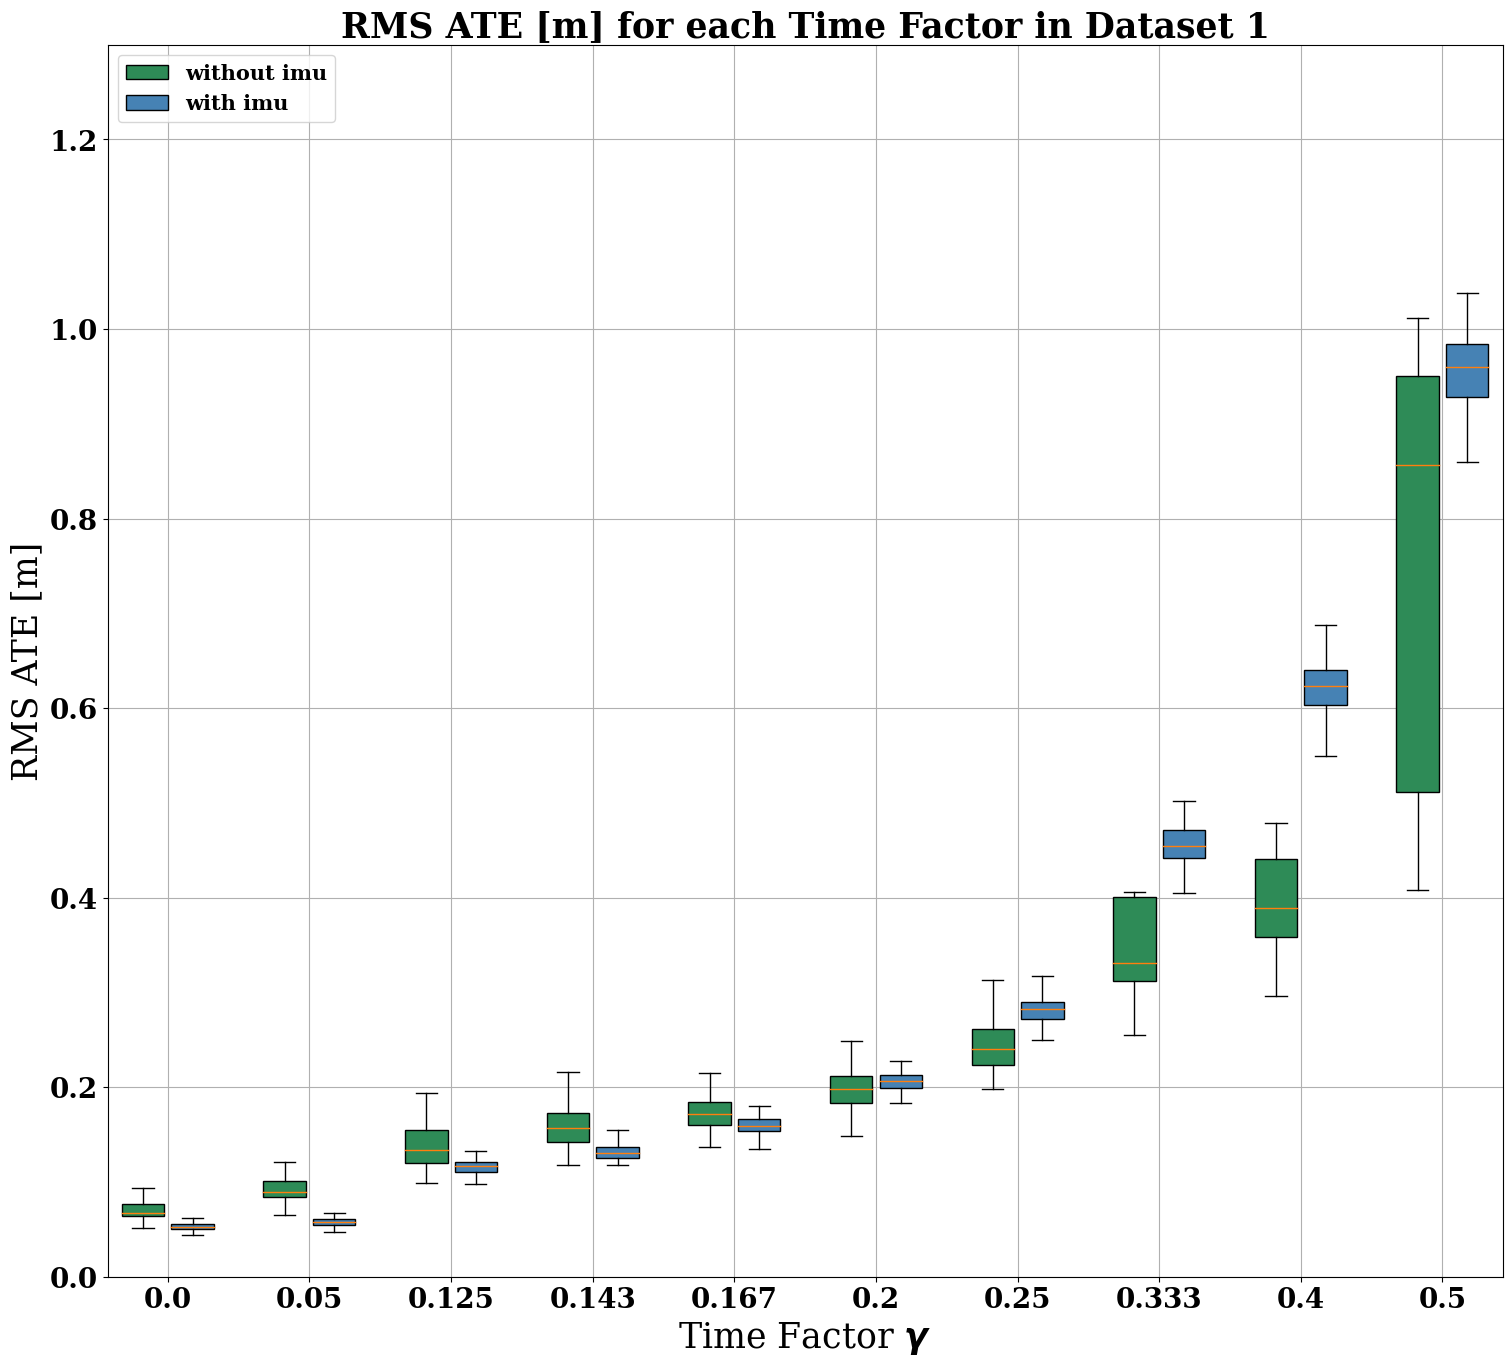

In [7]:
res_t_dmv_1x, std_t_dmv_1x, tot_t_dmv_1x = compute_results(imu=['withoutimu','withimu'], system='dm_vio', sub='/result_runs_pc_nexp', datasets=DATASETS_1, outliers=True)
d_wi, d_woi = [], []
for data in DATASETS_1: 
    d_wi.append(tot_t_dmv_1x[data+'withimu']) 
    d_woi.append(tot_t_dmv_1x[data+'withoutimu']) 

fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.0, 1.3)

plt.grid()
plt.title('RMS ATE [m] for each Time Factor in Dataset 1', fontsize='25', fontweight='bold') 
plt.savefig('box_dmvio1_wpc.png', bbox_inches='tight') 
plt.show()

### Gaussian Blur 

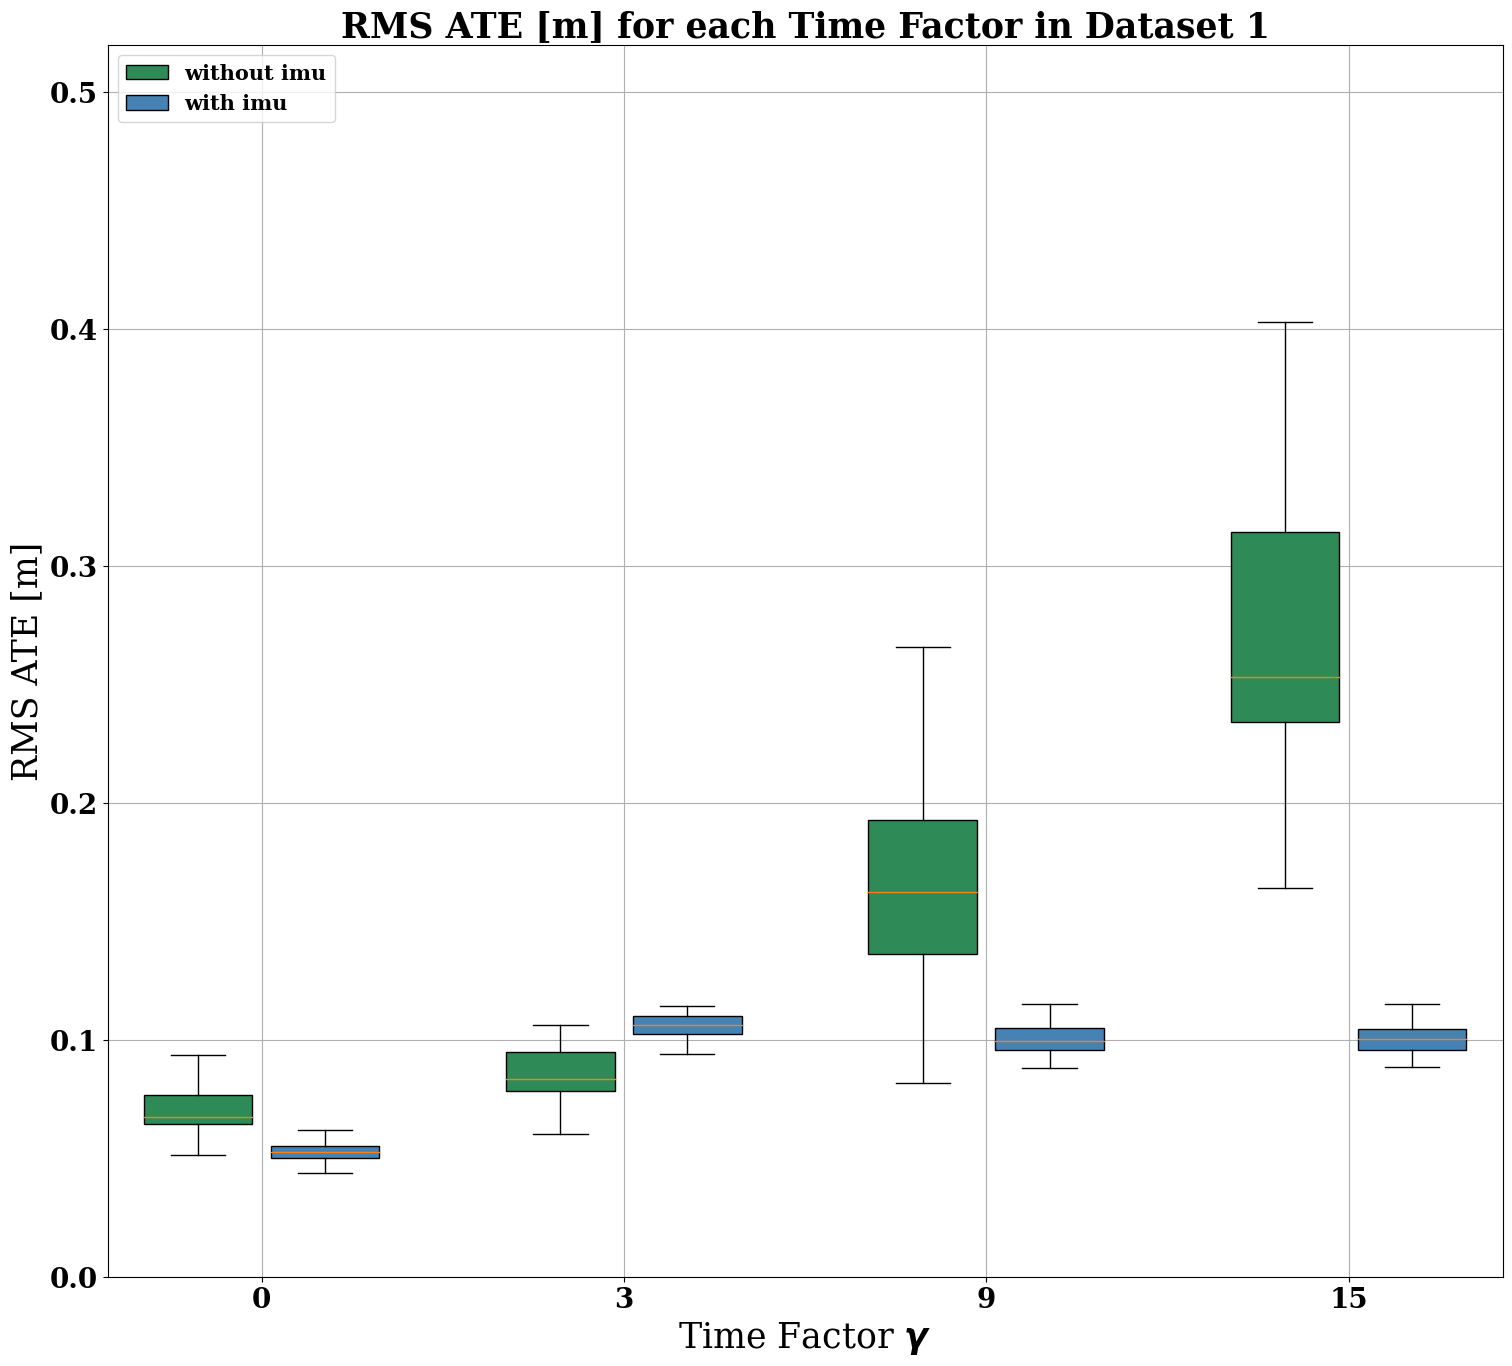

In [12]:
DATASET_GBLUR_1 = ['dataset-room1_512_16_gblur_3', 'dataset-room1_512_16_gblur_9', 'dataset-room1_512_16_gblur_15']
res_t_dmv_1x, std_t_dmv_1x, tot_t_dmv_1x = compute_results(imu=['withoutimu','withimu'], system='dm_vio', sub='/result_runs_pc_nexp', datasets=DATASETS_1, outliers=True)
res_t_dmv_1x_g, std_t_dmv_1x_g, tot_t_dmv_1x_g = compute_results(imu=['withoutimu','withimu'], system='dm_vio', sub='/result_runs_gblur_corr', datasets=DATASET_GBLUR_1, outliers=True)
d_wi, d_woi = [], []
d_wi.append(tot_t_dmv_1x['dataset-room1_512_16withimu']) 
d_woi.append(tot_t_dmv_1x['dataset-room1_512_16withoutimu']) 
for data in DATASET_GBLUR_1: 
    d_wi.append(tot_t_dmv_1x_g[data+'withimu']) 
    d_woi.append(tot_t_dmv_1x_g[data+'withoutimu']) 

fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in [0,3,9,15]]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.0, 0.52)
plt.grid()
plt.title('RMS ATE [m] for each Time Factor in Dataset 1', fontsize='25', fontweight='bold') 
plt.savefig('box_dmvio1_gblur.png', bbox_inches='tight') 
plt.show()

# Photometric Error

In [22]:
import pandas as pd
tot1, tot2, tot3 = [], [], []
median1, median2, median3 = [], [], [] 
sub = 'result_runs_pc_nexp' #'result_runsX'result_runs_pc_nexp
ii = 'withimu'
for data in DATASETS_1: 
    l = []
    for r in sorted(os.listdir(f"/home/cm2113/workspace/results/{data}/dm_vio/data/{sub}/{ii}/")):
        d = np.loadtxt(f"/home/cm2113/workspace/results/{data}/dm_vio/data/{sub}/{ii}/{r}/photometric_error.txt")[1:]
        l.append(len(d[d>8.0]))
    tot1.append(np.mean(l))

for data in DATASETS_2: 
    l = []
    for r in sorted(os.listdir(f"/home/cm2113/workspace/results/{data}/dm_vio/data/{sub}/{ii}/")):
        d = np.loadtxt(f"/home/cm2113/workspace/results/{data}/dm_vio/data/{sub}/{ii}/{r}/photometric_error.txt")[1:]
        l.append(len(d[d>8.0]))
    tot2.append(np.mean(l))

for data in DATASETS_3: 
    l = []
    for r in sorted(os.listdir(f"/home/cm2113/workspace/results/{data}/dm_vio/data/{sub}/{ii}/")):
        d = np.loadtxt(f"/home/cm2113/workspace/results/{data}/dm_vio/data/{sub}/{ii}/{r}/photometric_error.txt")[1:]
        l.append(len(d[d>8.0]))
    tot3.append(np.mean(l))

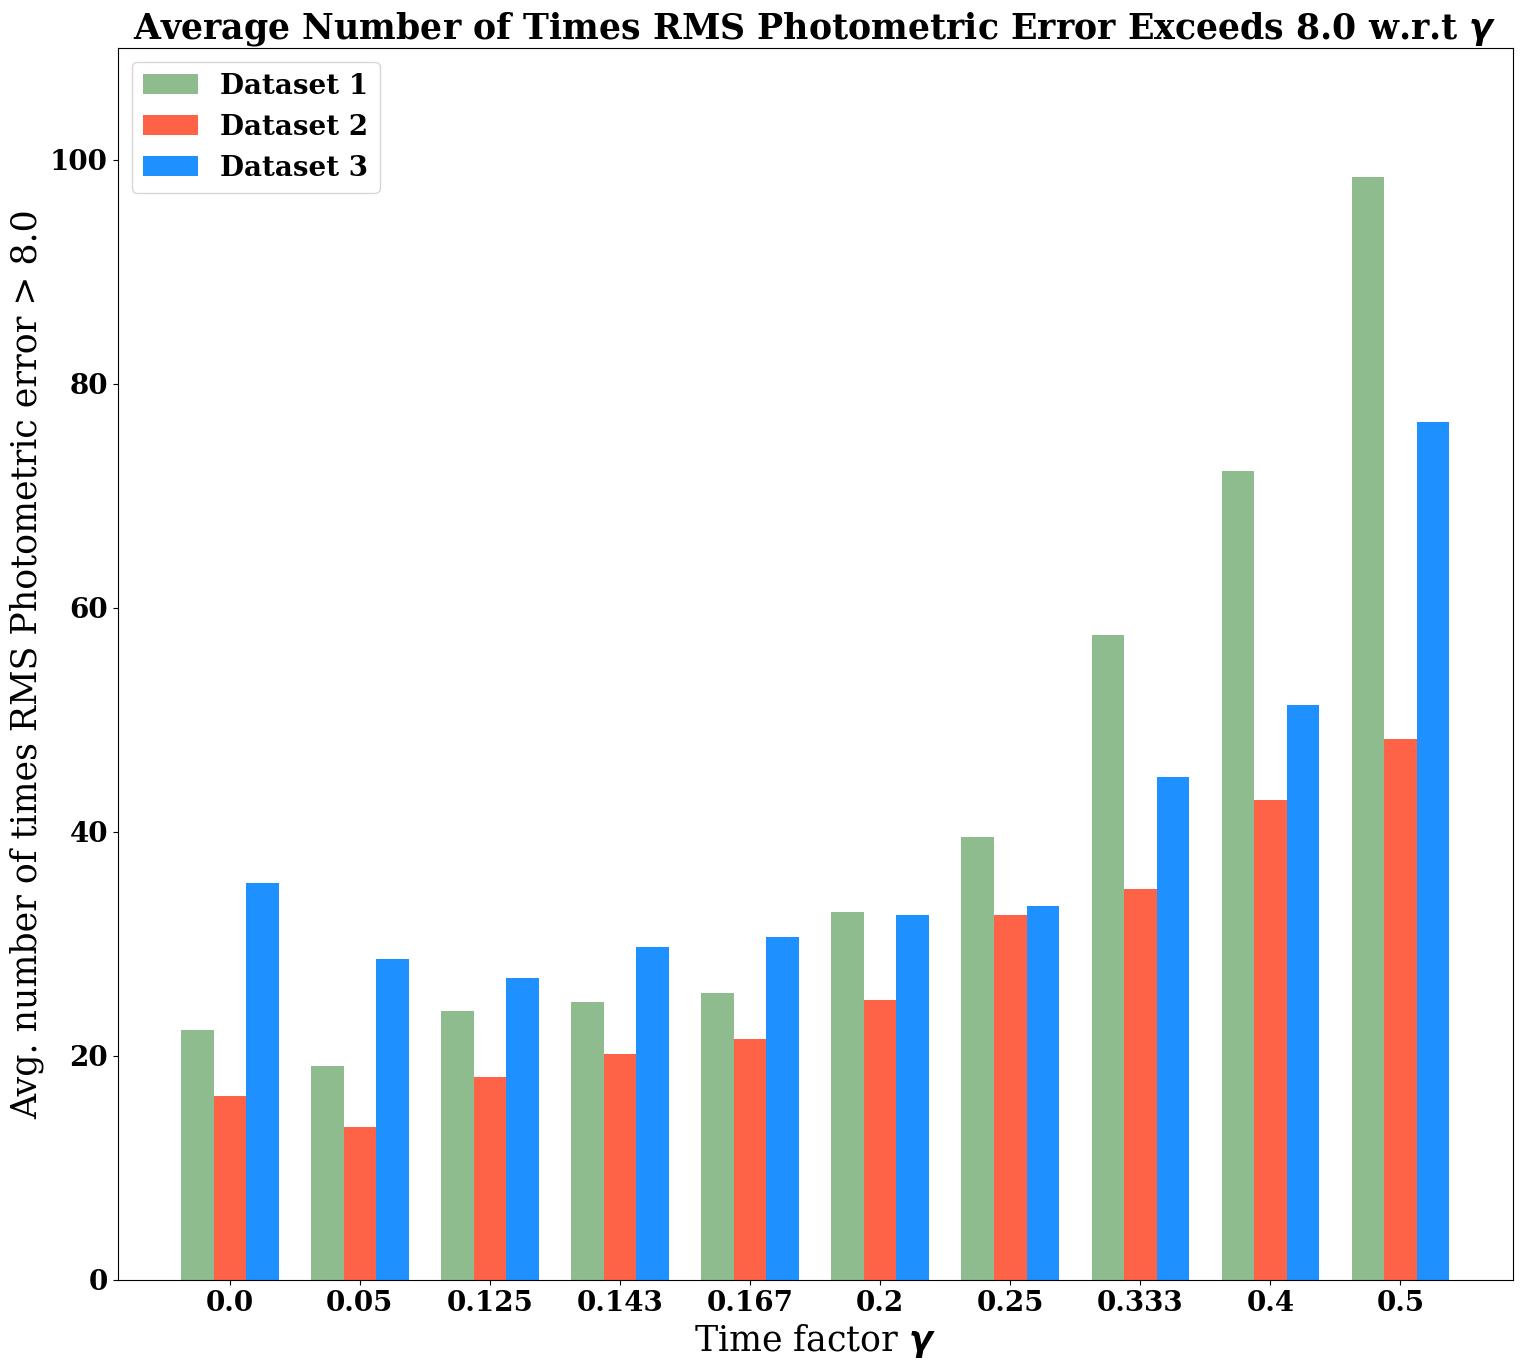

In [23]:
j = [str(np.round(i,3)) for i in x]
plt.bar(np.arange(len(x))-0.25, tot1, width=0.25, label='Dataset 1', color='darkseagreen')
plt.bar(np.arange(len(x)), tot2, width=0.25, label='Dataset 2', color='tomato')
plt.bar(np.arange(len(x))+0.25, tot3, width=0.25, label='Dataset 3', color='dodgerblue')
plt.xticks(np.arange(len(x)), j)
plt.legend()

plt.xlabel(r'Time factor $\gamma$', fontsize='25')
plt.ylabel('Avg. number of times RMS Photometric error > 8.0', fontsize='25')
plt.title(r'Average Number of Times RMS Photometric Error Exceeds 8.0 w.r.t $\gamma$', fontsize='25', fontweight='bold')
plt.xticks(fontsize=20)
plt.ylim(0.0, 110) 
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.savefig('photometric_wpc.png', bbox_inches='tight') 

## Dataset 2

In [11]:
median_dmv2, std_dmv2, tot_dmv2 = compute_results(imu=['withoutimu','withimu'], system=system, datasets=['dataset-room2_512_16'], sub="/result_runs_unmod", outliers=False)
#res_t_dmv_2p, std_t_dmv_2p, tot_t_dmv_2p = compute_results(imu=['withimu'], system=system, datasets=['dataset-room2_512_16'], sub="/50iterationsoldgt")
# Compare to article: 
print('------ Original Dataset 1 ---------')
print(f"Monocular: {np.round(np.median(tot_dmv2['dataset-room2_512_16withoutimu']),3)} ({np.round(np.std(tot_dmv2['dataset-room2_512_16withoutimu']),3)}) (----)")
print(f"Monocular-Inertial: {np.round(np.median(tot_dmv2['dataset-room2_512_16withimu']),3)} ({np.round(np.std(tot_dmv2['dataset-room2_512_16withimu']),3)}) (0.13)")
print('-----------------------------------')

1 outliers removed from dataset-room2_512_16withoutimu
0 outliers removed from dataset-room2_512_16withimu
------ Original Dataset 1 ---------
Monocular: 0.168 (0.005) (----)
Monocular-Inertial: 0.136 (0.004) (0.13)
-----------------------------------


### Result runs 

In [28]:
res_t_dmv_2, std_t_dmv_2, tot_t_dmv_2 = compute_results(imu=imu, system='dm_vio', datasets=DATASETS_2, sub="/result_runsX", outliers=False)
#res_t_dmv_2p, std_t_dmv_2p, tot_t_dmv_2p = compute_results(imu=['withimu'], system=system, datasets=['dataset-room2_512_16'], sub="/50iterationsoldgt")
# Compare to article: 
print('------ Original Dataset 1 ---------')
print(f"Monocular: {np.round(np.median(tot_t_dmv_2['dataset-room2_512_16withoutimu']),3)} ({np.round(np.std(tot_t_dmv_2['dataset-room2_512_16withoutimu']),3)}) (----)")
print(f"Monocular-Inertial: {np.round(np.median(tot_t_dmv_2['dataset-room2_512_16withimu']),3)} ({np.round(np.std(tot_t_dmv_2['dataset-room2_512_16withimu']),3)}) (0.13)")
print('-----------------------------------')
for i in ['withimu', 'withoutimu']: 
    print(f'--------------{i}--------------') 
    for data in DATASETS_2: 
        print(f'{data}: {np.round(np.median(tot_t_dmv_2[data+i]),3)} ({np.round(np.std(tot_t_dmv_2[data+i]),3)})')

2 outliers removed from dataset-room2_512_16withimu
0 outliers removed from dataset-room2_512_16_20withimu
1 outliers removed from dataset-room2_512_16_8withimu
0 outliers removed from dataset-room2_512_16_7withimu
0 outliers removed from dataset-room2_512_16_6withimu
0 outliers removed from dataset-room2_512_16_5withimu
2 outliers removed from dataset-room2_512_16_4withimu
1 outliers removed from dataset-room2_512_16_3withimu
3 outliers removed from dataset-room2_512_16_2-5withimu
4 outliers removed from dataset-room2_512_16_2withimu
2 outliers removed from dataset-room2_512_16withoutimu
1 outliers removed from dataset-room2_512_16_20withoutimu
0 outliers removed from dataset-room2_512_16_8withoutimu
1 outliers removed from dataset-room2_512_16_7withoutimu
0 outliers removed from dataset-room2_512_16_6withoutimu
2 outliers removed from dataset-room2_512_16_5withoutimu
2 outliers removed from dataset-room2_512_16_4withoutimu
11 outliers removed from dataset-room2_512_16_3withoutimu
0 o

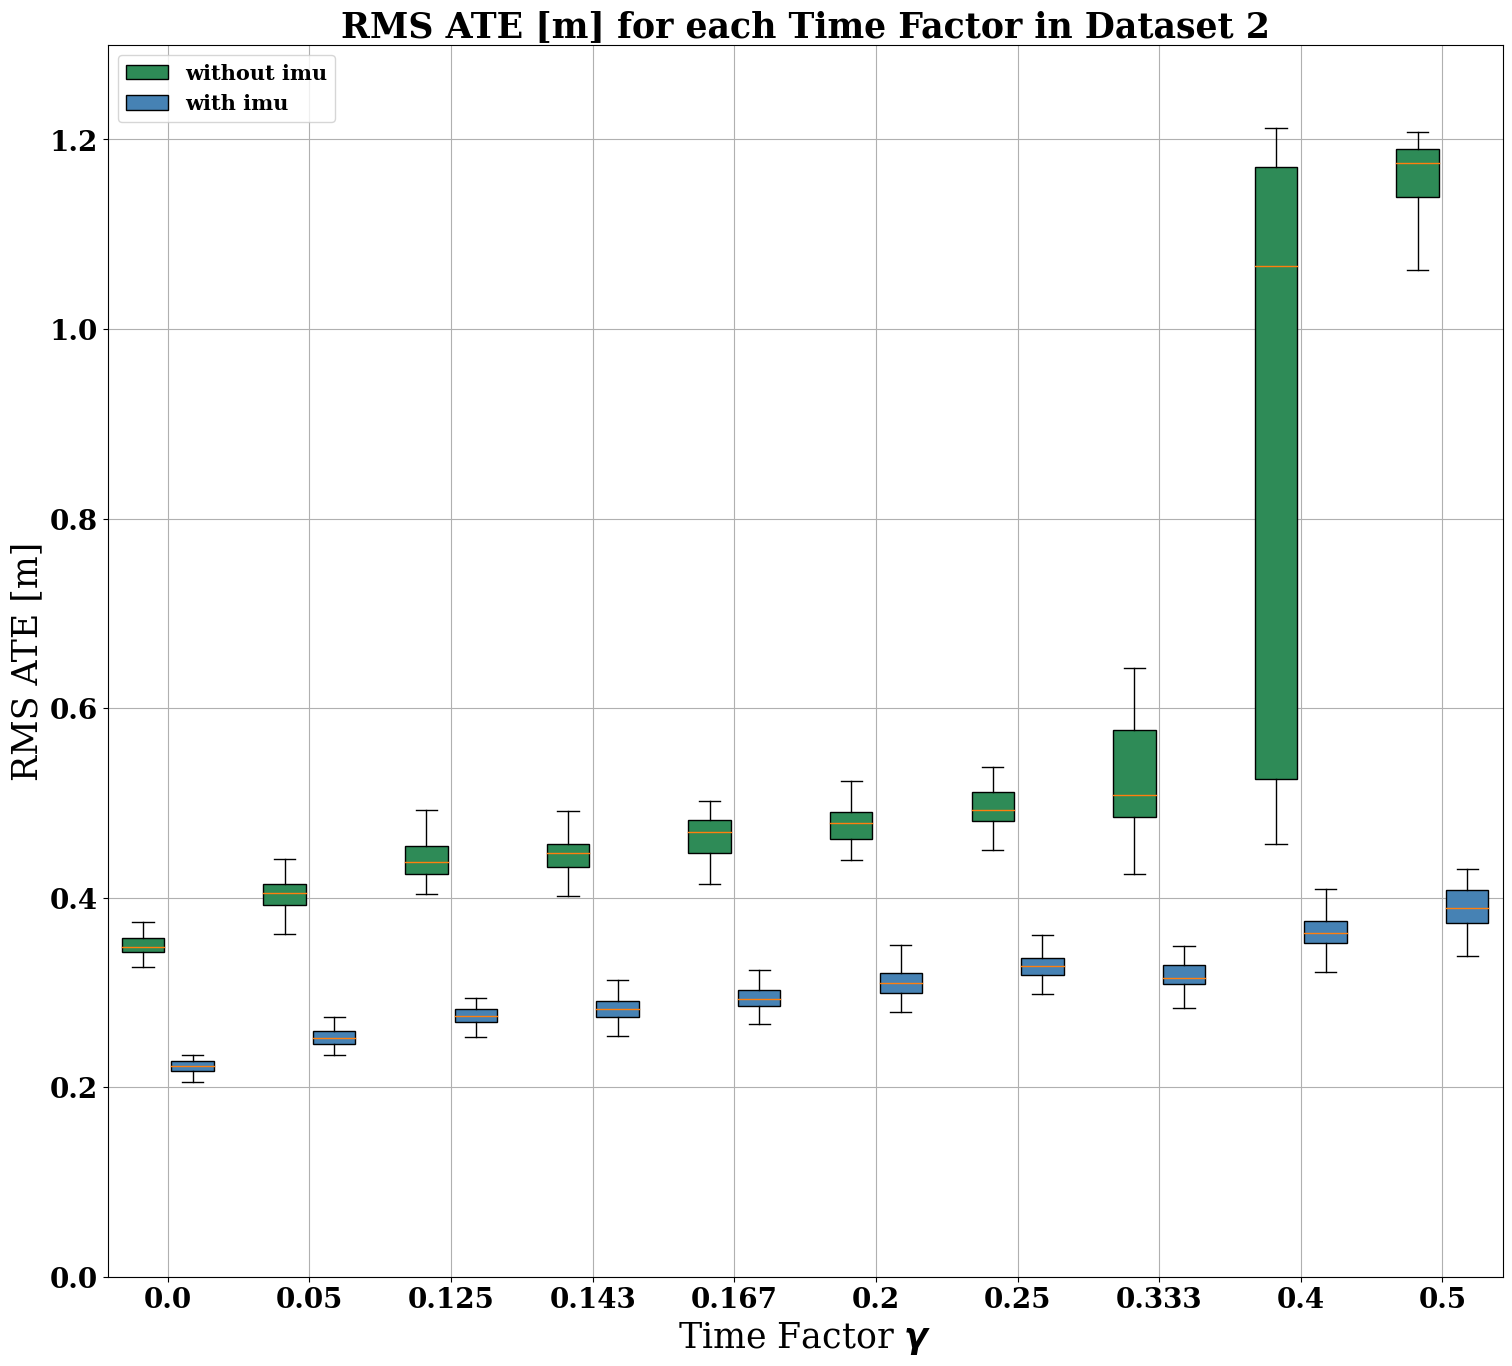

In [8]:
res_t_dmv_2, std_t_dmv_2, tot_t_dmv_2 = compute_results(imu=imu, system='dm_vio', datasets=DATASETS_2, sub="/result_runsX", outliers=True)
d_wi, d_woi = [], []
for data in DATASETS_2: 
    d_wi.append(tot_t_dmv_2[data+'withimu']) 
    d_woi.append(tot_t_dmv_2[data+'withoutimu']) 

fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.ylim(0.0, 1.3)
plt.title('RMS ATE [m] for each Time Factor in Dataset 2', fontsize='25', fontweight='bold') 
plt.savefig('box_dmvio2X.png', bbox_inches='tight') 
plt.show()


#### With Photometric Callibration 

In [65]:
res_t_dmv_2x, std_t_dmv_2x, tot_t_dmv_2x = compute_results(imu=['withoutimu','withimu'], system='dm_vio', sub='/result_runs_pc_nexp', datasets=DATASETS_2, outliers=False) 
print('------ Original Dataset 1 - photometric calibration no exposure times ---------')
print(f"Monocular: {np.round(np.median(tot_t_dmv_2x['dataset-room2_512_16withoutimu']),3)} ({np.round(np.std(tot_t_dmv_2x['dataset-room2_512_16withoutimu']),3)})  (----)")
print(f"Monocular-Inertial: {np.round(np.median(tot_t_dmv_2x['dataset-room2_512_16withimu']),3)} ({np.round(np.std(tot_t_dmv_2x['dataset-room2_512_16withimu']),3)}) (0.13)")
print('-------------------------------------------------------------------------------')

1 outliers removed from dataset-room2_512_16withoutimu
2 outliers removed from dataset-room2_512_16_20withoutimu
0 outliers removed from dataset-room2_512_16_8withoutimu
2 outliers removed from dataset-room2_512_16_7withoutimu
1 outliers removed from dataset-room2_512_16_6withoutimu
0 outliers removed from dataset-room2_512_16_5withoutimu
0 outliers removed from dataset-room2_512_16_4withoutimu
1 outliers removed from dataset-room2_512_16_3withoutimu
2 outliers removed from dataset-room2_512_16_2-5withoutimu
0 outliers removed from dataset-room2_512_16_2withoutimu
0 outliers removed from dataset-room2_512_16withimu
1 outliers removed from dataset-room2_512_16_20withimu
1 outliers removed from dataset-room2_512_16_8withimu
0 outliers removed from dataset-room2_512_16_7withimu
0 outliers removed from dataset-room2_512_16_6withimu
0 outliers removed from dataset-room2_512_16_5withimu
1 outliers removed from dataset-room2_512_16_4withimu
1 outliers removed from dataset-room2_512_16_3withim

In [66]:
for i in ['withimu', 'withoutimu']: 
    print(f'--------------{i}--------------') 
    for data in DATASETS_2: 
        print(f'{data}: {np.round(np.median(tot_t_dmv_2x[data+i]),3)} ({np.round(np.std(tot_t_dmv_2x[data+i]),3)})')

--------------withimu--------------
dataset-room2_512_16: 0.139 (0.006)
dataset-room2_512_16_20: 0.157 (0.006)
dataset-room2_512_16_8: 0.181 (0.008)
dataset-room2_512_16_7: 0.188 (0.01)
dataset-room2_512_16_6: 0.194 (0.011)
dataset-room2_512_16_5: 0.215 (0.009)
dataset-room2_512_16_4: 0.235 (0.012)
dataset-room2_512_16_3: 0.237 (0.011)
dataset-room2_512_16_2-5: 0.274 (0.013)
dataset-room2_512_16_2: 0.308 (0.023)
--------------withoutimu--------------
dataset-room2_512_16: 0.189 (0.006)
dataset-room2_512_16_20: 0.218 (0.011)
dataset-room2_512_16_8: 0.256 (0.013)
dataset-room2_512_16_7: 0.26 (0.011)
dataset-room2_512_16_6: 0.262 (0.012)
dataset-room2_512_16_5: 0.29 (0.017)
dataset-room2_512_16_4: 0.283 (0.018)
dataset-room2_512_16_3: 0.305 (0.017)
dataset-room2_512_16_2-5: 0.304 (0.018)
dataset-room2_512_16_2: 1.005 (0.392)


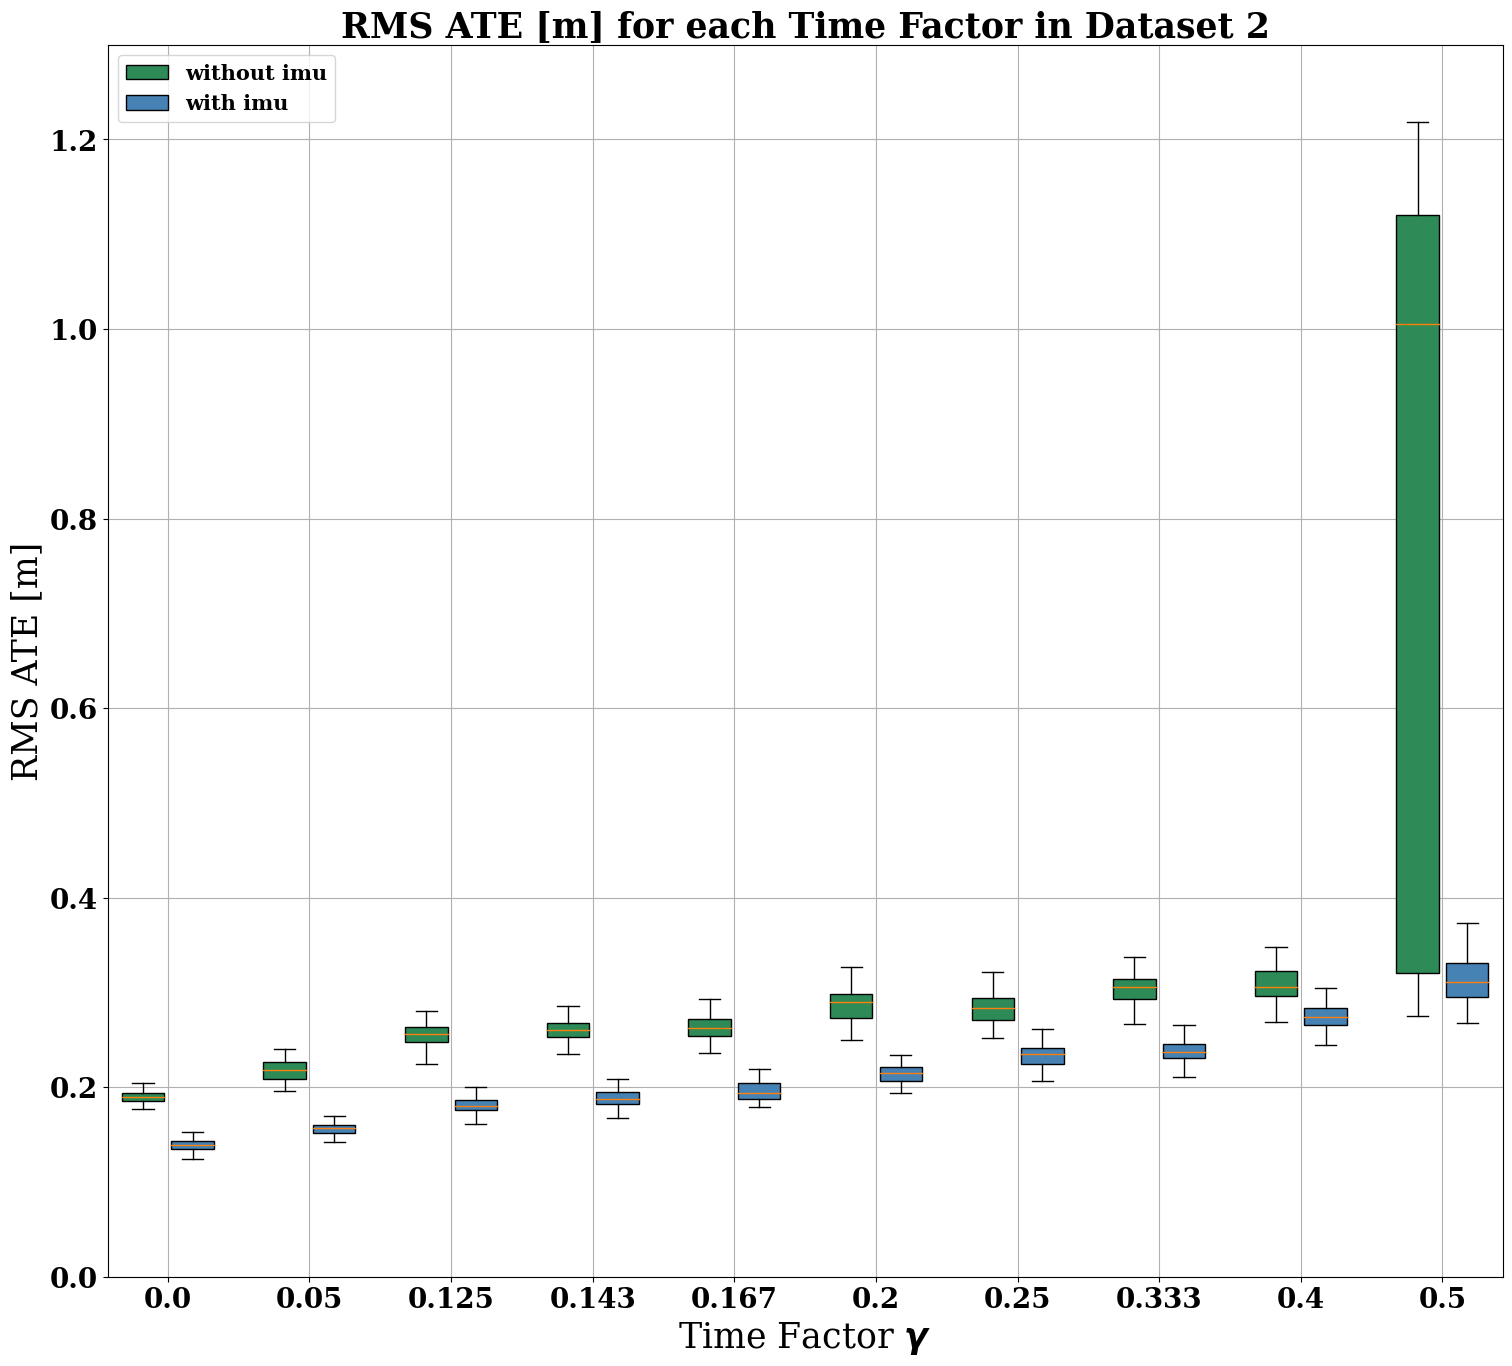

In [9]:
res_t_dmv_2x, std_t_dmv_2x, tot_t_dmv_2x = compute_results(imu=['withoutimu','withimu'], system='dm_vio', sub='/result_runs_pc_nexp', datasets=DATASETS_2, outliers=True) 
d_wi, d_woi = [], []
for data in DATASETS_2: 
    d_wi.append(tot_t_dmv_2x[data+'withimu']) 
    d_woi.append(tot_t_dmv_2x[data+'withoutimu']) 

fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.0, 1.3)
plt.grid()
plt.title('RMS ATE [m] for each Time Factor in Dataset 2', fontsize='25', fontweight='bold') 
plt.savefig('box_dmvio2_wpc.png', bbox_inches='tight') 
plt.show()

### Gaussian Blur

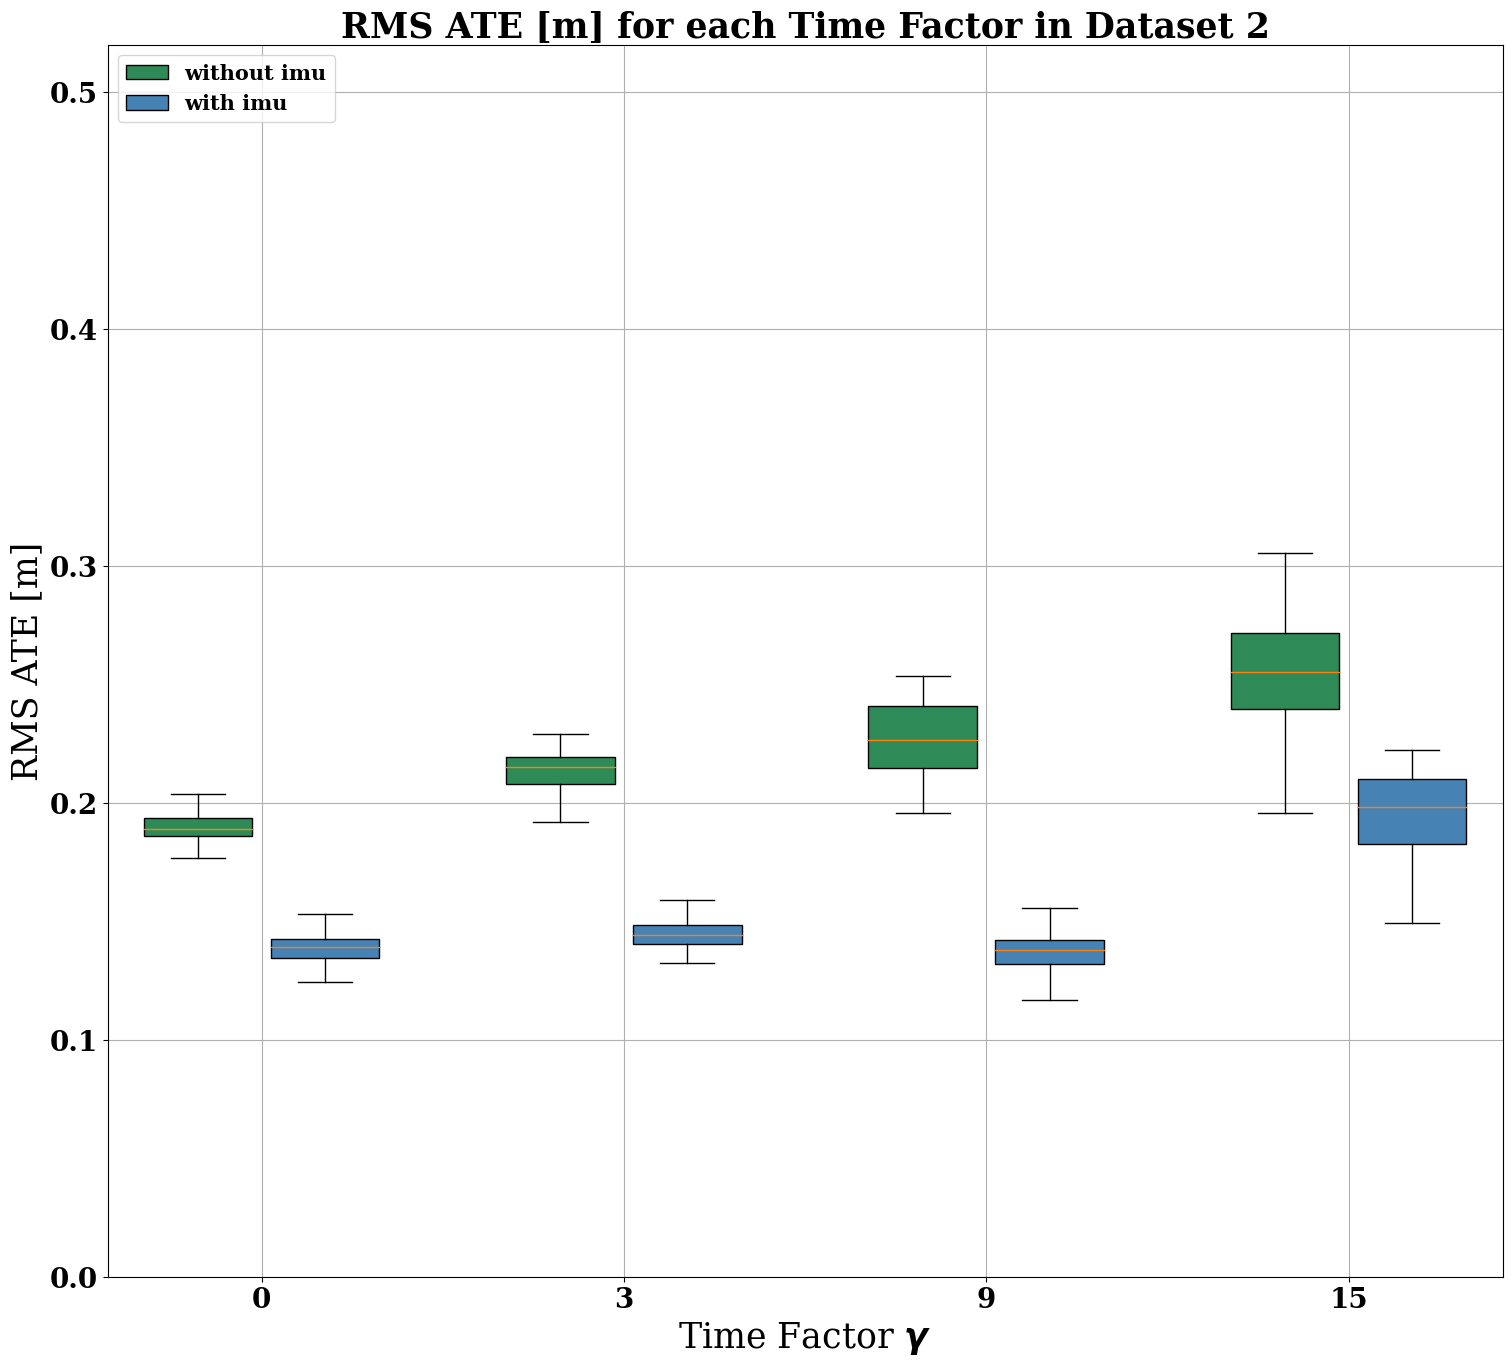

In [13]:
DATASET_GBLUR_2 = ['dataset-room2_512_16_gblur_3', 'dataset-room2_512_16_gblur_9', 'dataset-room2_512_16_gblur_15']
res_t_dmv_1x, std_t_dmv_1x, tot_t_dmv_1x = compute_results(imu=['withoutimu', 'withimu'], system='dm_vio', sub='/result_runs_pc_nexp', datasets=DATASETS_2, outliers=True)
res_t_dmv_1x_g, std_t_dmv_1x_g, tot_t_dmv_1x_g = compute_results(imu=['withoutimu', 'withimu'], system='dm_vio', sub='/result_runs_gblur_corr', datasets=DATASET_GBLUR_2, outliers=True)
d_wi, d_woi = [], []
d_wi.append(tot_t_dmv_1x['dataset-room2_512_16withimu']) 
d_woi.append(tot_t_dmv_1x['dataset-room2_512_16withoutimu']) 
for data in DATASET_GBLUR_2: 
    d_wi.append(tot_t_dmv_1x_g[data+'withimu']) 
    d_woi.append(tot_t_dmv_1x_g[data+'withoutimu']) 

fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in [0,3,9,15]]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.0, 0.52)
plt.grid()
plt.title('RMS ATE [m] for each Time Factor in Dataset 2', fontsize='25', fontweight='bold') 
plt.savefig('box_dmvio2_gblur.png', bbox_inches='tight') 
plt.show()

## Dataset 3 

In [14]:
median_dmv3, std_dmv3, tot_dmv3 = compute_results(imu=['withoutimu','withimu'], system=system, datasets=['dataset-room3_512_16'], sub="/result_runs_unmod", outliers=False)
#res_t_dmv_2p, std_t_dmv_2p, tot_t_dmv_2p = compute_results(imu=['withimu'], system=system, datasets=['dataset-room2_512_16'], sub="/50iterationsoldgt")
# Compare to article: 
print('------ Original Dataset 3 ---------')
print(f"Monocular: {np.round(np.median(tot_dmv3['dataset-room3_512_16withoutimu']),3)} ({np.round(np.std(tot_dmv3['dataset-room3_512_16withoutimu']),3)}) (----)")
print(f"Monocular-Inertial: {np.round(np.median(tot_dmv3['dataset-room3_512_16withimu']),3)} ({np.round(np.std(tot_dmv3['dataset-room3_512_16withimu']),3)}) (0.09)")
print('-----------------------------------')

0 outliers removed from dataset-room3_512_16withoutimu
0 outliers removed from dataset-room3_512_16withimu
------ Original Dataset 3 ---------
Monocular: 0.125 (0.005) (----)
Monocular-Inertial: 0.093 (0.004) (0.09)
-----------------------------------


### Result runs 

In [29]:
res_t_dmv_3, std_t_dmv_3, tot_t_dmv_3 = compute_results(imu=imu, system='dm_vio', datasets=DATASETS_3, sub="/result_runsX", outliers=False)
#res_t_dmv_2p, std_t_dmv_2p, tot_t_dmv_2p = compute_results(imu=['withimu'], system=system, datasets=['dataset-room2_512_16'], sub="/50iterationsoldgt")
# Compare to article: 
print('------ Original Dataset 1 ---------')
print(f"Monocular: {np.round(np.median(tot_t_dmv_3['dataset-room3_512_16withoutimu']),3)} ({np.round(np.std(tot_t_dmv_3['dataset-room3_512_16withoutimu']),3)}) (----)")
print(f"Monocular-Inertial: {np.round(np.median(tot_t_dmv_3['dataset-room3_512_16withimu']),3)} ({np.round(np.std(tot_t_dmv_3['dataset-room3_512_16withimu']),3)}) (0.09)")
print('-----------------------------------')
for i in ['withimu', 'withoutimu']: 
    print(f'--------------{i}--------------') 
    for data in DATASETS_3: 
        print(f'{data}: {np.round(np.median(tot_t_dmv_3[data+i]),3)} ({np.round(np.std(tot_t_dmv_3[data+i]),3)})')

1 outliers removed from dataset-room3_512_16withimu
0 outliers removed from dataset-room3_512_16_20withimu
1 outliers removed from dataset-room3_512_16_8withimu
2 outliers removed from dataset-room3_512_16_7withimu
3 outliers removed from dataset-room3_512_16_6withimu
2 outliers removed from dataset-room3_512_16_5withimu
0 outliers removed from dataset-room3_512_16_4withimu
1 outliers removed from dataset-room3_512_16_3withimu
1 outliers removed from dataset-room3_512_16_2-5withimu
2 outliers removed from dataset-room3_512_16_2withimu
2 outliers removed from dataset-room3_512_16withoutimu
10 outliers removed from dataset-room3_512_16_20withoutimu
4 outliers removed from dataset-room3_512_16_8withoutimu
 number of samples: 392 path: /home/cm2113/workspace/results/dataset-room3_512_16_7/dm_vio/data/result_runsX/withoutimu/run_15/saved_results/traj_est/absolute_err_statistics_sim3_-1.yaml
3 outliers removed from dataset-room3_512_16_7withoutimu
3 outliers removed from dataset-room3_512_16

 number of samples: 392 path: /home/cm2113/workspace/results/dataset-room3_512_16_7/dm_vio/data/result_runsX/withoutimu/run_15/saved_results/traj_est/absolute_err_statistics_sim3_-1.yaml
 number of samples: 399 path: /home/cm2113/workspace/results/dataset-room3_512_16_3/dm_vio/data/result_runsX/withoutimu/run_21/saved_results/traj_est/absolute_err_statistics_sim3_-1.yaml
 number of samples: 406 path: /home/cm2113/workspace/results/dataset-room3_512_16_2/dm_vio/data/result_runsX/withoutimu/run_5/saved_results/traj_est/absolute_err_statistics_sim3_-1.yaml


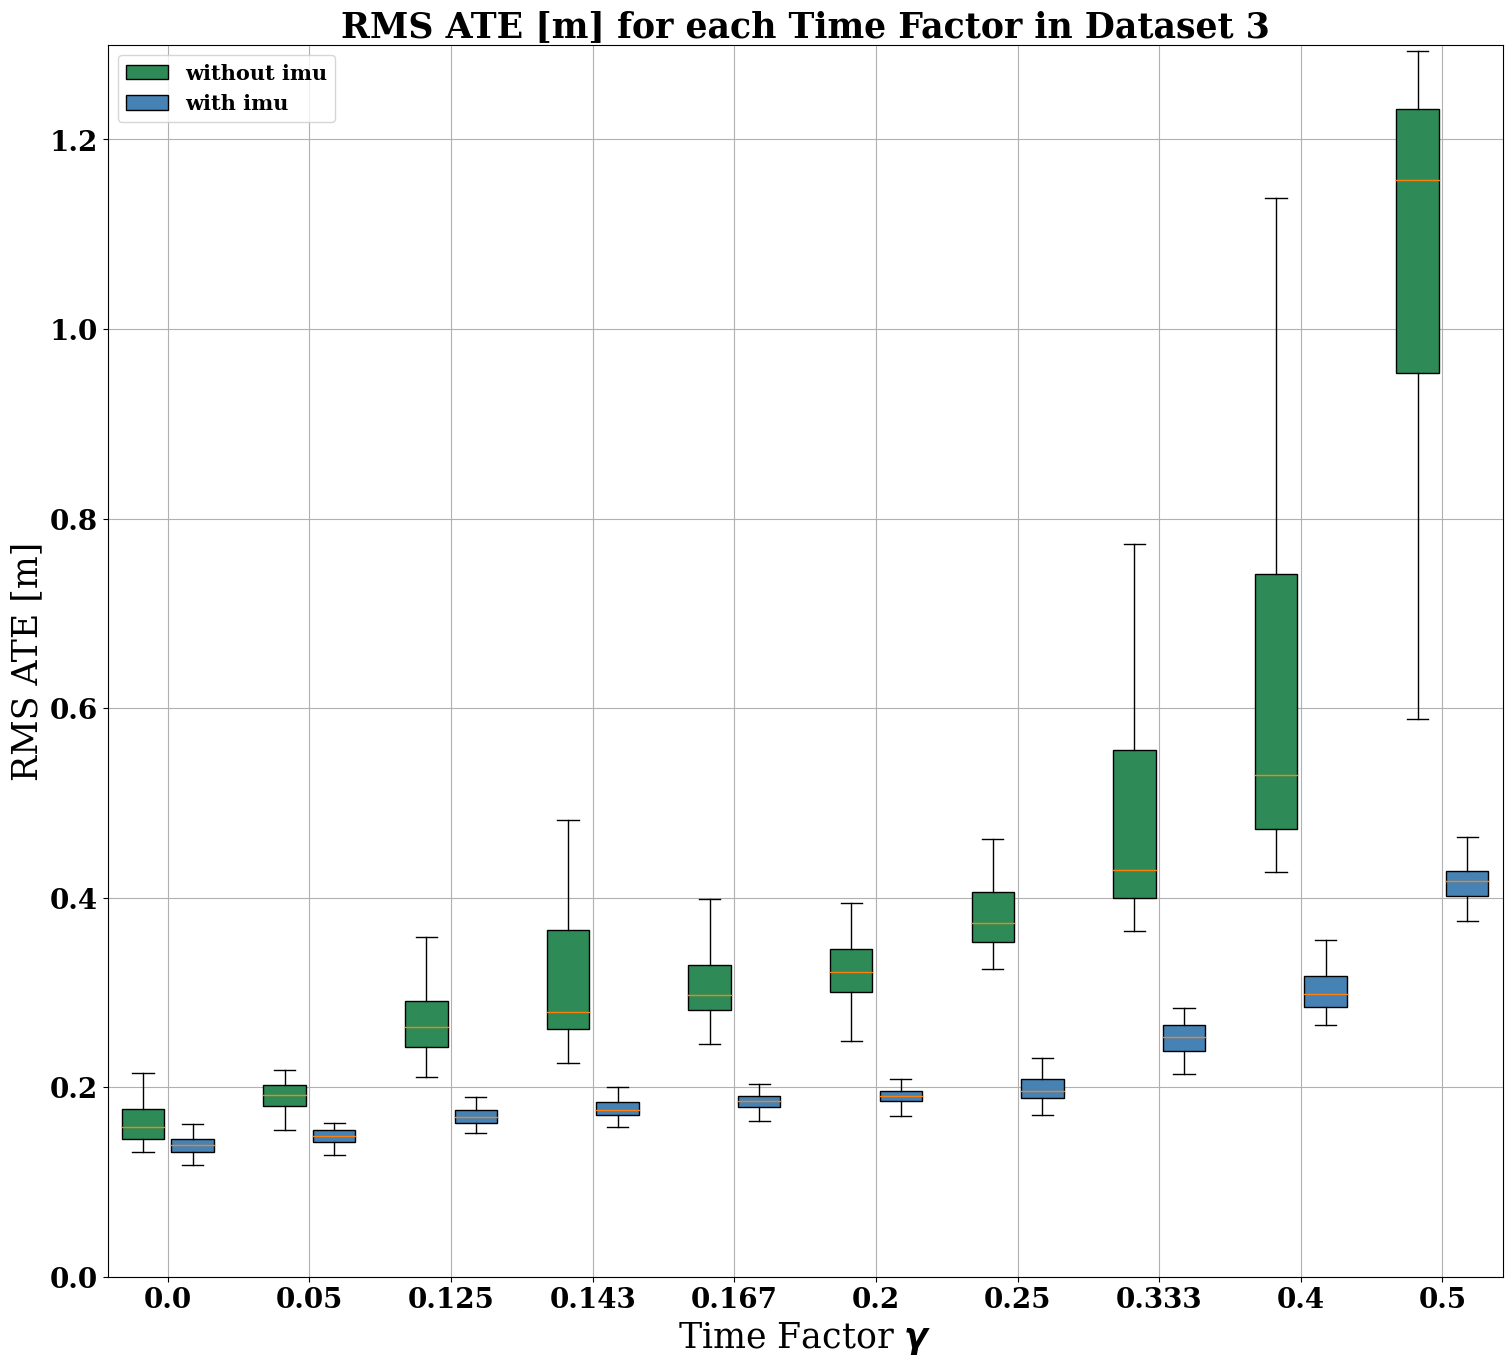

In [10]:
res_t_dmv_3, std_t_dmv_3, tot_t_dmv_3 = compute_results(imu=imu, system='dm_vio', datasets=DATASETS_3, sub="/result_runsX", outliers=True)
d_wi, d_woi = [], []
for data in DATASETS_3: 
    d_wi.append(tot_t_dmv_3[data+'withimu']) 
    d_woi.append(tot_t_dmv_3[data+'withoutimu']) 

fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.ylim(0.0, 1.3)
plt.title('RMS ATE [m] for each Time Factor in Dataset 3', fontsize='25', fontweight='bold') 
plt.savefig('box_dmvio3X.png', bbox_inches='tight') 
plt.show()

#### With Photometric Callibration 

In [67]:
res_t_dmv_3x, std_t_dmv_3x, tot_t_dmv_3x = compute_results(imu=['withoutimu','withimu'], system='dm_vio', sub='/result_runs_pc_nexp', datasets=DATASETS_3, outliers=False) 
print('------ Original Dataset 3 - photometric calibration no exposure times ---------')
print(f"Monocular: {np.round(np.median(tot_t_dmv_3x['dataset-room3_512_16withoutimu']),3)} ({np.round(np.std(tot_t_dmv_3x['dataset-room3_512_16withoutimu']),3)})  (----)")
print(f"Monocular-Inertial: {np.round(np.median(tot_t_dmv_3x['dataset-room3_512_16withimu']),3)} ({np.round(np.std(tot_t_dmv_3x['dataset-room3_512_16withimu']),3)}) (0.09)")
print('-------------------------------------------------------------------------------')

1 outliers removed from dataset-room3_512_16withoutimu
5 outliers removed from dataset-room3_512_16_20withoutimu
4 outliers removed from dataset-room3_512_16_8withoutimu
3 outliers removed from dataset-room3_512_16_7withoutimu
2 outliers removed from dataset-room3_512_16_6withoutimu
4 outliers removed from dataset-room3_512_16_5withoutimu
0 outliers removed from dataset-room3_512_16_4withoutimu
2 outliers removed from dataset-room3_512_16_3withoutimu
7 outliers removed from dataset-room3_512_16_2-5withoutimu
0 outliers removed from dataset-room3_512_16_2withoutimu
1 outliers removed from dataset-room3_512_16withimu
1 outliers removed from dataset-room3_512_16_20withimu
0 outliers removed from dataset-room3_512_16_8withimu
1 outliers removed from dataset-room3_512_16_7withimu
1 outliers removed from dataset-room3_512_16_6withimu
0 outliers removed from dataset-room3_512_16_5withimu
0 outliers removed from dataset-room3_512_16_4withimu
3 outliers removed from dataset-room3_512_16_3withim

In [68]:
for i in ['withimu', 'withoutimu']: 
    print(f'--------------{i}--------------') 
    for data in DATASETS_3: 
        print(f'{data}: {np.round(np.median(tot_t_dmv_3x[data+i]),3)} ({np.round(np.std(tot_t_dmv_3x[data+i]),3)})')

--------------withimu--------------
dataset-room3_512_16: 0.076 (0.004)
dataset-room3_512_16_20: 0.127 (0.005)
dataset-room3_512_16_8: 0.142 (0.023)
dataset-room3_512_16_7: 0.108 (0.006)
dataset-room3_512_16_6: 0.114 (0.008)
dataset-room3_512_16_5: 0.127 (0.009)
dataset-room3_512_16_4: 0.153 (0.012)
dataset-room3_512_16_3: 0.217 (0.016)
dataset-room3_512_16_2-5: 0.267 (0.021)
dataset-room3_512_16_2: 0.348 (0.022)
--------------withoutimu--------------
dataset-room3_512_16: 0.119 (0.038)
dataset-room3_512_16_20: 0.139 (0.019)
dataset-room3_512_16_8: 0.201 (0.032)
dataset-room3_512_16_7: 0.213 (0.037)
dataset-room3_512_16_6: 0.225 (0.04)
dataset-room3_512_16_5: 0.239 (0.017)
dataset-room3_512_16_4: 0.279 (0.027)
dataset-room3_512_16_3: 0.323 (0.026)
dataset-room3_512_16_2-5: 0.373 (0.035)
dataset-room3_512_16_2: 0.875 (0.283)


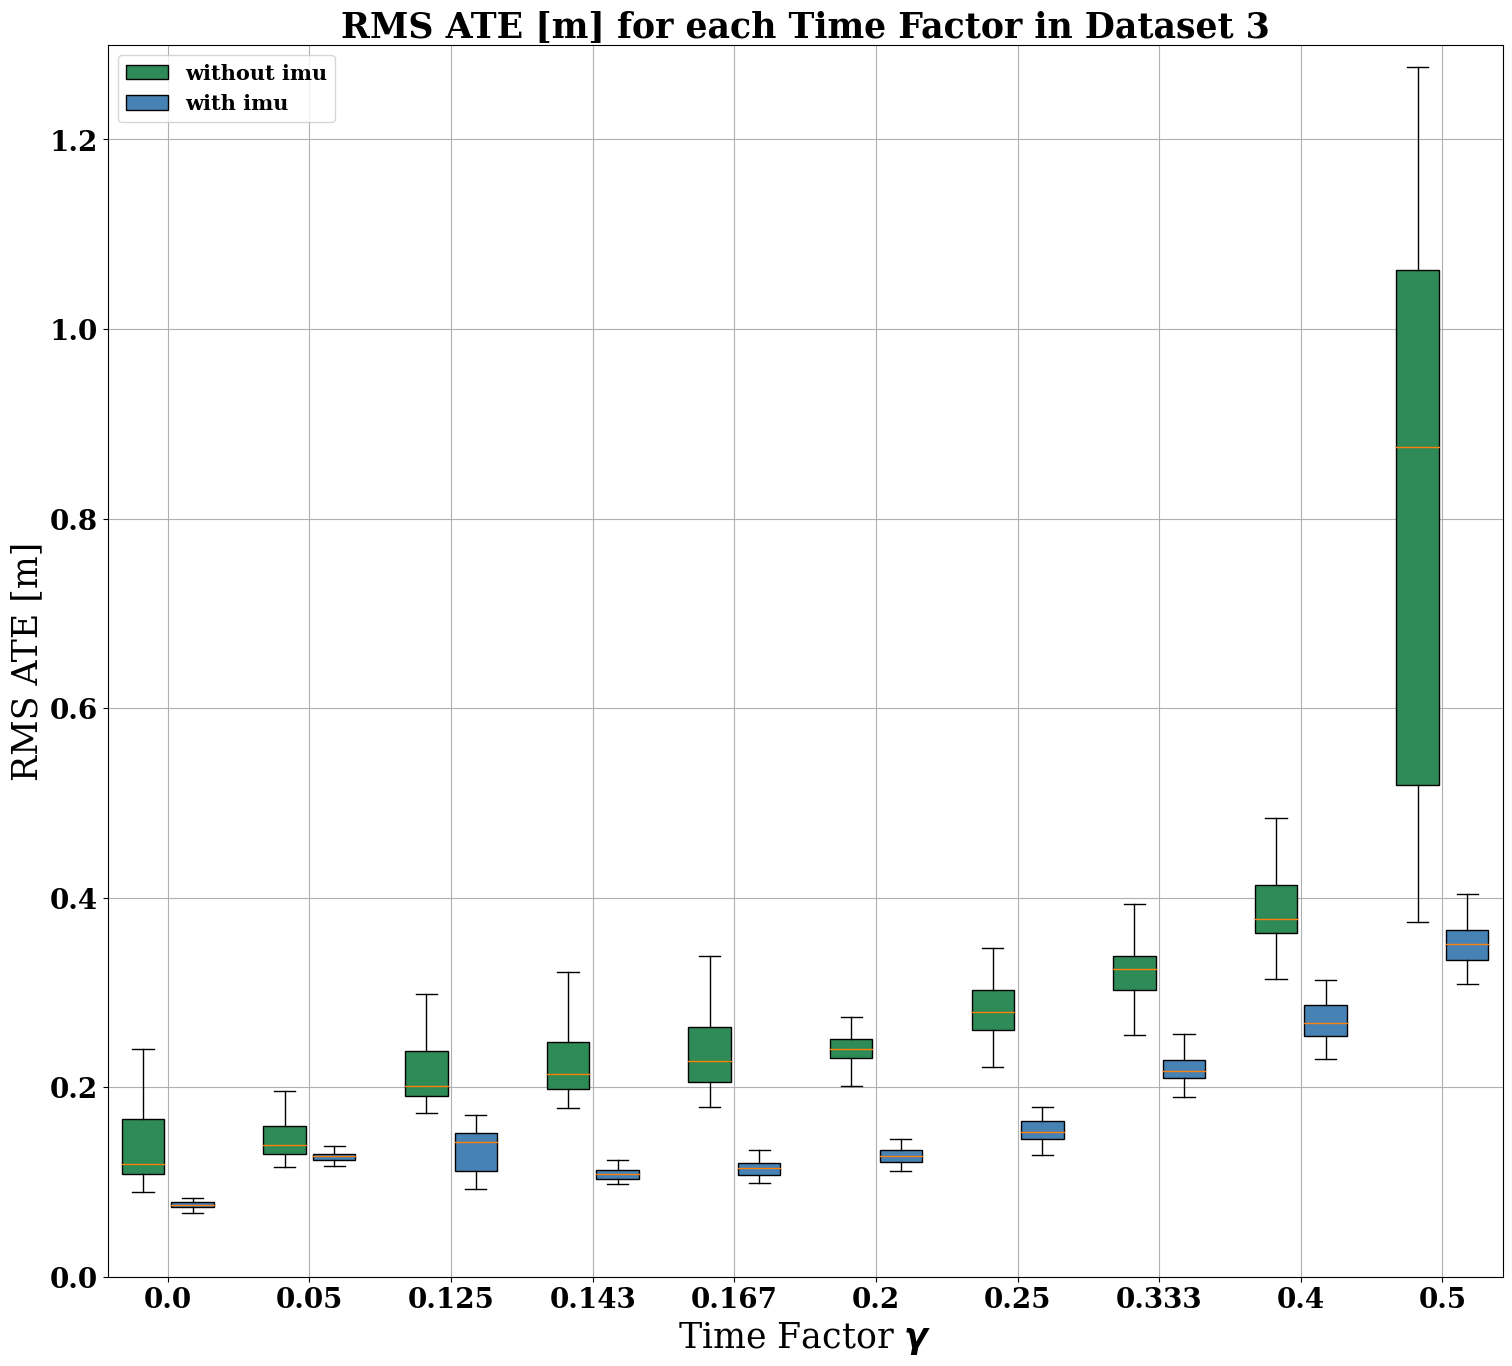

In [11]:
res_t_dmv_3x, std_t_dmv_3x, tot_t_dmv_3x = compute_results(imu=['withoutimu','withimu'], system='dm_vio', sub='/result_runs_pc_nexp', datasets=DATASETS_3, outliers=True) 
d_wi, d_woi = [], []
for data in DATASETS_3: 
    d_wi.append(tot_t_dmv_3x[data+'withimu']) 
    d_woi.append(tot_t_dmv_3x[data+'withoutimu']) 

fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.0, 1.3)
plt.grid()
plt.title('RMS ATE [m] for each Time Factor in Dataset 3', fontsize='25', fontweight='bold') 
plt.savefig('box_dmvio3_wpc.png', bbox_inches='tight') 
plt.show()

### Gaussian blur 

 number of samples: 400 path: /home/cm2113/workspace/results/dataset-room3_512_16_gblur_15/dm_vio/data/result_runs_gblur_corr/withoutimu/run_33/saved_results/traj_est/absolute_err_statistics_sim3_-1.yaml


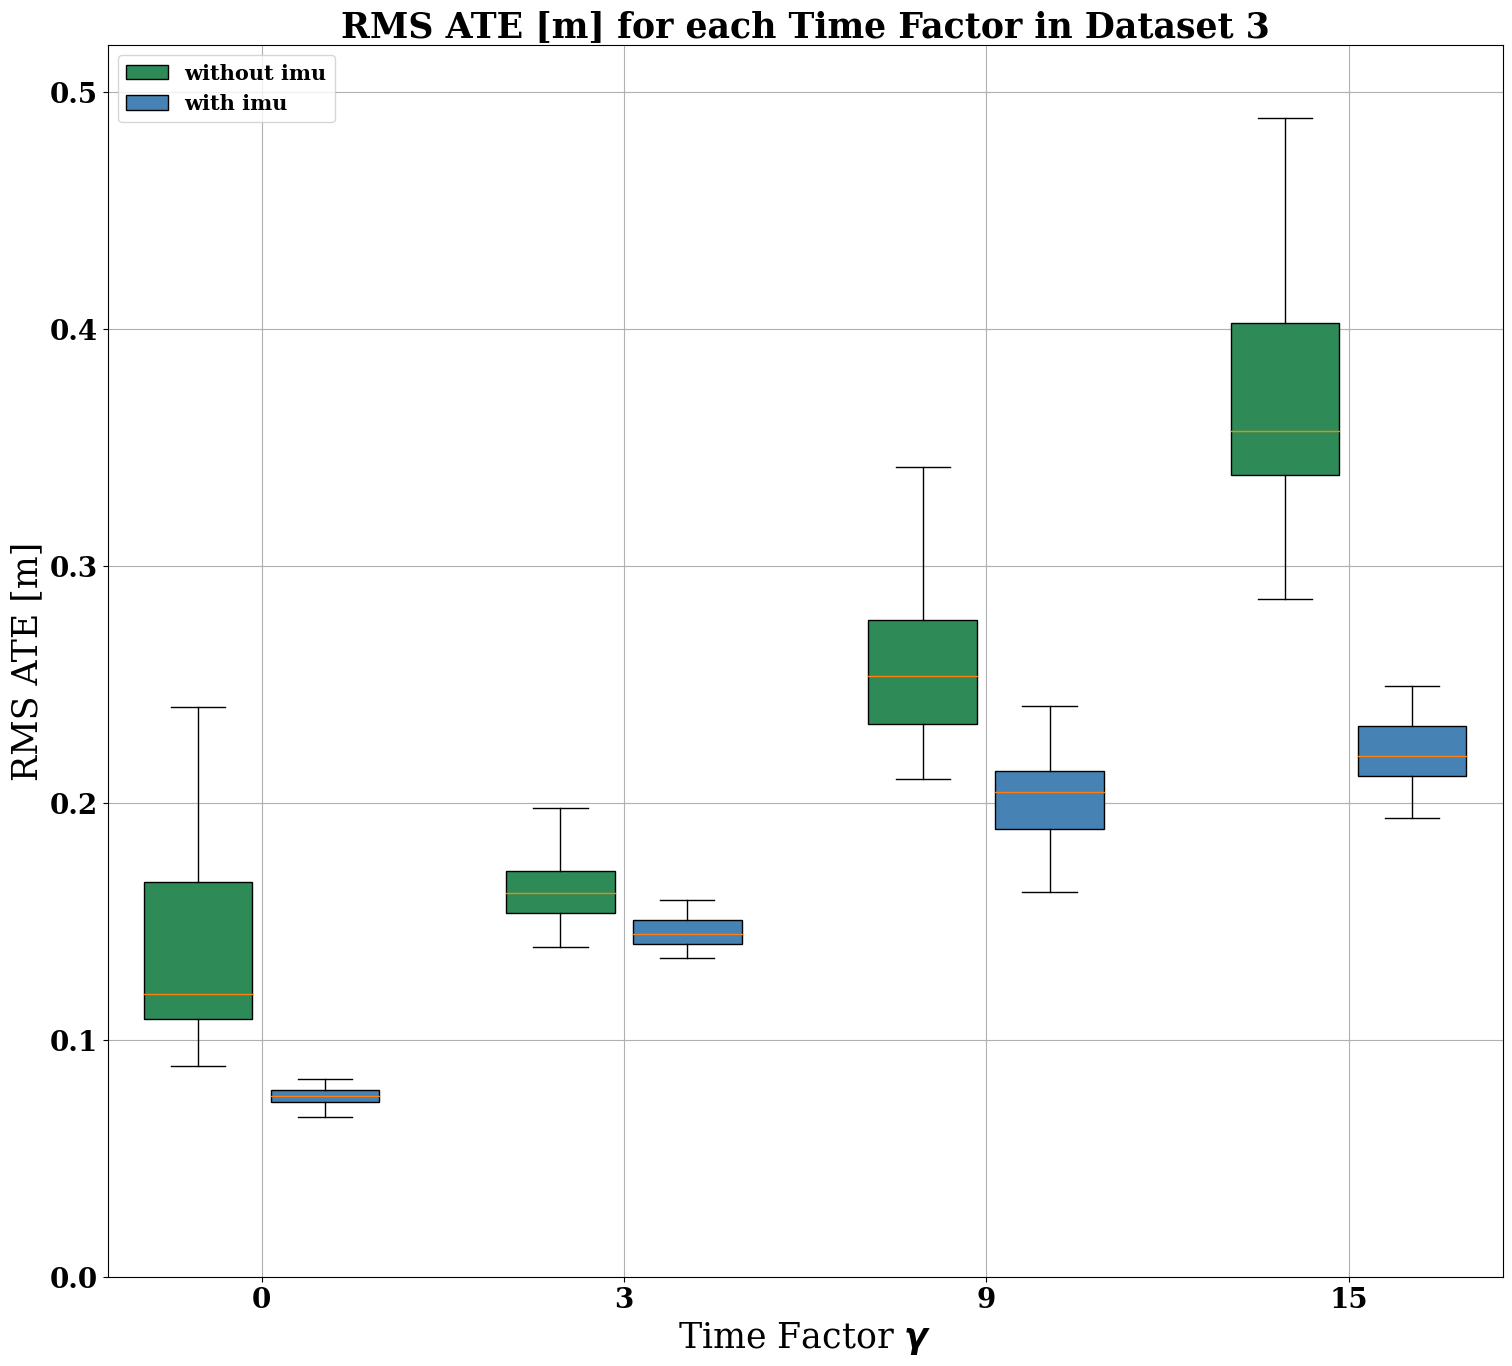

In [14]:
DATASET_GBLUR_2 = ['dataset-room3_512_16_gblur_3', 'dataset-room3_512_16_gblur_9', 'dataset-room3_512_16_gblur_15']
res_t_dmv_1x, std_t_dmv_1x, tot_t_dmv_1x = compute_results(imu=['withoutimu', 'withimu'], system='dm_vio', sub='/result_runs_pc_nexp', datasets=DATASETS_3, outliers=True)
res_t_dmv_1x_g, std_t_dmv_1x_g, tot_t_dmv_1x_g = compute_results(imu=['withoutimu', 'withimu'], system='dm_vio', sub='/result_runs_gblur_corr', datasets=DATASET_GBLUR_2, outliers=True)
d_wi, d_woi = [], []
d_wi.append(tot_t_dmv_1x['dataset-room3_512_16withimu']) 
d_woi.append(tot_t_dmv_1x['dataset-room3_512_16withoutimu']) 
for data in DATASET_GBLUR_2: 
    d_wi.append(tot_t_dmv_1x_g[data+'withimu']) 
    d_woi.append(tot_t_dmv_1x_g[data+'withoutimu']) 

fig, ax = plt.subplots()
woi_plot = ax.boxplot(d_woi, positions=np.array(np.arange(len(d_woi)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withoutimu']), showfliers=False)
wi_plot = ax.boxplot(d_wi,positions=np.array(np.arange(len(d_wi)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = colors['withimu']), showfliers=False)
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['without imu', 'with imu'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in [0,3,9,15]]

# Set x-axis tick labels
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.ylim(0.0, 0.52)
plt.title('RMS ATE [m] for each Time Factor in Dataset 3', fontsize='25', fontweight='bold') 
plt.savefig('box_dmvio3_gblur.png', bbox_inches='tight') 
plt.show()

# Compare Results 

In [18]:
print('---------------DM VIO--------------------')
dmv_median_1, dmv_std_1, dmv_all_1 = compute_results(imu=['withimu','withoutimu'], system='dm_vio', sub='/result_runs_pc_nexp', datasets=DATASETS_1, outliers=True) 
dmv_median_2, dmv_std_2, dmv_all_2 = compute_results(imu=['withimu','withoutimu'], system='dm_vio', sub='/result_runs_pc_nexp', datasets=DATASETS_2, outliers=True) 
dmv_median_3, dmv_std_3, dmv_all_3 = compute_results(imu=['withimu','withoutimu'], system='dm_vio', sub='/result_runs_pc_nexp', datasets=DATASETS_3, outliers=True) 

---------------DM VIO--------------------


In [19]:
print('---------------ORB-SLAM--------------------')
orb_median_1, orb_std_1, orb_all_1 = compute_results(imu=['withimu'], system='orb_slam', sub='/result_runs', datasets=DATASETS_1, outliers=True) 
orb_median_2, orb_std_2, orb_all_2 = compute_results(imu=['withimu'], system='orb_slam', sub='/result_runs', datasets=DATASETS_2, outliers=True) 
orb_median_3, orb_std_3, orb_all_3 = compute_results(imu=['withimu'], system='orb_slam', sub='/result_runs', datasets=DATASETS_3, outliers=True) 

orb_median_1_mono, orb_std_1_mono, orb_all_1_mono = compute_results(imu=['withoutimu'], system='orb_slam', sub='/result_runs_rerun_monocular', datasets=DATASETS_1, outliers=True) 
orb_median_2_mono, orb_std_2_mono, orb_all_2_mono = compute_results(imu=['withoutimu'], system='orb_slam', sub='/result_runs_rerun_monocular', datasets=DATASETS_2, outliers=True) 
orb_median_3_mono, orb_std_3_mono, orb_all_3_mono = compute_results(imu=['withoutimu'], system='orb_slam', sub='/result_runs_rerun_monocular', datasets=DATASETS_3, outliers=True) 

---------------ORB-SLAM--------------------


## with imu 

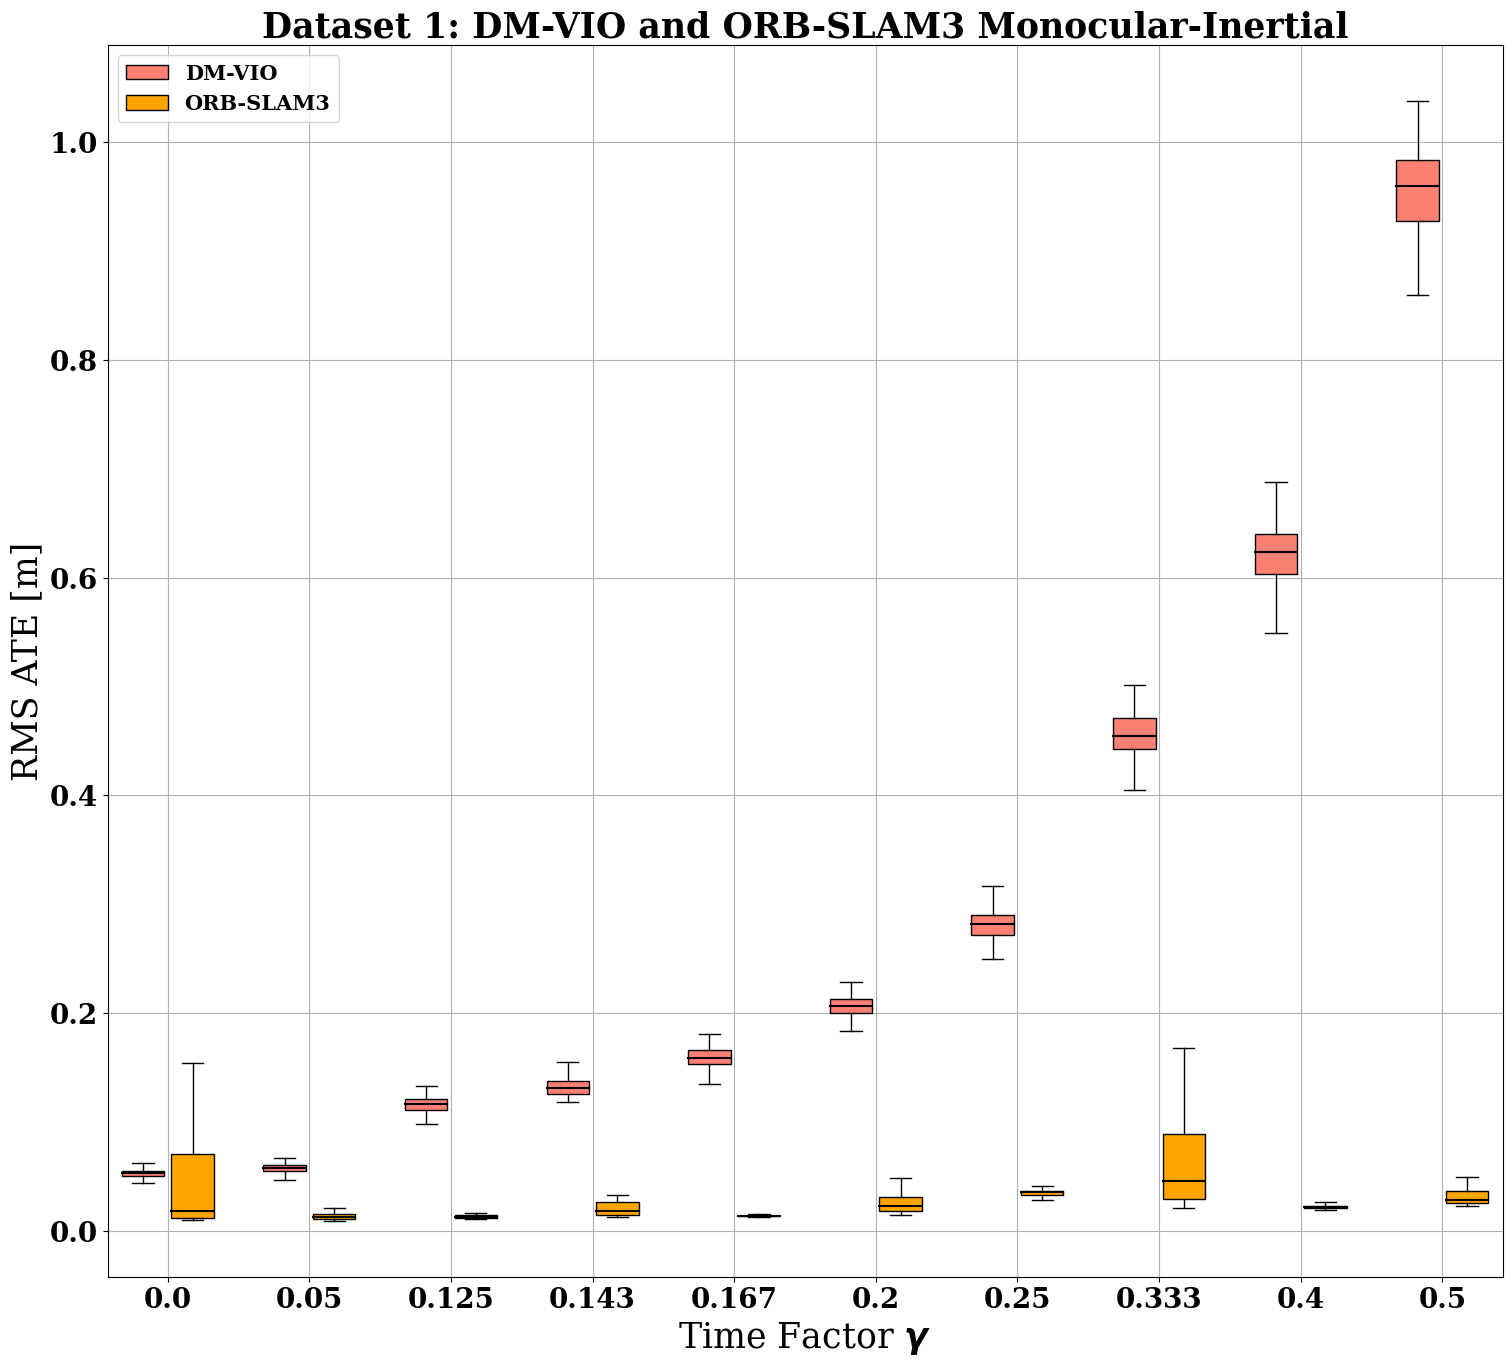

In [52]:
dmvio, orb = [], []
for data in DATASETS_1: 
    dmvio.append(dmv_all_1[data+'withimu']) 
    orb.append(orb_all_1[data+'withimu']) 
    
fig, ax = plt.subplots()
woi_plot = ax.boxplot(dmvio, positions=np.array(np.arange(len(dmvio)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = 'salmon'), showfliers=False, medianprops = dict(color = "black", linewidth = 1.5))
wi_plot = ax.boxplot(orb,positions=np.array(np.arange(len(orb)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = 'orange'), showfliers=False, medianprops = dict(color = "black", linewidth = 1.5))
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['DM-VIO', 'ORB-SLAM3'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('Dataset 1: DM-VIO and ORB-SLAM3 Monocular-Inertial', fontsize='25', fontweight='bold') 
plt.savefig('comp_data1.png', bbox_inches='tight') 
plt.show()

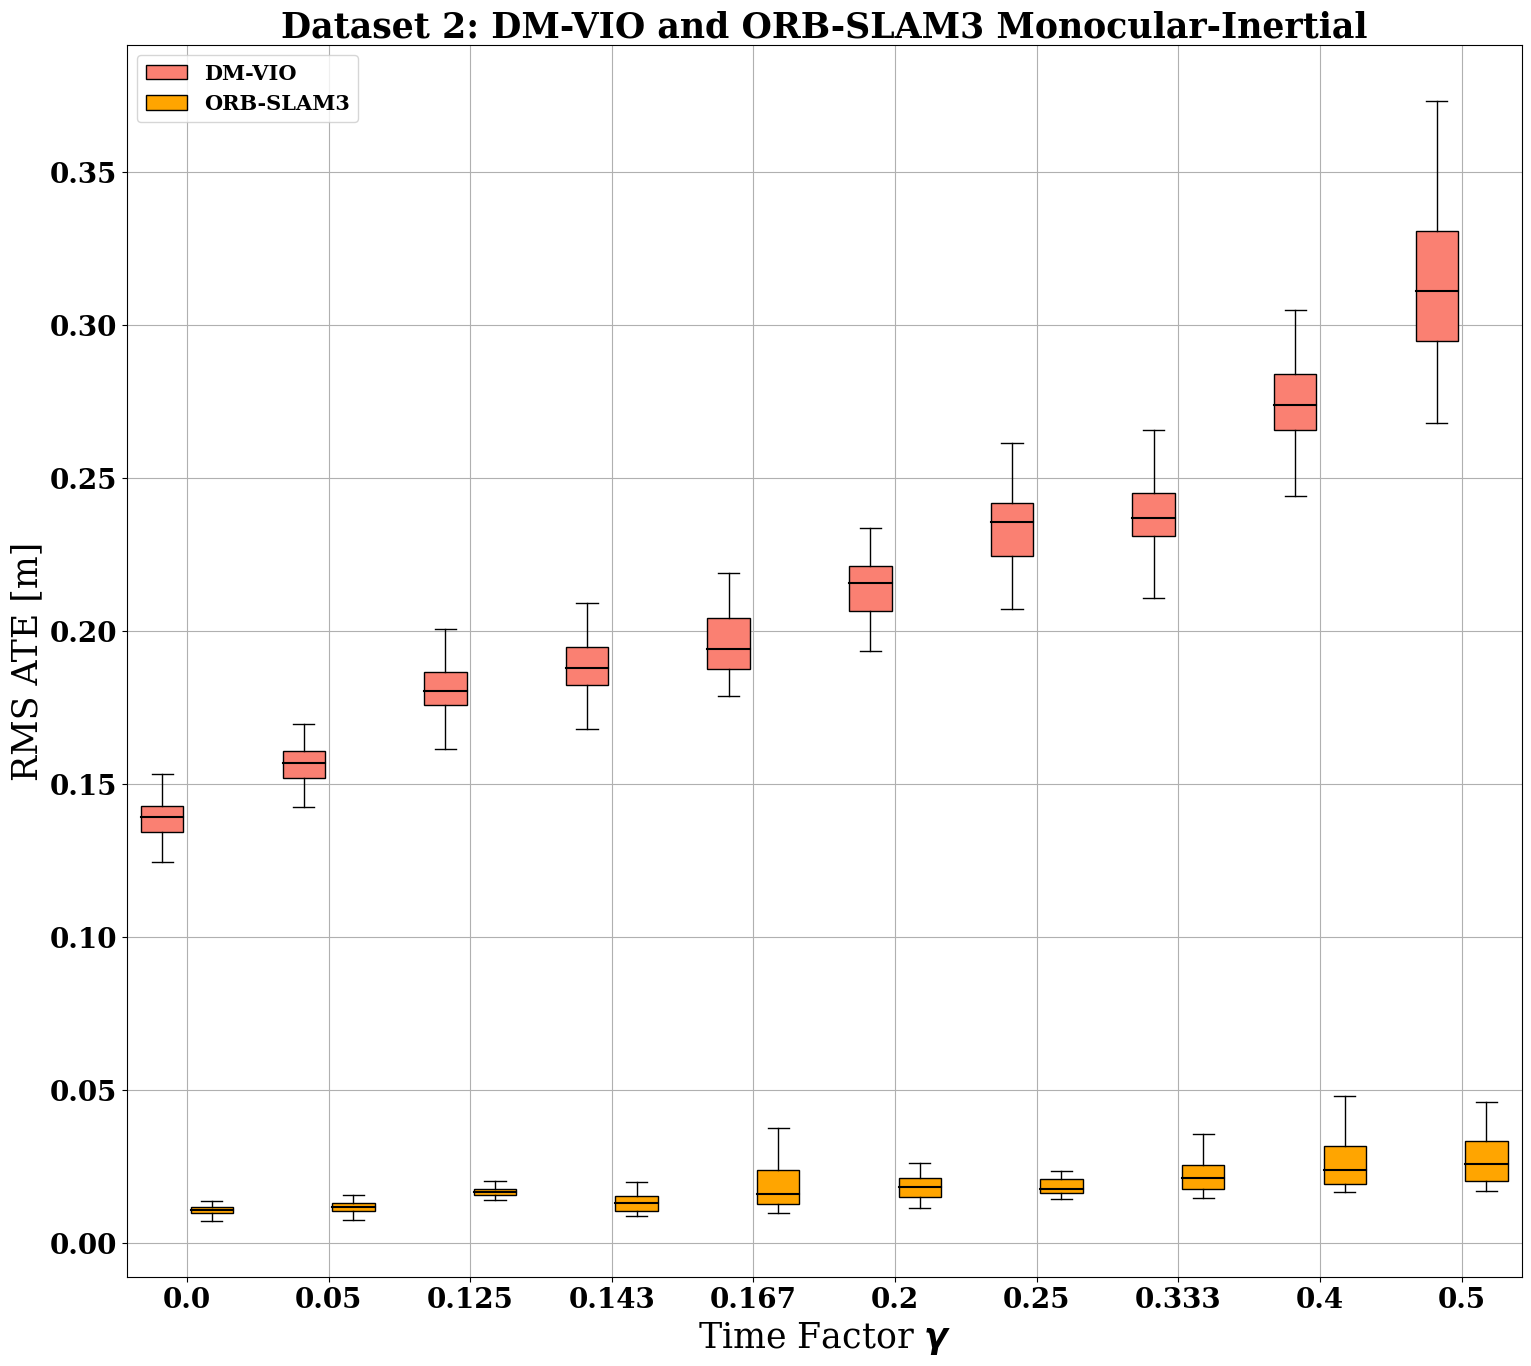

In [20]:
dmvio, orb = [], []
for data in DATASETS_2: 
    dmvio.append(dmv_all_2[data+'withimu']) 
    orb.append(orb_all_2[data+'withimu']) 
    
fig, ax = plt.subplots()
woi_plot = ax.boxplot(dmvio, positions=np.array(np.arange(len(dmvio)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = 'salmon'), showfliers=False, medianprops = dict(color = "black", linewidth = 1.5))
wi_plot = ax.boxplot(orb,positions=np.array(np.arange(len(orb)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = 'orange'), showfliers=False, medianprops = dict(color = "black", linewidth = 1.5))
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['DM-VIO', 'ORB-SLAM3'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('Dataset 2: DM-VIO and ORB-SLAM3 Monocular-Inertial', fontsize='25', fontweight='bold') 
plt.savefig('comp_data2.png', bbox_inches='tight') 
plt.show()

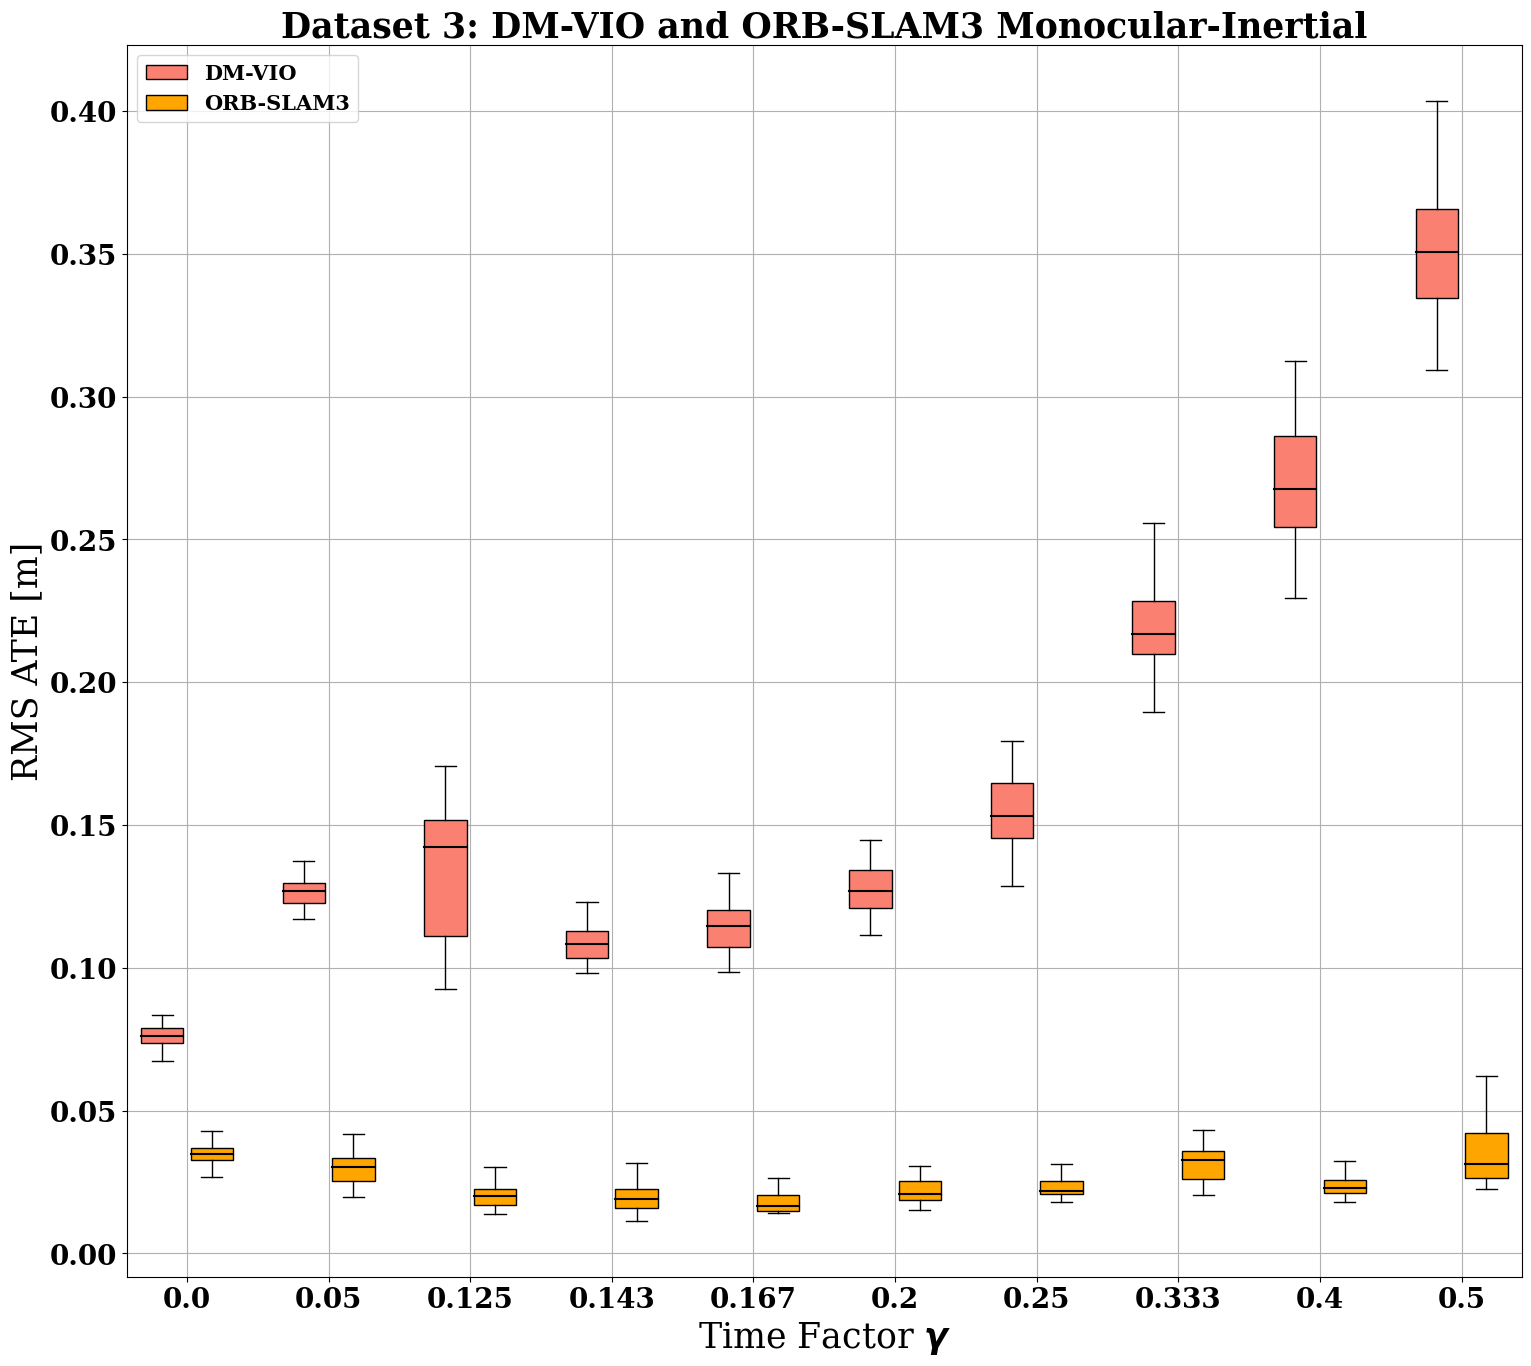

In [54]:
dmvio, orb = [], []
for data in DATASETS_3: 
    dmvio.append(dmv_all_3[data+'withimu']) 
    orb.append(orb_all_3[data+'withimu']) 
    
fig, ax = plt.subplots()
woi_plot = ax.boxplot(dmvio, positions=np.array(np.arange(len(dmvio)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = 'salmon'), showfliers=False, medianprops = dict(color = "black", linewidth = 1.5))
wi_plot = ax.boxplot(orb,positions=np.array(np.arange(len(orb)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = 'orange'), showfliers=False, medianprops = dict(color = "black", linewidth = 1.5))
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['DM-VIO', 'ORB-SLAM3'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('Dataset 3: DM-VIO and ORB-SLAM3 Monocular-Inertial', fontsize='25', fontweight='bold') 
plt.savefig('comp_data3.png', bbox_inches='tight') 
plt.show()

## Without imu

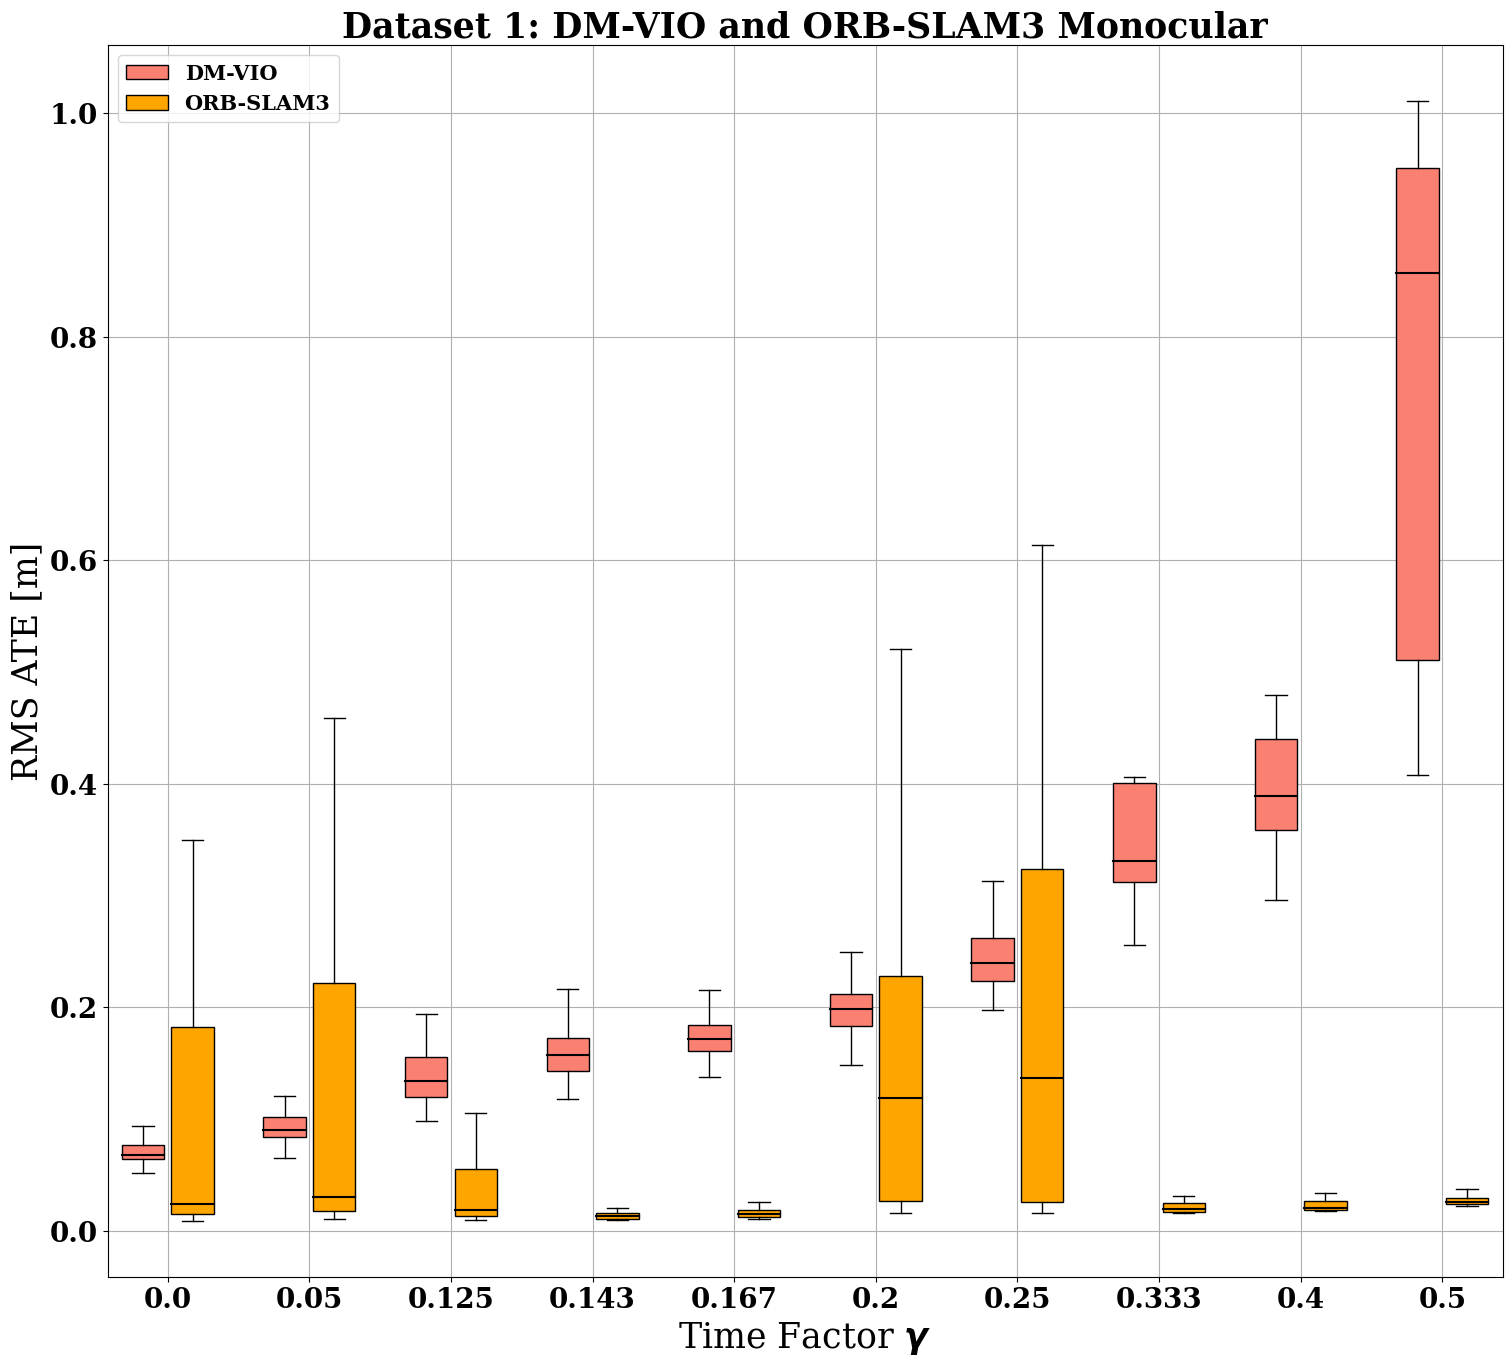

In [59]:
dmvio, orb = [], []
for data in DATASETS_1: 
    dmvio.append(dmv_all_1[data+'withoutimu']) 
    orb.append(orb_all_1_mono[data+'withoutimu']) 
    
fig, ax = plt.subplots()
woi_plot = ax.boxplot(dmvio, positions=np.array(np.arange(len(dmvio)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = 'salmon'), showfliers=False, medianprops = dict(color = "black", linewidth = 1.5))
wi_plot = ax.boxplot(orb,positions=np.array(np.arange(len(orb)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = 'orange'), showfliers=False, medianprops = dict(color = "black", linewidth = 1.5))
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['DM-VIO', 'ORB-SLAM3'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('Dataset 1: DM-VIO and ORB-SLAM3 Monocular', fontsize='25', fontweight='bold') 
plt.savefig('comp_data1_mono.png', bbox_inches='tight') 
plt.show()

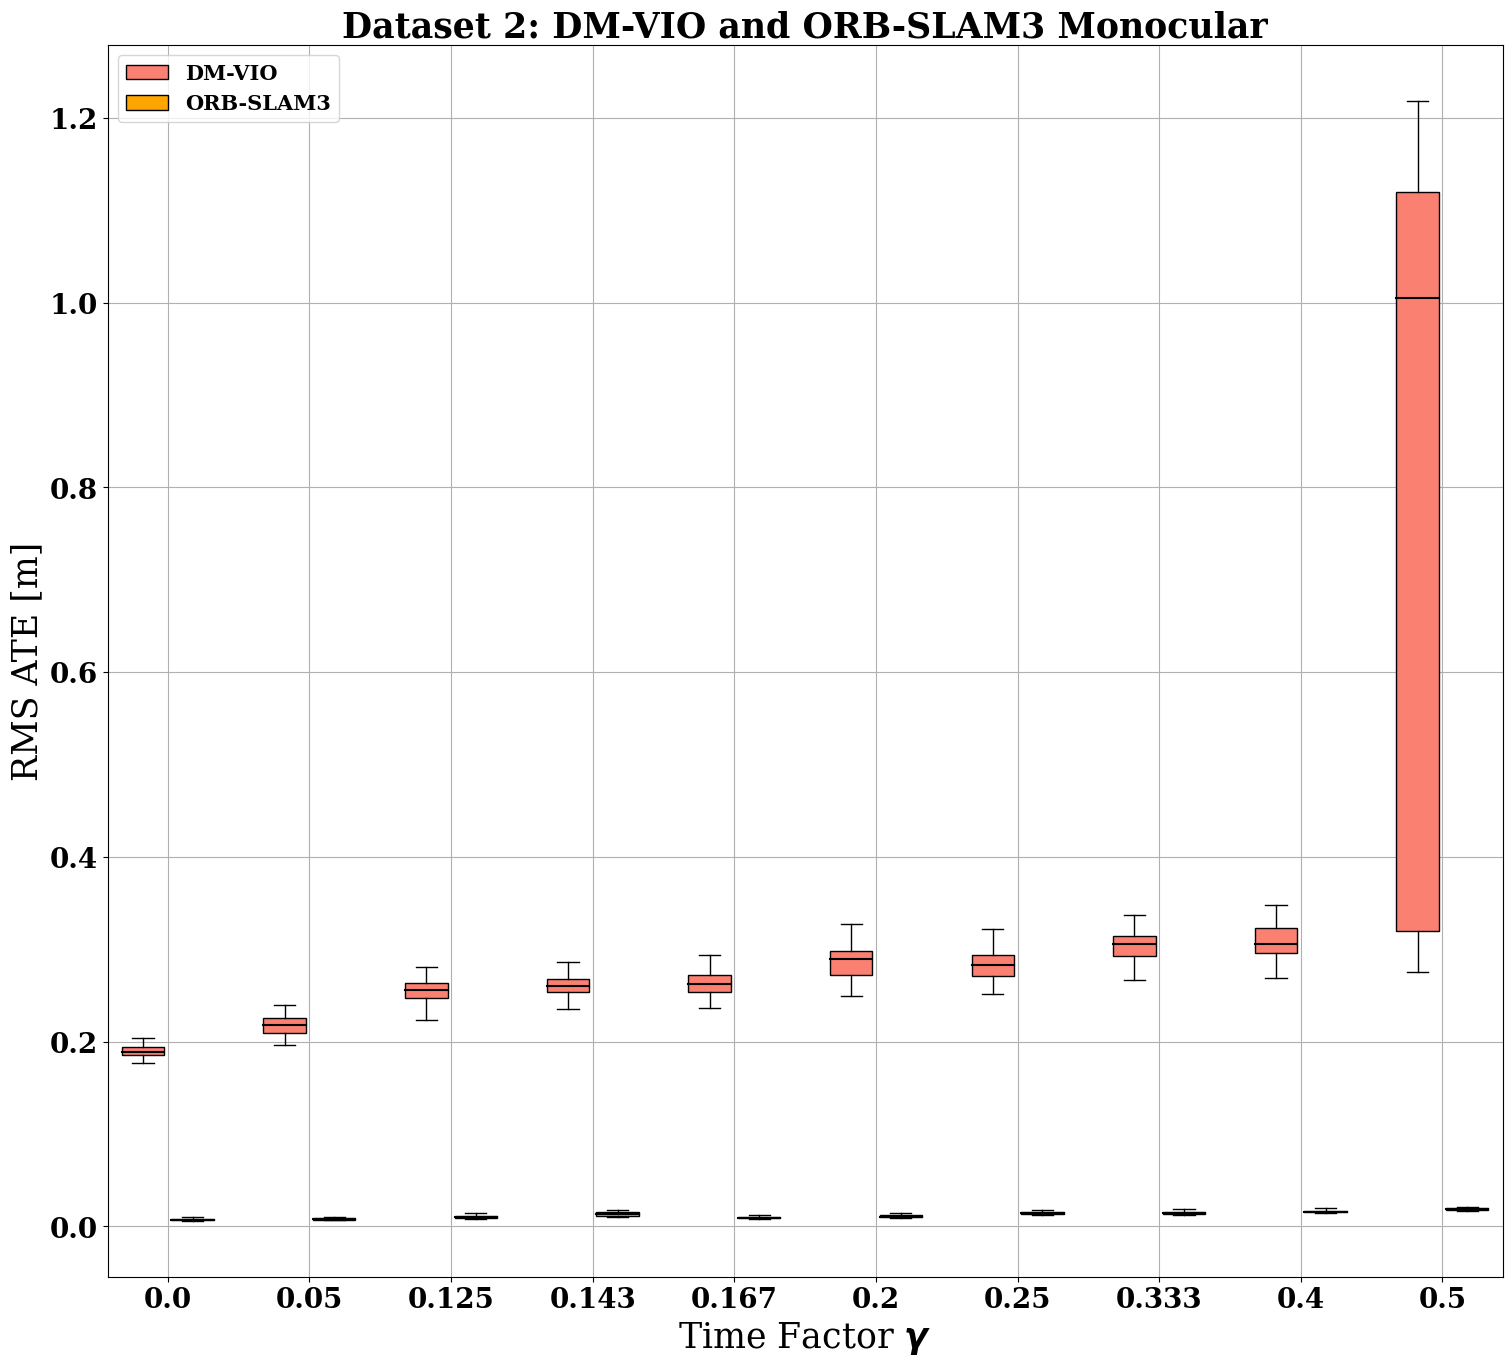

In [34]:
dmvio, orb = [], []
for data in DATASETS_2: 
    dmvio.append(dmv_all_2[data+'withoutimu']) 
    orb.append(orb_all_2_mono[data+'withoutimu']) 
    
fig, ax = plt.subplots()
woi_plot = ax.boxplot(dmvio, positions=np.array(np.arange(len(dmvio)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = 'salmon'), showfliers=False, medianprops = dict(color = "black", linewidth = 1.5))
wi_plot = ax.boxplot(orb,positions=np.array(np.arange(len(orb)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = 'orange'), showfliers=False, medianprops = dict(color = "black", linewidth = 1.5))
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['DM-VIO', 'ORB-SLAM3'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('Dataset 2: DM-VIO and ORB-SLAM3 Monocular', fontsize='25', fontweight='bold') 
plt.savefig('comp_data2_mono.png', bbox_inches='tight') 
plt.show()

In [23]:
dm = np.array(dmv_median_2['withoutimu'])
orb = np.array(orb_median_2_mono['withoutimu'])

np.mean(((dm-orb)/orb)*100)

2564.1598496131805

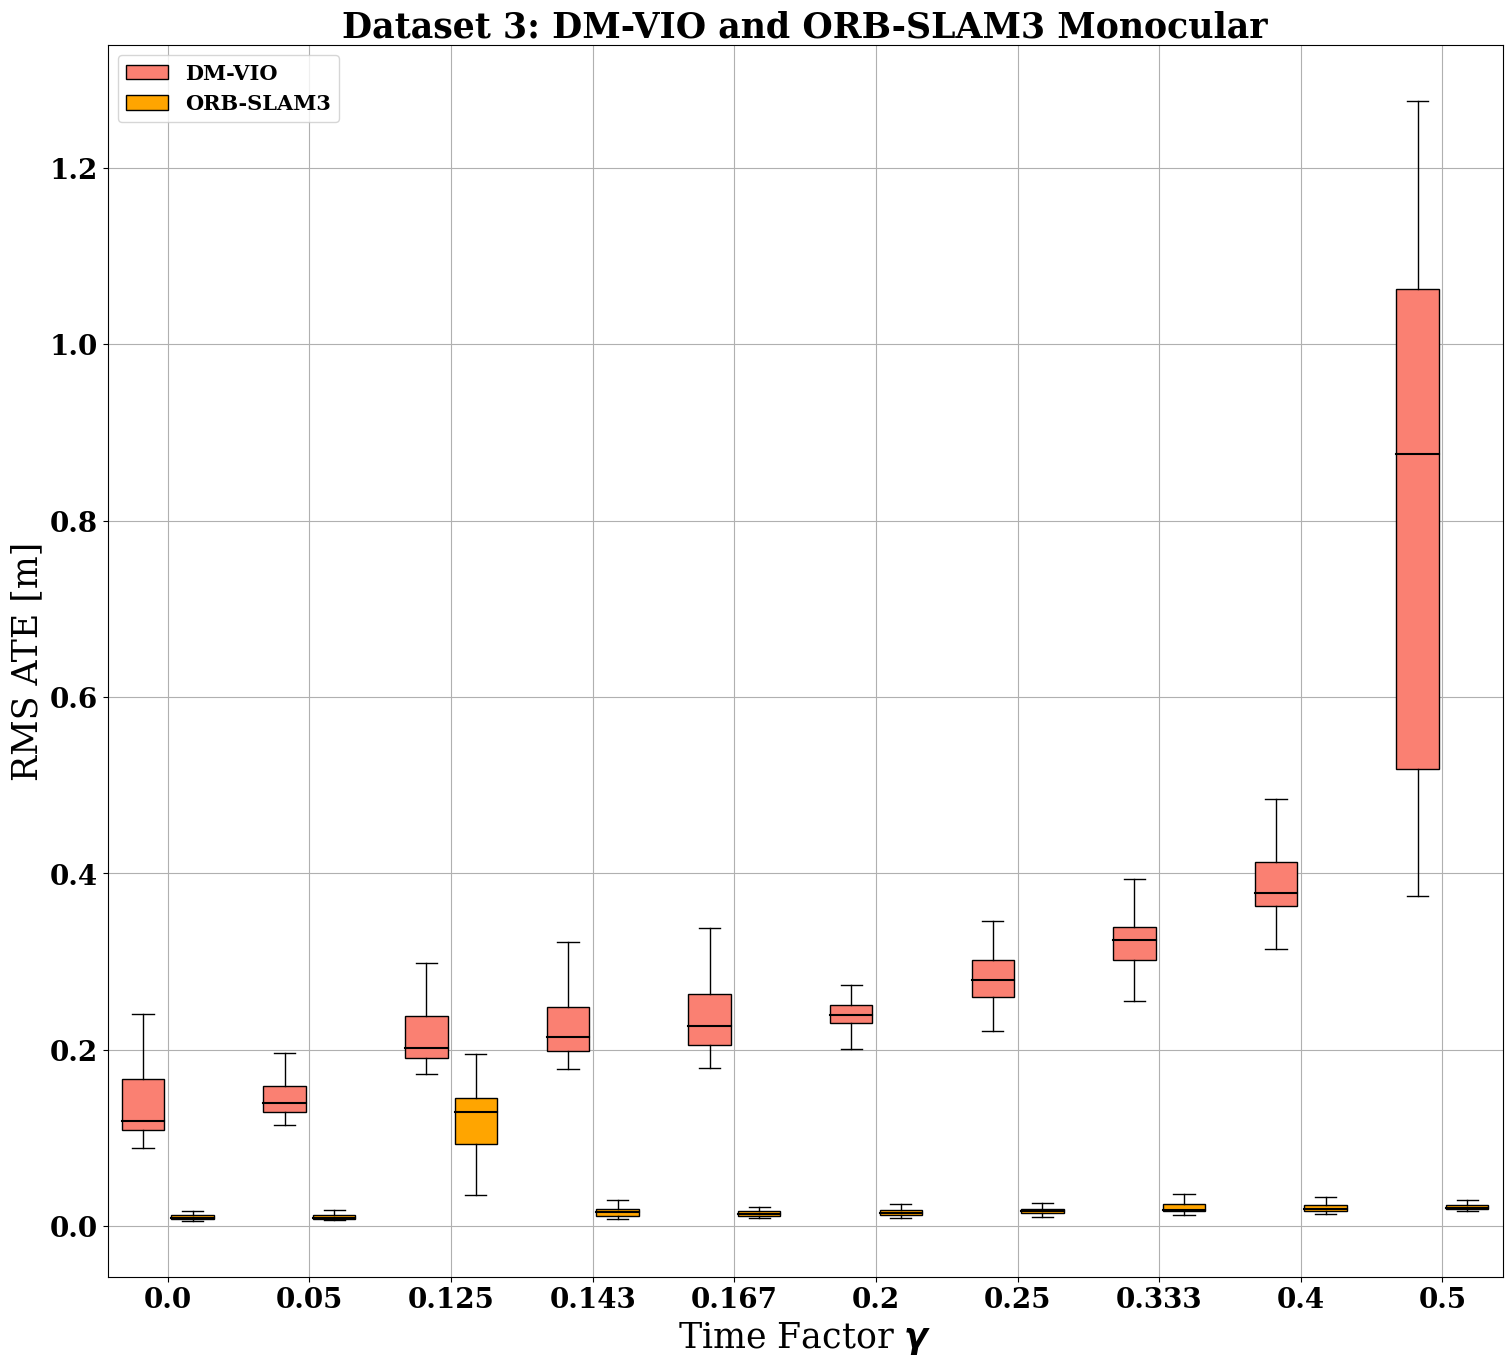

In [21]:
dmvio, orb = [], []
for data in DATASETS_3: 
    dmvio.append(dmv_all_3[data+'withoutimu']) 
    orb.append(orb_all_3_mono[data+'withoutimu']) 
    
fig, ax = plt.subplots()
woi_plot = ax.boxplot(dmvio, positions=np.array(np.arange(len(dmvio)))*2.0-0.35, widths=0.6, patch_artist = True, boxprops = dict(facecolor = 'salmon'), showfliers=False, medianprops = dict(color = "black", linewidth = 1.5))
wi_plot = ax.boxplot(orb,positions=np.array(np.arange(len(orb)))*2.0+0.35,widths=0.6, patch_artist = True, boxprops = dict(facecolor = 'orange'), showfliers=False, medianprops = dict(color = "black", linewidth = 1.5))
ax.legend([woi_plot["boxes"][0], wi_plot["boxes"][0]], ['DM-VIO', 'ORB-SLAM3'], loc='upper left', fontsize='15')
ticks = [str(np.round(j,3)) for j in x]

plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel(r'Time Factor $\gamma$', fontsize='25') 
plt.ylabel('RMS ATE [m]', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('Dataset 3: DM-VIO and ORB-SLAM3 Monocular', fontsize='25', fontweight='bold') 
plt.savefig('comp_data3_mono.png', bbox_inches='tight') 
plt.show()